<a href="https://colab.research.google.com/github/tjtmddnjswkd/capstone/blob/jc/2_preprocessing/p3_preprocessing_memo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
except:
    pass

Mounted at /content/drive


# 0.Data Load


In [1]:
import pandas as pd
import numpy as np
import os

try:
    gdrive_path = r'G:\내 드라이브\KB인턴관련'
    df_laws = pd.read_csv(os.path.join(gdrive_path, "export_crawl_1\\crawl_total.csv"), encoding='euc-kr')
    df_expt = pd.read_csv(os.path.join(gdrive_path, "crawl_except.csv"), encoding='euc-kr')
except:
    gdrive_path = "/content/drive/MyDrive/KB인턴관련"
    df_laws = pd.read_csv(os.path.join(gdrive_path, "export_crawl_1/crawl_total.csv"), encoding='euc-kr')
    df_expt = pd.read_csv(os.path.join(gdrive_path, "crawl_except.csv"), encoding='euc-kr')

## 자주 쓰이는 print 함수 만들기

def eng_kor_print(df, idx=0, end=0):
    print(df.shape[0])
    if end==0:
        values = df.index[idx:]
    else:
        values = df.index[idx:end]
    for i in values:
        print(f"_________________ {i} _________________")
        print(df.loc[i, "ENG"])
        print(df.loc[i, "KOR"])

In [2]:
df = pd.concat([df_laws, df_expt], axis=0).reset_index(drop=True)
df = df.dropna(subset=["KOR"], axis=0).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585946 entries, 0 to 585945
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  585946 non-null  object
 1   lawName   585946 non-null  object
 2   ENG       585946 non-null  object
 3   KOR       585946 non-null  object
dtypes: object(4)
memory usage: 17.9+ MB


In [ ]:
for i in df.loc[df.lawName.str.contains("정부출연연구기관")].sort_values(by="ENG", ascending=False, key=lambda col: col.apply(len)).index[:5]:
    print(i)
    print(df.loc[i, "ENG"])
    print(df.loc[i, "KOR"])
    print("__"*50)

229947
(1) Research institutes listed on the left column of the following chart at the time of the entry into force of this Act shall be research institutes listed on the right column.
The Korea Development Institute under the Korea Development Institute Act The Korea Development Institute

The Korea Institute of Public Finance under the Korea Institute of Public Finance Act The Korea Institute of Public Finance
The Korea Institute for International Economy Policy under the Korea Institute for International Economy Policy Act The Korea Institute for International Economy Policy

The Korea Institute for National Unification under the Korea Institute for National Unification Act The Korea Institute for National Unification
The Korean Institute of Criminology under the Korean Institute of Criminology Act The Korean Institute of Criminology

The Korea Institute of Public Administration under the Korea Institute of Public Administration Act The Korea Institute of Public Administration

The 

# 1.Basic Preprocess


## 1.1.NaN Data


In [ ]:
# 영어 NaN
df.loc[df.ENG.isna()]


,category,lawName,ENG,KOR


In [ ]:
# 한글 NaN
df.loc[df.KOR.isna()]


,category,lawName,ENG,KOR
39667,군사,대체역의 편입 및 복무 등에 관한 법률 시행령,Previous mandatory service period - the number...,NaN
39668,군사,대체역의 편입 및 복무 등에 관한 법률 시행령,Previous mandatory service period - the number...,NaN
79104,통화ㆍ국채ㆍ금융,금융위원회의 설치 등에 관한 법률 시행령,Shares in expenses paid under Article 47 (1) o...,NaN
107052,상업ㆍ무역ㆍ공업,벤처기업육성에 관한 특별조치법 시행령,(Market price as at the date stock option is g...,NaN
112590,상업ㆍ무역ㆍ공업,할부거래에 관한 법률 시행령,Amount to be reserved = (The amount received i...,NaN
170002,환경,가습기살균제 피해구제를 위한 특별법,Contribution = 100 billion won ×｛(usage ratio ...,NaN
187029,환경,환경영향평가법 시행령,[Area prescribed in subparagraph 1 / Minimum a...,NaN
232679,국가공무원,공무원연금법 시행령,[36 - (Number of months during which a pension...,NaN
288588,경찰,의무경찰대 설치 및 운영에 관한 법률 시행령,(Average base monthly income of all public off...,NaN
288589,경찰,의무경찰대 설치 및 운영에 관한 법률 시행령,(Average base monthly income of all public off...,NaN


- `KOR`이 `NaN`인 경우는 영어에 쌍으로 수집되는 데이터가 누락된 경우이기에 삭제 처리 함


In [ ]:
df = df.dropna(subset=["KOR"], axis=0).reset_index(drop=True)

## 1.2.어절을 통한 회귀로 무결성 검증 절차 생각해보기


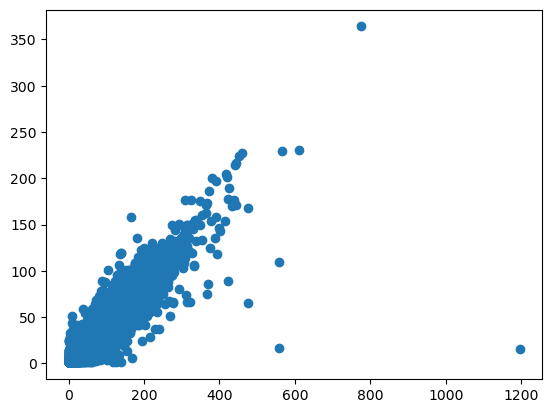

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.ENG.apply(lambda x: len(x.split(" "))),
            df.KOR.apply(lambda x: len(x.split(" "))))

plt.show()


In [ ]:
import statsmodels.api as sm

x = df.ENG.apply(lambda x: len(x.split(" ")))
y = df.KOR.apply(lambda x: len(x.split(" ")))
x = sm.add_constant(x)
model = sm.OLS(y, x)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    KOR   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 5.467e+06
Date:                Fri, 18 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:27:10   Log-Likelihood:            -1.6263e+06
No. Observations:              585946   AIC:                         3.253e+06
Df Residuals:                  585944   BIC:                         3.253e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7042      0.008    213.025      0.000       1.689       1.720
ENG            0.4319      0.000   2338.138      0.000       0.432       0.432
==============================================================================
Omnibus:                   639769.795   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6409536486.102
Skew:                          -4.095   Prob(JB):                         0.00
Kurtosis:                     515.312   Cond. No.                         68.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_hat = x.ENG.apply(lambda x: 1.7042+0.4319*x)
y_hat


0         31.0734
1          9.4784
2         15.0931
3         17.6845
4         13.3655
           ...   
585941     9.0465
585942    49.6451
585943    13.3655
585944     8.1827
585945     2.5680
Name: ENG, Length: 585946, dtype: float64

In [ ]:
res_square = (y_hat-y).apply(lambda x: x**2).sort_values(ascending=False)


In [ ]:
res_square

191761    2.522617e+05
229940    5.113763e+04
221893    2.012332e+04
233872    1.749601e+04
233706    9.018541e+03
              ...     
78783     1.000000e-08
412817    1.000000e-08
310901    1.000000e-08
331040    1.000000e-08
75577     1.000000e-08
Length: 585946, dtype: float64

In [ ]:
for i in res_square.index[:5]:
    print(i)
    print(df.loc[i, "ENG"])
    print(df.loc[i, "KOR"])
    print("_"*60)

191761
(1) Notwithstanding Article 10 (2) and attached Table 1, the eligibility to take national technical qualification examinations in the technical and skill areas shall be governed in accordance with the following table until December 31, 2006:
Grade Eligibility to Take Examination
Professional engineer A person falling under any of the following subparagraphs:
1. A person who has at least four years’ practical experience in an occupational field (including any similar occupational field determined by Ordinance of the Ministry of Labor; hereinafter referred to as “same occupational field”) whereto the category of his/her application for examination belongs after qualifying as engineer;
2. A person who has at least six years’ practical experience in the same occupational field whereto the category of his/her application for examination belongs after qualifying as industrial engineer;
3. A person who has at least eight years’ practical experience in the same occupational field wheret

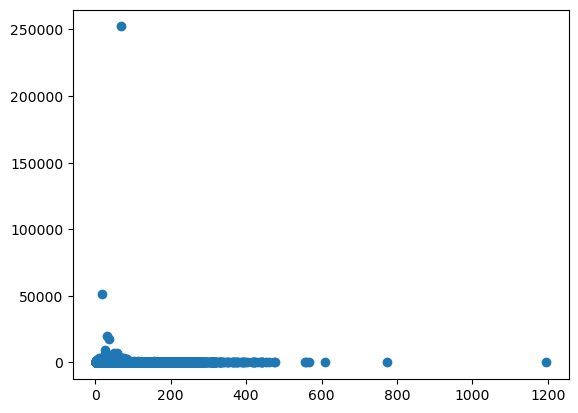

In [ ]:
plt.scatter(x.ENG, res_square)
plt.show()


Q1: -0.020388698126347967	Q3: 1.0934800504185453


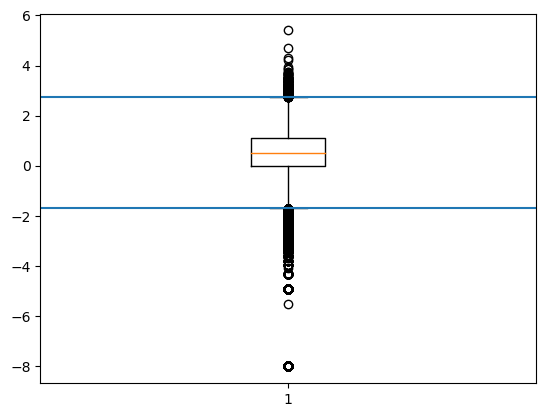

In [ ]:
plt.boxplot(np.log10(res_square))
q1, q3 = np.quantile(np.log10(res_square), 0.25), np.quantile(
    np.log10(res_square), 0.75)
print(f"Q1: {q1}\tQ3: {q3}")
IQR = 1.5*(q3-q1)
plt.axhline(q1-IQR)
plt.axhline(q3+IQR)
plt.show()


In [ ]:
df_up = df.loc[res_square > 50000]


In [ ]:
df_down = df.loc[res_square.apply(lambda x: np.log10(x)) < q1-IQR]


- 띄어쓰기 단위로 완전히 동떨어진 문장들은 찾을 수 있음
- 그러나 이를 활용하여 <span style="color:cyan">**번역 쌍의 무결성**</span>을 검증할 수는 없음


## 1.3.`konlpy`를 통해 검증해 보기


In [ ]:
from konlpy.tag import Okt, Kkma

okt = Okt()
kkma = Kkma()
text = "설치가 완료 되었습니까? 안된다면 다시 시도해 주세요."
print(okt.morphs(text))
print(okt.nouns(text))


['설치', '가', '완료', '되었습니까', '?', '안된다면', '다시', '시도', '해', '주세요', '.']
['설치', '완료', '다시', '시도']


In [ ]:
if "num_of_noun_kor.csv" not in os.listdir(os.path.join(gdrive_path, 'etc_files')):
    num_of_noun_kor = df.KOR.apply(lambda x: len(okt.nouns(x)))
    num_of_noun_kor.to_csv(os.path.join(
        gdrive_path, "etc_files/num_of_noun_kor.csv"))
else:
    num_of_noun_kor = pd.read_csv(os.path.join(
        gdrive_path, "etc_files/num_of_noun_kor.csv"), index_col=0)
    num_of_noun_kor = pd.Series(
        data=num_of_noun_kor.KOR, index=num_of_noun_kor.index)
num_of_noun_kor


0         39
1          7
2         18
3         24
4         19
          ..
585941     8
585942    59
585943    14
585944     5
585945     1
Name: KOR, Length: 585946, dtype: int64

In [ ]:
# 명사 1개 전부 삭제
one_noun_index = (num_of_noun_kor == 1)
df.loc[one_noun_index].sort_values(
    by="KOR", key=lambda col: col.apply(len), ascending=False).head()


,category,lawName,ENG,KOR
354157,재정ㆍ경제일반,독점규제 및 공정거래에 관한 법률 시행령,"2. For the period from June 1, 2005 to June 21...",2. 2005년 6월 1일부터 2012년 6월 21일까지 기간분: 1일 10만분의 29
354156,재정ㆍ경제일반,독점규제 및 공정거래에 관한 법률 시행령,"1. For the period from April 1, 1999 to May 31...",1. 1999년 4월 1일부터 2005년 5월 31일까지 기간분: 1일 1만분의 4
265763,형사법,형사소송법,"[92 Hun-Ga 8, Dec. 24, 1992 (Act No. 5054, Dec...",[92헌가8 1992. 12. 24.(1995. 12. 29. 法5054)]
264744,형사법,형사소송법,"[93 Hun-Ga2, Dec. 23, 1993 (Act No. 2450, Jan....",[93헌가2 1993. 12. 23.(1973. 1. 25. 法2450)]
536032,환경,물환경보전법 시행령,10. Polychlorinated biphenyl;,10. 폴리염화비페닐[polychlorinated biphenyl]


In [ ]:
# 명사 2개 전부 삭제
noun_index = (num_of_noun_kor == 2)
df.loc[noun_index].sort_values(
    by="KOR", key=lambda col: col.apply(len), ascending=False).head()


,category,lawName,ENG,KOR
44824,교육ㆍ학술,교육공무원법,2. For a person whose date of birth arrives be...,2. 1934년 3월 1일부터 1937년 8월 31일까지의 기간중에 있는 자: 19...
280176,지방제도,지방세특례제한법,2. Acquisition tax shall be reduced by 50/100 ...,2. 2021년 1월 1일부터 2021년 12월 31일까지는 취득세의 100분의 5...
555218,노동,산업안전보건법 시행령,7. Yellow phosphorus [12185-10-3] match;,7. 황린(黃燐)[12185-10-3] 성냥(Yellow phosphorus match)
232066,국가공무원,공무원수당 등에 관한 규정,"[Title Amended on Dec. 11, 2013; Dec. 16, 2013...","[제목개정 2013. 12. 11., 2013. 12. 16., 2020. 6. 23.]"
499524,수자원·토지·건설,건설기술 진흥법,"[Title Amended on Dec. 31, 2018; Apr. 30, 2019...","[제목개정 2018. 12. 31., 2019. 4. 30., 2021. 3. 16.]"


In [ ]:
# 명사 4개 전부 삭제
import re

less_noun_index = (num_of_noun_kor < 2)
df_temp = df.loc[less_noun_index].sort_values(by="KOR", key=lambda col: col.apply(
    lambda x: len(re.sub("[^ㄱ-ㅎ|가-힣]", "", x))), ascending=False)
df_temp.head()


,category,lawName,ENG,KOR
354156,재정ㆍ경제일반,독점규제 및 공정거래에 관한 법률 시행령,"1. For the period from April 1, 1999 to May 31...",1. 1999년 4월 1일부터 2005년 5월 31일까지 기간분: 1일 1만분의 4
354157,재정ㆍ경제일반,독점규제 및 공정거래에 관한 법률 시행령,"2. For the period from June 1, 2005 to June 21...",2. 2005년 6월 1일부터 2012년 6월 21일까지 기간분: 1일 10만분의 29
261131,형사법,소년법,(1) The trial shall be conducted in a spirit o...,① 심리는 친절하고 온화하게 하여야 한다.
299181,군사,군사법원법,"(4) To make an oath, one shall rise to his/her...",④ 선서는 일어서서 엄숙하게 하여야 한다.
264912,형사법,형사소송법,(4) The oath shall be taken solemnly in the st...,④ 선서는 일어서서 엄숙하게 하여야 한다.


In [ ]:
re.sub("[^ㄱ-ㅎ|가-힣]", "", "② 보육은 영유아가 안전하고 쾌적한 환경에서 건강하게 성장할 수 있도록 하여야 한다.")


'보육은영유아가안전하고쾌적한환경에서건강하게성장할수있도록하여야한다'

In [ ]:
import string

if "okt_pos_srs.csv" not in os.listdir(os.path.join(gdrive_path, 'etc_files')):
    okt_pos_srs = df.KOR.apply(lambda x: okt.pos(
        x.translate(str.maketrans("", "", string.punctuation))))
    okt_pos_srs.to_csv(os.path.join(
        gdrive_path, "etc_files/okt_pos_srs.csv"), encoding='euc-kr')
else:
    okt_pos_srs = pd.read_csv(os.path.join(
        gdrive_path, "etc_files/okt_pos_srs.csv"), encoding='euc-kr').KOR
okt_pos_srs


0         [('이', 'Noun'), ('법', 'Noun'), ('은', 'Josa'), ...
1         [('이', 'Noun'), ('법', 'Noun'), ('에서', 'Josa'),...
2         [('1', 'Number'), ('“', 'Foreign'), ('개성', 'No...
3         [('2', 'Number'), ('“', 'Foreign'), ('개성', 'No...
4         [('3', 'Number'), ('“', 'Foreign'), ('개성', 'No...
                                ...                        
585941    [('①', 'Foreign'), ('시행일', 'Noun'), ('이', 'Nou...
585942    [('②', 'Foreign'), ('해외', 'Noun'), ('이', 'Dete...
585943    [('③', 'Foreign'), ('벌칙', 'Noun'), ('에', 'Josa...
585944    [('①', 'Foreign'), ('이', 'Noun'), ('법', 'Noun'...
585945                   [('②', 'Foreign'), ('생략', 'Noun')]
Name: KOR, Length: 585946, dtype: object

In [ ]:
def change_str_to_numpy(temp):
    # temp = okt_pos_srs[0]
    pattern = r'\[|\]|\(|\'|\)'
    temp_arr = np.array(re.sub(pattern, "", temp).split(", "))
    return temp_arr.reshape(-1, 2)

In [ ]:
okt_pos_srs = okt_pos_srs.apply(change_str_to_numpy)

In [ ]:
from collections import Counter
verb_srs = okt_pos_srs.apply(lambda x: Counter(x[:, 1])["Verb"])

In [ ]:
df_not_verb = df[verb_srs == 0].sort_values(
    by="KOR", ascending=False, key=lambda col: col.apply(len))
df_not_verb.head(10)

,category,lawName,ENG,KOR
95250,축산,축산물 위생관리법,1. Where he or she violates Articles 4 (6) and...,"1. 제4조제6항ㆍ제7항, 제5조제2항, 제8조제2항, 제9조제2항ㆍ제3항, 제9조..."
250368,민사법,상법,"(2) The provisions of Articles 209, 210, 366 (...","② 제209조, 제210조, 제366조제2항ㆍ제3항, 제367조, 제373조제2항,..."
287049,경찰,도로교통법,"2. Articles 34-3, 44, 47, 48, 50 (1), (2), (4)...","2. 제34조의3, 제44조, 제47조, 제48조, 제50조제1항ㆍ제2항ㆍ제4항ㆍ제..."
338353,과학ㆍ기술,국가초고성능컴퓨터 활용 및 육성에 관한 법률,3. The Minister of Science and ICT: Policies t...,"3. 과학기술정보통신부장관: 국가초고성능컴퓨팅 응용 분야 연구개발 지원, 기본계획과..."
78901,통화ㆍ국채ㆍ금융,금융소비자 보호에 관한 법률,"1. Article 10, Article 11, Article 12 (1), (2)...","1. 제10조, 제11조, 제12조제1항ㆍ제2항ㆍ제4항부터 제6항까지, 제13조부터..."
378403,내국세,소득세법 시행령,"2. The amended provisions of Articles 3-2, 180...","2. 제3조의2, 제180조의2제2항, 제207조의2제1항ㆍ제8항, 제207조의8제..."
371667,내국세,부가가치세법 시행령,"1. The amended provisions of Articles 70 (3), ...","1. 제70조제3항, 제71조제2항, 제71조의2제1항, 제73조제1항(제13호는 ..."
192157,노동,근로기준법,"1. A person who violates Articles 10, 22 (1), ...","1. 제10조, 제22조제1항, 제26조, 제50조, 제51조의2제2항, 제52조제..."
286962,경찰,도로교통법,2. Administrative fines provided for in Articl...,"2. 제160조제1항(제52조제1항ㆍ제3항을 위반한 경우만 해당한다), 제2항(제4..."
250105,민사법,상법,"(2) The provisions of Articles 362, 363-2, 366...","② 제362조, 제363조의2, 제366조, 제367조, 제373조, 제376조, ..."


In [ ]:
not_verb_index = df_not_verb.index
df.drop(index=not_verb_index)


,category,lawName,ENG,KOR
0,헌법,개성공업지구 지원에 관한 법률,The purpose of this Act is to enhance inter-Ko...,이 법은 개성공업지구의 개발ㆍ운영의 지원 및 개성공업지구에 투자하거나 출입ㆍ체류하는...
1,헌법,개성공업지구 지원에 관한 법률,The terms used in this Act are defined as foll...,"이 법에서 사용하는 용어의 정의는 다음과 같다. <개정 2009. 1. 30., 2..."
2,헌법,개성공업지구 지원에 관한 법률,1. The term “Gaeseong Industrial Complex” or “...,1. “개성공업지구”란 남한과 북한 사이의 합의에 따라서 북한의 개성지역 일대에서 ...
3,헌법,개성공업지구 지원에 관한 법률,2. The term “GIC developer” means a South Kore...,2. “개성공업지구 개발업자”란 「남북교류협력에 관한 법률」에 따른 협력사업의 승인...
4,헌법,개성공업지구 지원에 관한 법률,3. The term “GIC management organ” means a cor...,3. “개성공업지구 관리기관”이란 개성공업지구의 관리ㆍ운영을 위하여 북한의 「개성공...
...,...,...,...,...
585939,외무,해외이주법,(1) (Enforcement Date) This Act shall enter in...,① (시행일) 이 법은 공포한 날부터 시행한다.
585940,외무,해외이주법,(2) (Transitional Measures on Persons who have...,② (해외이주적격결정을 받은 자에 관한 경과조치) 이 법 시행전에 종전의 규정에 의...
585941,외무,해외이주법,(1) (Enforcement Date) This Act shall enter in...,① (시행일) 이 법은 공포후 3월이 경과한 날부터 시행한다.
585942,외무,해외이주법,(2) (Transitional Measures on Emigration Agent...,② (해외이주알선업자에 관한 경과조치) 이 법 시행당시 종전의 규정에 의하여 해외이...


In [ ]:
okt.pos("밥을 먹는 사람이 있다")


[('밥', 'Noun'),
 ('을', 'Josa'),
 ('먹는', 'Verb'),
 ('사람', 'Noun'),
 ('이', 'Josa'),
 ('있다', 'Adjective')]

## 1.4.`nltk`를 통해 검증해 보기


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yunjc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yunjc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from nltk import word_tokenize, pos_tag, sent_tokenize

sentences = "Tom was born in Toronto, 2020"
word_result = pos_tag(word_tokenize(sentences))
sent_result = pos_tag(sent_tokenize(sentences))

print(word_result)
print(sent_result)
# [('Tom', 'NNP'), ('was', 'VBD'), ('born', 'VBN'), ('in', 'IN'), ('Toronto', 'NNP'), (',', ','), ('2020', 'CD')]


[('Tom', 'NNP'), ('was', 'VBD'), ('born', 'VBN'), ('in', 'IN'), ('Toronto', 'NNP'), (',', ','), ('2020', 'CD')]
[('Tom was born in Toronto, 2020', 'NN')]


In [ ]:
if "nltk_tokens.npy" not in os.listdir(os.path.join(gdrive_path, "etc_files")):
    eng_pos_token = df.ENG.apply(lambda x: pos_tag(word_tokenize(x)))
    eng_pos_token = eng_pos_token.apply(lambda x: np.array(x).reshape(-1, 2))
else:
    eng_pos_token = pd.Series(np.load(os.path.join(gdrive_path, "etc_files/nltk_tokens.npy"), allow_pickle=True))
eng_pos_token

0         [[The, DT], [purpose, NN], [of, IN], [this, DT...
1         [[The, DT], [terms, NNS], [used, VBN], [in, IN...
2         [[1, CD], [., .], [The, DT], [term, NN], [“, N...
3         [[2, CD], [., .], [The, DT], [term, NN], [“, N...
4         [[3, LS], [., .], [The, DT], [term, NN], [“, N...
                                ...                        
585941    [[(, (], [1, CD], [), )], [(, (], [Enforcement...
585942    [[(, (], [2, CD], [), )], [(, (], [Transitiona...
585943    [[(, (], [3, CD], [), )], [(, (], [Transitiona...
585944    [[(, (], [1, CD], [), )], [This, DT], [Act, NN...
585945    [[(, (], [2, CD], [), )], [Omitted, VBN], [., .]]
Length: 585946, dtype: object

In [ ]:
eng_pos_counter = eng_pos_token.apply(lambda x: Counter(x[:, 1]))


In [ ]:
verb_list = [
    "VBD", "VBP", "VBZ",
    "VHD", "VHP", "VHZ",
    "VVD", "VVP", "VVZ"
]
zero_verb = (eng_pos_counter.apply(
    lambda x: sum([x[t] for t in verb_list])) == 0)
df.loc[zero_verb]


,category,lawName,ENG,KOR
7,헌법,개성공업지구 지원에 관한 법률,5. The term “entry and exit” or “stay” shall h...,5. “출입” 또는 “체류”란 「개성공업지구와 금강산관광지구의 출입 및 체류에 관한...
8,헌법,개성공업지구 지원에 관한 법률,6. Other terms not defined otherwise in this A...,6. 이 법에서 별도로 정의되지 아니한 용어는 「남북교류협력에 관한 법률」및 「남북...
9,헌법,개성공업지구 지원에 관한 법률,(1) The Government shall formulate and impleme...,① 정부는 개성공업지구를 국제적인 공업지구로 육성ㆍ발전시키기 위한 시책을 수립ㆍ시행...
10,헌법,개성공업지구 지원에 관한 법률,(2) The Government shall create conditions nec...,② 정부는 개성공업지구의 개발과 기업의 경영활동이 경제원리와 기업의 자율성을 바탕으...
11,헌법,개성공업지구 지원에 관한 법률,"(3) In developing the GIC, the Government shal...",③ 정부는 개성공업지구를 개발함에 있어서 남북한 주민의 복리증진과 산업안전을 위한 ...
...,...,...,...,...
585937,외무,해외이주법,(1) (Enforcement Date) This Act shall enter in...,① (시행일) 이 법은 1984년 1월 1일부터 시행한다.
585939,외무,해외이주법,(1) (Enforcement Date) This Act shall enter in...,① (시행일) 이 법은 공포한 날부터 시행한다.
585941,외무,해외이주법,(1) (Enforcement Date) This Act shall enter in...,① (시행일) 이 법은 공포후 3월이 경과한 날부터 시행한다.
585944,외무,해외이주법,(1) This Act shall enter into force three mont...,① 이 법은 공포한 날부터 시행한다.


## 1.5.kiwi를 통해 검증해 보기

In [ ]:
from kiwipiepy import Kiwi
kiwi = Kiwi(num_workers=0)
kiwi.tokenize("① 대통령")
kiwi.split_into_sents("이는 정렬된 용어임")

[Sentence(text='이는 정렬된 용어임', start=0, end=10, tokens=None, subs=[])]

In [ ]:
kiwi_tokens = df.KOR.apply(lambda x: kiwi.tokenize(x))
kiwi_tokens

0         [(이, MM, 0, 1), (법, NNG, 2, 1), (은, JX, 3, 1),...
1         [(이, MM, 0, 1), (법, NNG, 2, 1), (에서, JKB, 3, 2...
2         [(1., SN, 0, 2), (“, SSO, 3, 1), (개성공업지구, NNP,...
3         [(2., SN, 0, 2), (“, SSO, 3, 1), (개성공업지구, NNP,...
4         [(3., SN, 0, 2), (“, SSO, 3, 1), (개성공업지구, NNP,...
                                ...                        
585941    [(①, SW, 0, 1), ((, SSO, 2, 1), (시행일, NNG, 3, ...
585942    [(②, SW, 0, 1), ((, SSO, 2, 1), (해외, NNG, 3, 2...
585943    [(③, SW, 0, 1), ((, SSO, 2, 1), (벌칙, NNG, 3, 2...
585944    [(①, SW, 0, 1), (이, MM, 2, 1), (법, NNG, 4, 1),...
585945                     [(②, SW, 0, 1), (생략, NNG, 2, 2)]
Name: KOR, Length: 585946, dtype: object

In [ ]:
kiwi_counter = kiwi_tokens.apply(lambda tokens: Counter([t.tag for t in tokens]))
kiwi_counter

0         {'MM': 1, 'NNG': 25, 'JX': 1, 'NNP': 4, 'JKG':...
1         {'MM': 1, 'NNG': 6, 'JKB': 2, 'XSV': 1, 'ETM':...
2         {'SN': 1, 'SSO': 1, 'NNP': 4, 'SSC': 1, 'VCP':...
3         {'SN': 1, 'SSO': 3, 'NNP': 5, 'NNG': 14, 'SSC'...
4         {'SN': 1, 'SSO': 2, 'NNP': 4, 'NNG': 8, 'SSC':...
                                ...                        
585941    {'SW': 1, 'SSO': 1, 'NNG': 7, 'SSC': 1, 'MM': ...
585942    {'SW': 1, 'SSO': 1, 'NNG': 50, 'JKB': 12, 'VV'...
585943    {'SW': 1, 'SSO': 1, 'NNG': 11, 'JKB': 4, 'VV':...
585944    {'SW': 1, 'MM': 1, 'NNG': 4, 'JX': 2, 'XSV': 2...
585945                                  {'SW': 1, 'NNG': 1}
Name: KOR, Length: 585946, dtype: object

In [ ]:
not_ef_tags = df.loc[kiwi_counter.apply(lambda x: x["EF"]) == 0]

In [ ]:
candidate_del = not_ef_tags.sort_values(by="KOR", ascending=False, key=lambda col: col.apply(len))
candidate_del

,category,lawName,ENG,KOR
580057,정보통신,전기통신사업법,"1. Where he or she violates Article 3, 4, 4-2,...","1. 제3조, 제4조, 제4조의2, 제6조, 제9조부터 제11조까지, 제14조부터 ..."
192920,노동,기간제 및 단시간근로자 보호 등에 관한 법률 시행령,2. An agency of the State and a local governme...,"2. 국가 및 지방자치단체의 기관, 「공공기관의 운영에 관한 법률」 제5조에 따라 ..."
559089,노동,파견근로자 보호 등에 관한 법률 시행령,2. State agencies and local government agencie...,"2. 국가 및 지방자치단체의 기관, 「공공기관의 운영에 관한 법률」 제5조에 따라 ..."
485654,국토개발·도시,새만금사업 추진 및 지원에 관한 특별법,22. Duties regarding the public notification o...,"22. 「공간정보의 구축 및 관리 등에 관한 법률」 제8조제4항ㆍ제5항, 제25조,..."
192204,노동,근로기준법,1. Business or workplaces regularly employing ...,"1. 상시 300명 이상의 근로자를 사용하는 사업 또는 사업장, 「공공기관의 운영에..."
...,...,...,...,...
374434,내국세,소득세법,3.,3.
175759,환경,소음·진동관리법,4.,4.
371877,내국세,상속세 및 증여세법,1.,1.
371099,내국세,부가가치세법 시행령,3.,3.


In [ ]:
kiwi.tokenize("1. 법원이 지정하는 일시ㆍ장소에 출석하고 증거를 인멸하지 아니하겠다는 서약서를 제출할 것")

[Token(form='1.', tag='SN', start=0, len=2),
 Token(form='법원', tag='NNG', start=3, len=2),
 Token(form='이', tag='JKS', start=5, len=1),
 Token(form='지정', tag='NNG', start=7, len=2),
 Token(form='하', tag='XSV', start=9, len=1),
 Token(form='는', tag='ETM', start=10, len=1),
 Token(form='일시', tag='NNG', start=12, len=2),
 Token(form='ㆍ', tag='SW', start=14, len=1),
 Token(form='장소', tag='NNG', start=15, len=2),
 Token(form='에', tag='JKB', start=17, len=1),
 Token(form='출석', tag='NNG', start=19, len=2),
 Token(form='하', tag='XSV', start=21, len=1),
 Token(form='고', tag='EC', start=22, len=1),
 Token(form='증거', tag='NNG', start=24, len=2),
 Token(form='를', tag='JKO', start=26, len=1),
 Token(form='인멸', tag='NNG', start=28, len=2),
 Token(form='하', tag='XSV', start=30, len=1),
 Token(form='지', tag='EC', start=31, len=1),
 Token(form='아니하', tag='VX', start=33, len=3),
 Token(form='겠', tag='EP', start=36, len=1),
 Token(form='다는', tag='ETM', start=37, len=2),
 Token(form='서약서', tag='NNG', star

In [ ]:
not_efetn_tags = df.loc[kiwi_counter.apply(lambda x: x["EF"]+x["ETN"])==0]
cdel2 = not_efetn_tags.sort_values(by="KOR", ascending=False, key=lambda col: col.apply(len))
cdel2

,category,lawName,ENG,KOR
580057,정보통신,전기통신사업법,"1. Where he or she violates Article 3, 4, 4-2,...","1. 제3조, 제4조, 제4조의2, 제6조, 제9조부터 제11조까지, 제14조부터 ..."
559089,노동,파견근로자 보호 등에 관한 법률 시행령,2. State agencies and local government agencie...,"2. 국가 및 지방자치단체의 기관, 「공공기관의 운영에 관한 법률」 제5조에 따라 ..."
192920,노동,기간제 및 단시간근로자 보호 등에 관한 법률 시행령,2. An agency of the State and a local governme...,"2. 국가 및 지방자치단체의 기관, 「공공기관의 운영에 관한 법률」 제5조에 따라 ..."
485654,국토개발·도시,새만금사업 추진 및 지원에 관한 특별법,22. Duties regarding the public notification o...,"22. 「공간정보의 구축 및 관리 등에 관한 법률」 제8조제4항ㆍ제5항, 제25조,..."
192204,노동,근로기준법,1. Business or workplaces regularly employing ...,"1. 상시 300명 이상의 근로자를 사용하는 사업 또는 사업장, 「공공기관의 운영에..."
...,...,...,...,...
371097,내국세,부가가치세법 시행령,1.,1.
371098,내국세,부가가치세법 시행령,2.,2.
371099,내국세,부가가치세법 시행령,3.,3.
374434,내국세,소득세법,3.,3.


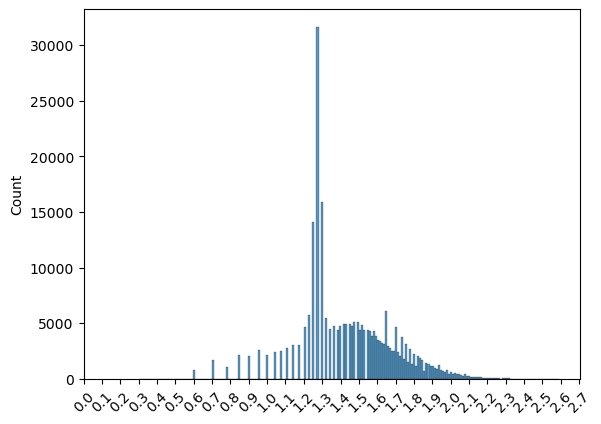

In [ ]:
import seaborn as sns

sns.histplot(np.log10(cdel2.KOR.apply(len).values))
plt.xticks([i/10 for i in range(0, 28)], rotation=45)
plt.show()

In [ ]:
df_droped=df.drop(index=cdel2.index).sort_values(by="KOR", ascending=False, key=lambda col: col.apply(len))

In [ ]:
df_droped.loc[df_droped.ENG.str.contains("Omitted")]

,category,lawName,ENG,KOR
86048,통화ㆍ국채ㆍ금융,한국수출입은행법,(1) (Enforcement Date) This Act shall enter in...,"① (시행일) 이 법은 1998년 4월 1일부터 시행한다. 다만, 증권투자신탁업법 ..."
284875,경찰,경비업법 시행령,"""Key national establishments ... <Omitted> ......",경비업법(이하 “법”이라 한다) 제2조제1호마목에서 “대통령령이 정하는 국가중요시설...
35281,민방위ㆍ소방,위험물안전관리법 시행령,(3) “Person ... <Omitted> ... who is prescribe...,③ 법 제15조제1항 단서에서 “대통령령이 정하는 자”란 다음 각 호의 어느 하나에...
277377,지방제도,지방세기본법,(1) This Act shall enter into force on the dat...,"① 이 법은 공포한 날부터 시행한다. 다만, 부칙 제5조에 따라 개정되는 법률 중 ..."
30213,지방제도,지방자치단체를 당사자로 하는 계약에 관한 법률,(1) This Act shall enter into force on the dat...,"① 이 법은 공포한 날부터 시행한다. 다만, 부칙 제5조에 따라 개정되는 법률 중 ..."
...,...,...,...,...
361502,내국세,개별소비세법,(1) through (7) Omitted.,① 농어촌특별세법중 다음과 같이 개정한다.
361503,내국세,개별소비세법,(1) through (7) Omitted.,② 교육세법중 다음과 같이 개정한다.
361504,내국세,개별소비세법,(1) through (7) Omitted.,③ 교통세법중 다음과 같이 개정한다.
361517,내국세,개별소비세법,(1) through (7) Omitted.,① 교육세법중 다음과 같이 개정한다.


In [ ]:
df_droped.loc[df_droped.lawName=="개별소비세법"]

,category,lawName,ENG,KOR
361269,내국세,개별소비세법,(1) Any person liable to pay the individual co...,① 제3조제2호와 제6조제1항제1호에 따라 납세의무가 있는 자는 매 분기(제1조제2...
361203,내국세,개별소비세법,(2) The goods on which the individual consumpt...,② 개별소비세를 부과할 물품(이하 “과세물품”이라 한다)과 그 세율은 다음과 같다....
361394,내국세,개별소비세법,3. Where taxable goods (excluding used goods b...,"3. 판매장 또는 제조장으로부터 판매 또는 반출된 과세물품을 품질 불량, 변질, 자..."
361410,내국세,개별소비세법,3. Where taxable goods (excluding used goods b...,"3. 판매장 또는 제조장으로부터 판매 또는 반출된 과세물품을 품질 불량, 변질, 자..."
361526,내국세,개별소비세법,(2) From among the goods whose tax rate has be...,② 제1조제2항의 개정규정에 의하여 세율이 인하된 물품으로서 2003년 7월 11일...
...,...,...,...,...
361549,내국세,개별소비세법,(1) This Act shall enter into force on the dat...,① 이 법은 공포한 날부터 시행한다.
361503,내국세,개별소비세법,(1) through (7) Omitted.,② 교육세법중 다음과 같이 개정한다.
361504,내국세,개별소비세법,(1) through (7) Omitted.,③ 교통세법중 다음과 같이 개정한다.
361517,내국세,개별소비세법,(1) through (7) Omitted.,① 교육세법중 다음과 같이 개정한다.


## 1.6.단순히 길이로 자르기

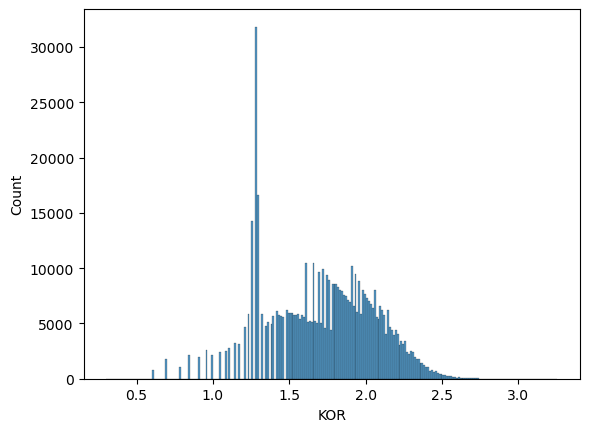

In [ ]:
import seaborn as sns

sns.histplot(np.log10(df.KOR.apply(len)))
plt.show()

In [ ]:
df.KOR.apply(lambda x: np.log10(len(x))).describe()

count    585946.000000
mean          1.725883
std           0.349676
min           0.301030
25%           1.462398
50%           1.755875
75%           1.986772
max           3.253096
Name: KOR, dtype: float64

In [ ]:
delete_index = []
delete_index += df.loc[df.KOR.apply(len)<10**(1.5)].index.to_list()

In [ ]:
df1 = df.drop(index=delete_index)
df1.sort_values(by="ENG", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
191761,노동,국가기술자격법 시행령,(1) Notwithstanding Article 10 (2) and attache...,① 제10조제2항 및 별표 1의 규정에 불구하고 기술ㆍ기능분야 국가기술자격의 응시자...
273760,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(2) Matters to be prescribed by Presidential D...,"② 「도시 및 주거환경정비법」 제2조제3호나목, 같은 호 다목1) 및 2) 외의 부..."
229940,행정일반,정부출연연구기관 등의 설립ㆍ운영 및 육성에 관한 법률,(1) Research institutes listed on the left col...,① 이 법 시행당시 다음 표의 좌란에 규정된 연구기관은 우란에 규정된 이 법에 의하...
233872,국가공무원,공무원임용령,(2) Public officials of class V or below of th...,② 이 영 시행당시 별표 1중 공안직군의 교정ㆍ검찰사무ㆍ마약수사ㆍ출입국관리ㆍ철도공안...
191061,노동,교원의 노동조합 설립 및 운영 등에 관한 법률,(1) Except as otherwise expressly provided for...,① 교원(제4조의2제2호에 해당하는 사람을 포함한다)에 적용할 노동조합 및 노동관계...
...,...,...,...,...
339181,과학ㆍ기술,기상법 시행령,8. Ceiling;,8. 구름고도(Ceiling: 하늘의 5/8 이상을 가리는 최하층 구름고도)
361543,내국세,개별소비세법,7. Omitted.,7. 「특별소비세법」 : 「특별소비세법」 제13조 및 제24조제1항제1호
361537,내국세,개별소비세법,1. Omitted;,1. 「국제조세조정에 관한 법률」 : 「국제조세조정에 관한 법률」 제13조
339183,과학ㆍ기술,기상법 시행령,10. Icing;,10. 착빙(着氷: 공기 중에 냉각된 물방울이 얼음이 되어 항공기 기체에 달라붙는 현상)


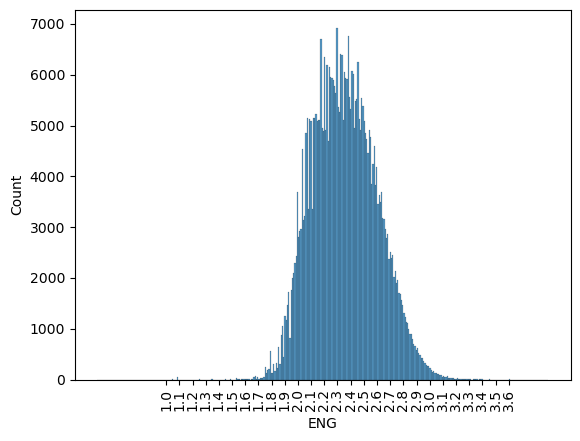

In [ ]:
import matplotlib.pyplot as plt

sns.histplot(np.log10(df1.ENG.apply(len)))
plt.xticks([i/10 for i in range(10,37)], rotation=90)
plt.show()

In [ ]:
df1.loc[df1.ENG.apply(len)<10**(1.5)].sort_values(by="ENG", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
107239,상업ㆍ무역ㆍ공업,벤처투자 촉진에 관한 법률,1. The term “investment” means:,"1. ""투자""란 다음 각 목의 어느 하나에 해당하는 것을 말한다."
307316,병무,병역법,"[Title Amended on Jun. 4, 2013]","[제목개정 2013. 6. 4., 2021. 4. 13.]"
555227,노동,산업안전보건법 시행령,5. Benzotrichloride [98-07-7];,5. 벤조트리클로라이드(Benzotrichloride; 98-07-7)
536032,환경,물환경보전법 시행령,10. Polychlorinated biphenyl;,10. 폴리염화비페닐[polychlorinated biphenyl]
382428,내국세,조세특례제한법 시행규칙,"(1) Deleted. <Mar. 18, 2022>",① 영 제93조의4제9항에서 “기획재정부령으로 정하는 주식”이란 「자본시장과 금융투...
...,...,...,...,...
339181,과학ㆍ기술,기상법 시행령,8. Ceiling;,8. 구름고도(Ceiling: 하늘의 5/8 이상을 가리는 최하층 구름고도)
361537,내국세,개별소비세법,1. Omitted;,1. 「국제조세조정에 관한 법률」 : 「국제조세조정에 관한 법률」 제13조
361539,내국세,개별소비세법,3. Omitted.,3. 「상속세 및 증여세법」 : 「상속세 및 증여세법」 제78조제1항 및 제2항
339183,과학ㆍ기술,기상법 시행령,10. Icing;,10. 착빙(着氷: 공기 중에 냉각된 물방울이 얼음이 되어 항공기 기체에 달라붙는 현상)


In [ ]:
df.ENG.apply(lambda x: np.log10(len(x))).describe()

count    585946.000000
mean          2.182582
std           0.362451
min           0.301030
25%           1.929419
50%           2.214844
75%           2.451786
max           3.899766
Name: ENG, dtype: float64

In [ ]:
delete_index += df1.loc[df1.ENG.apply(len)<10**(1.5)].index.to_list()
delete_index[-5:]

[555229, 571797, 577918, 579270, 580258]

In [ ]:
df1 = df.drop(index=delete_index)
df1.sort_values(by="ENG", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
191761,노동,국가기술자격법 시행령,(1) Notwithstanding Article 10 (2) and attache...,① 제10조제2항 및 별표 1의 규정에 불구하고 기술ㆍ기능분야 국가기술자격의 응시자...
273760,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(2) Matters to be prescribed by Presidential D...,"② 「도시 및 주거환경정비법」 제2조제3호나목, 같은 호 다목1) 및 2) 외의 부..."
229940,행정일반,정부출연연구기관 등의 설립ㆍ운영 및 육성에 관한 법률,(1) Research institutes listed on the left col...,① 이 법 시행당시 다음 표의 좌란에 규정된 연구기관은 우란에 규정된 이 법에 의하...
233872,국가공무원,공무원임용령,(2) Public officials of class V or below of th...,② 이 영 시행당시 별표 1중 공안직군의 교정ㆍ검찰사무ㆍ마약수사ㆍ출입국관리ㆍ철도공안...
191061,노동,교원의 노동조합 설립 및 운영 등에 관한 법률,(1) Except as otherwise expressly provided for...,① 교원(제4조의2제2호에 해당하는 사람을 포함한다)에 적용할 노동조합 및 노동관계...
...,...,...,...,...
576553,정보통신,별정우체국법 시행령,[Article 44-4 Moved to Article 31],[제44조의4는 제31조로 이동 <2011. 5. 30.>]
576552,정보통신,별정우체국법 시행령,[Article 44-3 Moved to Article 45],[제44조의3은 제45조로 이동 <2011. 5. 30.>]
576551,정보통신,별정우체국법 시행령,[Article 44-2 Moved to Article 43],[제44조의2는 제43조로 이동 <2011. 5. 30.>]
576558,정보통신,별정우체국법 시행령,[Article 44-9 Moved to Article 39],[제44조의8는 제39조로 이동 <2011. 5. 30.>]


# 2.특수기호


## 2.1.`[ ]` 대괄호


### 2.1.1.대괄호로 시작하고 끝나는 문장

- 삭제 처리

In [ ]:
# 영어 대괄호 -- [으로 시작하고 ]으로 끝나는 문장

df1.loc[df.ENG.str.contains('^\[[^\]]+\]')].sort_values(by="ENG", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
548054,노동,고용보험법 시행령,[Pursuant to Article 2 (2) of the Addenda to t...,[대통령령 제25022호(2013. 12. 24.) 부칙 제2조제2항의 규정에 의하...
236027,국가공무원,국가공무원법,"[Inconsistent with the Constitution, 2020Hun-M...","[헌법불합치, 2020헌마1181, 2022.11.24, 국가공무원법(2018. 1..."
168190,사회복지,장애인활동 지원에 관한 법률,"[Inconsistency with the Constitution, 2017Hun-...","[헌법불합치, 2017헌가22, 2019헌가8(병합), 2020. 12. 23., ..."
263190,형사법,형법,[Interpreting a ‘public official’ under Articl...,"[한정위헌, 2011헌바117, 2012. 12. 27. 형법(1953. 9. 18..."
223069,선거ㆍ정당,공직선거법,"[Inconsistency with the Constitution, 2018Heon...","[헌법불합치, 2018헌마415, 2019. 2. 28. 공직선거법(2018. 3...."
...,...,...,...,...
576573,정보통신,별정우체국법 시행령,[Article 45-3 Moved to Article 52],[제45조의3은 제52조로 이동 <2011. 5. 30.>]
576572,정보통신,별정우체국법 시행령,[Article 45-2 Moved to Article 50],[제45조의2는 제50조로 이동 <2011. 5. 30.>]
576558,정보통신,별정우체국법 시행령,[Article 44-9 Moved to Article 39],[제44조의8는 제39조로 이동 <2011. 5. 30.>]
576557,정보통신,별정우체국법 시행령,[Article 44-8 Moved to Article 47],[제44조의8은 제47조로 이동 <2011. 5. 30.>]


In [ ]:
# 한글 대괄호 -- [으로 시작하고 ]으로 끝나는 문장

df1.loc[df.KOR.str.contains('^\[[^\]]+\]')].sort_values(by="KOR", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
548054,노동,고용보험법 시행령,[Pursuant to Article 2 (2) of the Addenda to t...,[대통령령 제25022호(2013. 12. 24.) 부칙 제2조제2항의 규정에 의하...
236027,국가공무원,국가공무원법,"[Inconsistent with the Constitution, 2020Hun-M...","[헌법불합치, 2020헌마1181, 2022.11.24, 국가공무원법(2018. 1..."
223069,선거ㆍ정당,공직선거법,"[Inconsistency with the Constitution, 2018Heon...","[헌법불합치, 2018헌마415, 2019. 2. 28. 공직선거법(2018. 3...."
258346,형사법,국가보안법,"<<""If a person who was sentenced to a punishme...","[단순위헌, 2002헌가5, 2002. 11. 28. 국가보안법(1980. 12. ..."
168190,사회복지,장애인활동 지원에 관한 법률,"[Inconsistency with the Constitution, 2017Hun-...","[헌법불합치, 2017헌가22, 2019헌가8(병합), 2020. 12. 23., ..."
...,...,...,...,...
161797,사회복지,노인장기요양보험법 시행령,[Previous Article 4 moved to Article 6 <Jun. 1...,[종전 제4조는 제6조로 이동 <2008. 6. 11.>]
420986,통화ㆍ국채ㆍ금융,특정 금융거래정보의 보고 및 이용 등에 관한 법률,[Previous Article 6 moved to Article 9 <Mar. 2...,[종전 제6조는 제9조로 이동 <2020. 3. 24.>]
311573,국가보훈,국가유공자 등 예우 및 지원에 관한 법률,"[Title Amended on Feb. 6, 2009; Sep. 15, 2011]","[제목개정 2009. 2. 6., 2011. 9. 15.]"
267674,지방제도,국가균형발전 특별법,"[Title Amended on Jan. 7, 2014; Mar. 20, 2018]","[제목개정 2014. 1. 7., 2018. 3. 20.]"


In [ ]:
eng_ll = set(df1.loc[df1.ENG.str.contains('^\[[^\]]+\]$')].index.to_list())
kor_ll = set(df1.loc[df1.KOR.str.contains('^\[[^\]]+\]$')].index.to_list())
drop_index = list(eng_ll.union(kor_ll))
len(drop_index)

2341

In [ ]:
df_tt = df1.drop(index=drop_index)
eng_kor_print(df_tt.loc[df_tt.KOR.str.contains('^\[[^\]]+\]')])

138
_________________1557_________________
[Enforcement Date: Dec. 23, 2022] Article 7 (limited to the part concerning the online petition system)
[시행일: 2022. 12. 23.] 제7조(온라인청원시스템에 관한 부분으로 한정한다)
_________________1592_________________
[Enforcement Date: Dec. 23, 2022] Article 17 (2) (limited to the part regarding the online petition system)
[시행일: 2022. 12. 23.] 제17조제2항(온라인청원시스템에 관한 부분으로 한정한다)
_________________6362_________________
[Title Amended on Jul. 11, 2022][Enforcement Date: Apr. 1, 2023] Article 4 (1) 1 and 2
[제목개정 2022. 7. 11.]</br>[시행일: 2023. 4. 1.] 제4조제1항제1호, 제4조제1항제2호
_________________8973_________________
[Enforcement Date: Mar. 24, 2023] Article 20 (2), 20 (3), and 20 (4)
[시행일: 2023. 3. 24.] 제20조제2항, 제20조제3항, 제20조제4항
_________________16749_________________
<<Enforcement Date: Undesignated>> Among the amended provisions of the former part of Article 14 (5), those concerning specific certificates shall enter into force on the date prescribed by the Supreme Court Regulations 

In [ ]:
eng_kor_print(df_tt.loc[df.ENG.str.contains('^\[[^\]]+\]')])

128
_________________1557_________________
[Enforcement Date: Dec. 23, 2022] Article 7 (limited to the part concerning the online petition system)
[시행일: 2022. 12. 23.] 제7조(온라인청원시스템에 관한 부분으로 한정한다)
_________________1592_________________
[Enforcement Date: Dec. 23, 2022] Article 17 (2) (limited to the part regarding the online petition system)
[시행일: 2022. 12. 23.] 제17조제2항(온라인청원시스템에 관한 부분으로 한정한다)
_________________6362_________________
[Title Amended on Jul. 11, 2022][Enforcement Date: Apr. 1, 2023] Article 4 (1) 1 and 2
[제목개정 2022. 7. 11.]</br>[시행일: 2023. 4. 1.] 제4조제1항제1호, 제4조제1항제2호
_________________8973_________________
[Enforcement Date: Mar. 24, 2023] Article 20 (2), 20 (3), and 20 (4)
[시행일: 2023. 3. 24.] 제20조제2항, 제20조제3항, 제20조제4항
_________________46459_________________
[Enforcement Date: Mar. 25, 2022] The amended provisions of Article 24-6 regarding the teachers of a kindergarten under subparagraph 2 of Article 2 of the Early Childhood Education Act
[시행일 : 2022. 3. 25.] 제24조의6의 개정규정 중

In [ ]:
import re

df_tt.KOR = df_tt.KOR.apply(lambda x: re.sub(r"\[시행[^\%]*\]", "", x).strip(" "))
df_tt.ENG = df_tt.ENG.apply(lambda x: re.sub(r"\[Enforcement[^ㄱ-ㅎ]+\]", "", x).strip(" "))
df_tt.ENG = df_tt.ENG.apply(lambda x: re.sub(r"\<\<Enforcement[^ㄱ-ㅎ]+\>\>", "", x).strip(" "))

In [ ]:
eng_kor_print(df_tt.loc[df_tt.KOR.str.contains('^\[[^\]]+\]')])

6
_________________6362_________________
[Title Amended on Jul. 11, 2022] Article 4 (1) 1 and 2
[제목개정 2022. 7. 11.]</br> 제4조제1항제1호, 제4조제1항제2호
_________________232368_________________
[36 ? (the number of months for which he or she may receive a retirement pension or early retirement pension until he or she dies pursuant to Article 34 (1))] × 1/36
[36-(제34조제1항에 따라 사망 시까지 퇴직연금 또는 조기퇴직연금을 받을 수 있는 개월 수)] × 1/36
_________________374867_________________
[Transfer value under Article 118-10 (1) - Actual transfer price] x Tax rate under Article 118-11.
[제118조의10제1항에 따른 양도가액 - 실제 양도가액] × 제118조의11에 따른 세율
_________________382769_________________
[Calculated amount of global tax － (the tax credit amount for global income except the tax credit for casualty losses ＋ the amount of the tax reduction or exemption for global income) ＋ the amount of the penalty tax on global income] × casualty occurrence rate × (the amount of the business income for the taxable year in which casualty occurred/Amount of t

In [ ]:
eng_kor_print(df_tt.loc[df_tt.ENG.str.contains('^\[[^\]]+\]')])

6
_________________6362_________________
[Title Amended on Jul. 11, 2022] Article 4 (1) 1 and 2
[제목개정 2022. 7. 11.]</br> 제4조제1항제1호, 제4조제1항제2호
_________________232368_________________
[36 ? (the number of months for which he or she may receive a retirement pension or early retirement pension until he or she dies pursuant to Article 34 (1))] × 1/36
[36-(제34조제1항에 따라 사망 시까지 퇴직연금 또는 조기퇴직연금을 받을 수 있는 개월 수)] × 1/36
_________________374867_________________
[Transfer value under Article 118-10 (1) - Actual transfer price] x Tax rate under Article 118-11.
[제118조의10제1항에 따른 양도가액 - 실제 양도가액] × 제118조의11에 따른 세율
_________________382769_________________
[Calculated amount of global tax － (the tax credit amount for global income except the tax credit for casualty losses ＋ the amount of the tax reduction or exemption for global income) ＋ the amount of the penalty tax on global income] × casualty occurrence rate × (the amount of the business income for the taxable year in which casualty occurred/Amount of t

In [ ]:
drop_index = [6362, 232368, 388896, 462765]
df_t1 = df_tt.drop(index=drop_index)

In [ ]:
df_t1.sort_values(by="ENG", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
191761,노동,국가기술자격법 시행령,(1) Notwithstanding Article 10 (2) and attache...,① 제10조제2항 및 별표 1의 규정에 불구하고 기술ㆍ기능분야 국가기술자격의 응시자...
273760,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(2) Matters to be prescribed by Presidential D...,"② 「도시 및 주거환경정비법」 제2조제3호나목, 같은 호 다목1) 및 2) 외의 부..."
229940,행정일반,정부출연연구기관 등의 설립ㆍ운영 및 육성에 관한 법률,(1) Research institutes listed on the left col...,① 이 법 시행당시 다음 표의 좌란에 규정된 연구기관은 우란에 규정된 이 법에 의하...
233872,국가공무원,공무원임용령,(2) Public officials of class V or below of th...,② 이 영 시행당시 별표 1중 공안직군의 교정ㆍ검찰사무ㆍ마약수사ㆍ출입국관리ㆍ철도공안...
191061,노동,교원의 노동조합 설립 및 운영 등에 관한 법률,(1) Except as otherwise expressly provided for...,① 교원(제4조의2제2호에 해당하는 사람을 포함한다)에 적용할 노동조합 및 노동관계...
...,...,...,...,...
516630,약사,약사법,Article 98 (1) 7-5,제98조제1항제7호의5
560827,육운·항공·관광,교통안전법,Article 65 (2) 12,제65조제2항제12호
18760,민사법,입양특례법,Article 6,삭제 <2020. 12. 29.> 제6조
237830,법무,공증인법,,제15조의4제3항·제4항의 개정규정 중 정년에 관한 부분


In [ ]:
df_t1.sort_values(by="KOR", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
273760,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(2) Matters to be prescribed by Presidential D...,"② 「도시 및 주거환경정비법」 제2조제3호나목, 같은 호 다목1) 및 2) 외의 부..."
191061,노동,교원의 노동조합 설립 및 운영 등에 관한 법률,(1) Except as otherwise expressly provided for...,① 교원(제4조의2제2호에 해당하는 사람을 포함한다)에 적용할 노동조합 및 노동관계...
585005,정보통신,통신비밀보호법,1. Part II of the Criminal Act - Chapter I Cri...,"1. 형법 제2편중 제1장 내란의 죄, 제2장 외환의 죄중 제92조 내지 제101조..."
273697,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(3) The authority of the Minister of Employmen...,"③ 「고용보험법」 제20조(일자리 함께하기, 시간선택제고용, 성장유망업종ㆍ지역특화산..."
273723,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(2) Matters to be prescribed by Presidential D...,"② 「건축법」 제4조제5항, 제5조제1항, 제6조, 제8조, 제12조제1항, 제13..."
...,...,...,...,...
226707,행정일반,공공기관의 정보공개에 관한 법률,"Article 6 (3), Article 6 (4)","제6조제3항, 제6조제4항"
203337,육운·항공·관광,항공안전법,Article 135 (6) 1-2,제135조제6항제1호의2
516630,약사,약사법,Article 98 (1) 7-5,제98조제1항제7호의5
205203,해운,마리나항만의 조성 및 관리 등에 관한 법률,Article 28-2 (1) 3,제28조의2제1항제3호


### 2.1.2.대괄호가 포함된 경우

In [ ]:
# df_t1 = df1.drop(index=ll_indexes)
## 한글
kor_lg = df_t1.loc[df_t1.KOR.str.contains(r"\[[^\]]+\]")].index
df_t1.loc[df_t1.KOR.str.contains(r"\[[^\]]+\]")]

,category,lawName,ENG,KOR
770,헌법,남북교류협력에 관한 법률 시행령,3. Plans for cooperative projects [limited to ...,3. 협력사업 계획서[협력사업의 업종이 「통계법」 제22조제2항에 따라 통계청장이 ...
2675,국회,국회법,"(1) In examining any bill, the committee shall...",① 위원회는 안건을 심사할 때 먼저 그 취지의 설명과 전문위원의 검토보고를 듣고 대...
3831,선거ㆍ정당,정치자금법,(2) The annual limited amount that every suppo...,② 후원회가 해당 후원회지정권자에게 연간 기부할 수 있는 한도액(이하 “연간 기부한...
3888,선거ㆍ정당,정치자금법,(2) Where the designation authority of support...,② 후원회지정권자(중앙당은 제외한다)가 후원회를 둘 수 있는 자격을 상실한 경우 후...
3952,선거ㆍ정당,정치자금법,(2) A political party that is paid the ordinar...,② 경상보조금을 지급받은 정당은 그 경상보조금 총액의 100분의 30 이상은 정책연...
...,...,...,...,...
582226,정보통신,전파법 시행령,2. At least 40 points in each class graded on ...,2. 무선통신술과목[제3급 아마추어무선기사(전신급)의 무선통신술과목은 제외한다]은 ...
582270,정보통신,전파법 시행령,10. Filling out the answer sheet using a commu...,"10. 응시자가 시험시간 중에 통신기기 및 전자기기[휴대용 전화기, 휴대용 개인정보..."
583493,정보통신,정보통신망 이용촉진 및 정보보호 등에 관한 법률,1. A request was made by the head of a related...,1. 관계 중앙행정기관의 장의 요청[제1항제9호의 정보 중 「성폭력범죄의 처벌 등에...
584958,정보통신,클라우드컴퓨팅 발전 및 이용자 보호에 관한 법률,(1) A cloud computing service provider and use...,① 클라우드컴퓨팅서비스 제공자와 이용자는 전문인력과 설비 등을 갖춘 기관[이하 “수...


In [ ]:
## 영어
eng_lg = df_t1.loc[df_t1.ENG.str.contains(r"\[[^\]]+\]")].index
df_t1.loc[df_t1.ENG.str.contains(r"\[[^\]]+\]")]

,category,lawName,ENG,KOR
770,헌법,남북교류협력에 관한 법률 시행령,3. Plans for cooperative projects [limited to ...,3. 협력사업 계획서[협력사업의 업종이 「통계법」 제22조제2항에 따라 통계청장이 ...
4058,선거ㆍ정당,정치자금법,4. The written audit opinion compiled by the i...,4. 제41조제1항 본문에 따른 자체 감사기관의 감사의견서와 대의기관(그 수임기관을...
4189,선거ㆍ정당,정치자금법,(1) Where any candidate to run in an election ...,① 공직선거의 후보자가 후원회의 후원금 또는 정당의 지원금으로 「공직선거법」 제56...
4929,행정일반,공공기록물 관리에 관한 법률 시행령,(4) The meeting minutes [including stenographi...,④ 회의록(제2항 후단에 따른 회의의 경우에는 속기록 또는 녹음기록을 포함한다)은 ...
7530,행정일반,온실가스 배출권의 할당 및 거래에 관한 법률 시행령,2. The following matters: the competent agency...,2. 다음 각 목의 사항: 부문별 관장기관[「기후위기 대응을 위한 탄소중립ㆍ녹색성장...
...,...,...,...,...
581502,정보통신,전파법 시행령,5. Aeronautical mobile service: A mobile servi...,5. 항공이동업무: 항공기국과 항공국 간 또는 항공기국 상호 간의 무선통신업무[구명...
581650,정보통신,전파법 시행령,"2. A mobile station, a land station, a land mo...","2. 이동국ㆍ육상국ㆍ육상이동국ㆍ기지국ㆍ이동중계국ㆍ선박국[「선박안전법」, 「어선법」 ..."
582270,정보통신,전파법 시행령,10. Filling out the answer sheet using a commu...,"10. 응시자가 시험시간 중에 통신기기 및 전자기기[휴대용 전화기, 휴대용 개인정보..."
583493,정보통신,정보통신망 이용촉진 및 정보보호 등에 관한 법률,1. A request was made by the head of a related...,1. 관계 중앙행정기관의 장의 요청[제1항제9호의 정보 중 「성폭력범죄의 처벌 등에...


In [ ]:
only_kor = list(set(kor_lg)-set(eng_lg))
only_eng = list(set(eng_lg)-set(kor_lg))
insc_koen = list(set(eng_lg).intersection(kor_lg))
all_kor_eng = list(set(kor_lg).union(set(eng_lg)))

print(f"한글에만: {len(only_kor)}\t영어에만: {len(only_eng)}\n교집합: {len(insc_koen)}\t합집합: {len(all_kor_eng)}")

한글에만: 831	영어에만: 27
교집합: 337	합집합: 1195


In [ ]:
for i in df_t1.loc[df_t1.ENG.str.contains("Wholly")].index:
    print(i)
    print(df_t1.loc[i, "ENG"])
    print(df_t1.loc[i, "KOR"])
    print("________________________________________")

113385
1. Wholly or partially subsidizing the difference between the selling price of an environment-friendly motor vehicle and that of a motor vehicle which is not an environment-friendly motor vehicle;
1. 환경친화적자동차와 환경친화적자동차가 아닌 일반 자동차의 판매 가격간 차액의 전부 또는 일부의 보조
________________________________________
262882
(2) When any person who has not formed or joined an organization or group under Article 4 (1) and contributed any funds for the formation and maintenance of such an organization or group, he/she shall be punished by imprisonment with labor for a definite term of at least three years. [This Article Wholly Amended by Act No. 12896, Dec. 30, 2014]
② 제4조제1항의 단체 또는 집단을 구성하거나 그러한 단체 또는 집단에 가입하지 아니한 사람이 그러한 단체 또는 집단의 구성ㆍ유지를 위하여 자금을 제공하였을 때에는 3년 이상의 유기징역에 처한다.
________________________________________
327908
(1) The State and local governments shall take the following measures so that the knowledge and information poor may freely use the facilities and services of libraries: <Wholly Amended

In [ ]:
for i in df_t1.loc[df_t1.ENG.str.contains(r"\]\:$")].index:
    print(i)
    print(df_t1.loc[i, "ENG"])
    print(df_t1.loc[i, "KOR"])
    print("________________________________________")

7530
2. The following matters: the competent agency by sector [referring to the heads of the relevant central administrative agencies determined by sector pursuant to Article 18 (1) of the Enforcement Decree of the Framework Act on Carbon Neutrality and Green Growth for Coping with Climate Crisis (hereinafter referred to as the "Enforcement Decree of the Framework Act"); hereinafter the same shall apply]:
2. 다음 각 목의 사항: 부문별 관장기관[「기후위기 대응을 위한 탄소중립ㆍ녹색성장 기본법 시행령」(이하 “기본법 시행령”이라 한다)제18조제1항에 따라 소관 부문별로 정해진 관계 중앙행정기관의 장을 말한다. 이하 같다)]
________________________________________
19817
2. A company that falls under any of the following categories as of the closing date of the period for appointing an auditor under Article 10 (1) and (2) of the Act [including a company which is recognized by the Securities and Futures Commission established under Article 19 of the Act on the Establishment of Financial Services Commission (hereinafter referred to as the “Securities and Futures Commission”), and whic

In [ ]:
df_t1.loc[df_t1.ENG.str.contains("This Article Wholly")]

,category,lawName,ENG,KOR
262882,형사법,폭력행위 등 처벌에 관한 법률,(2) When any person who has not formed or join...,② 제4조제1항의 단체 또는 집단을 구성하거나 그러한 단체 또는 집단에 가입하지 아...


In [ ]:
for i in df_t1.loc[df_t1.ENG.str.contains(r"\[This Article Newly")].index:
    print(i)
    print(df_t1.loc[i, "ENG"])
    print(df_t1.loc[i, "KOR"])
    print("__________________________________________________________")

77881
If unavoidable for performing affairs concerning the opening of a foreign medical institution in a free economic zone under Article 23 (1) of the Act, the Minister of Health and Welfare may process data containing resident registration numbers or alien registration numbers under Article 19 of the Enforcement Decree of the Personal Information Protection Act. [This Article Newly Inserted on Mar. 27, 2017]
보건복지부장관은 법 제23조제1항에 따른 경제자유구역 내 외국의료기관의 개설에 관한 사무를 수행하기 위하여 불가피한 경우 「개인정보 보호법 시행령」 제19조에 따른 주민등록번호 또는 외국인등록번호가 포함된 자료를 처리할 수 있다.
__________________________________________________________
352430
Where a person who has purchased any property devolving upon the State fails to pay any installment of its purchase price payable by June 30, 1964 under the sales contract by March 31, 1965, the sales contract for the relevant property shall be canceled: Provided, That the foregoing shall not apply when the payment has not been made due to extenuating circumstance. <Amended on Jan. 27, 20

In [ ]:
for i in df_t1.loc[df_t1.KOR.str.contains(r"\[본조")].index:
    print(i)
    print(df_t1.loc[i, "ENG"])
    print(df_t1.loc[i, "KOR"])
    print("__________________________________________________________")

352430
Where a person who has purchased any property devolving upon the State fails to pay any installment of its purchase price payable by June 30, 1964 under the sales contract by March 31, 1965, the sales contract for the relevant property shall be canceled: Provided, That the foregoing shall not apply when the payment has not been made due to extenuating circumstance. <Amended on Jan. 27, 2005>[This Article Newly Inserted on Dec. 31, 1964]
귀속재산을 매수한 자가 그 매매계약에 의하여 1964년 6월 30일내에 납부하여야 할 분납금을 1965년 3월 31일까지 납부하지 아니한 때에는 그 재산에 대한 매매계약은 해제된다. 다만, 정당한 사유로 납부하지 아니한 경우에는 그러하지 아니하다. <개정 2005. 1. 27.>[본조신설 1964ㆍ12ㆍ31]
__________________________________________________________


In [ ]:
for i in df_t1.loc[df_t1.ENG.str.contains(r"\[This Article Wholly")].index:
    print(i)
    print(df_t1.loc[i, "ENG"])
    print(df_t1.loc[i, "KOR"])
    print("__________________________________________________________")

262882
(2) When any person who has not formed or joined an organization or group under Article 4 (1) and contributed any funds for the formation and maintenance of such an organization or group, he/she shall be punished by imprisonment with labor for a definite term of at least three years. [This Article Wholly Amended by Act No. 12896, Dec. 30, 2014]
② 제4조제1항의 단체 또는 집단을 구성하거나 그러한 단체 또는 집단에 가입하지 아니한 사람이 그러한 단체 또는 집단의 구성ㆍ유지를 위하여 자금을 제공하였을 때에는 3년 이상의 유기징역에 처한다.
__________________________________________________________


In [ ]:
for i in df_t1.loc[df_t1.KOR.str.contains(r"\[제목")].index:
    print(i)
    print(df_t1.loc[i, "ENG"])
    print(df_t1.loc[i, "KOR"])
    print("__________________________________________________________")

In [ ]:
import re
s = '귀속재산을 매수한 자가 그 매매계약에 의하여 1964년 6월 30일내에 납부하여야 할 분납금을 1965년 3월 31일까지 납부하지 아니한 때에는 그 재산에 대한 매매계약은 해제된다. 다만, 정당한 사유로 납부하지 아니한 경우에는 그러하지 아니하다. <개정 2005. 1. 27.>[본조신설 1964ㆍ12ㆍ31]'
re.sub(r"\[본조[^a-z]+\]$", "", s).strip(" ")

'귀속재산을 매수한 자가 그 매매계약에 의하여 1964년 6월 30일내에 납부하여야 할 분납금을 1965년 3월 31일까지 납부하지 아니한 때에는 그 재산에 대한 매매계약은 해제된다. 다만, 정당한 사유로 납부하지 아니한 경우에는 그러하지 아니하다. <개정 2005. 1. 27.>'

In [ ]:
df_t1.ENG = df_t1.ENG.apply(lambda x: re.sub(r"\[This Article Newly[^ㄱ-ㅎ]+\]$|\[This Article Wholly[^ㄱ-ㅎ]+\]$", "", x).strip(" "))
df_t1.KOR = df_t1.KOR.apply(lambda x: re.sub(r"\[본조[^a-z]+\]$", "", x).strip(" "))

In [ ]:
df_t1.KOR = df_t1.KOR.apply(lambda x: x.replace("［", r"\["))
df_t1.KOR = df_t1.KOR.apply(lambda x: x.replace("］", r"\]"))

In [ ]:
for i in df_t1.loc[(df_t1.KOR.str.contains(r"\]$"))&(~df_t1.KOR.str.contains(r"\["))].index:
    print(i)
    print(df_t1.loc[i, "ENG"])
    print(df_t1.loc[i, "KOR"])
    print("_________________________________________________________________________________________")

380995
(2) Biodiesel mixed with fuel that may be used as an alternative to the petroleum products publicly notified by the Minister of Trade, Industry and Energy pursuant to Article 29 (2) 6 of the Petroleum and Alternative Fuel Business Act, shall be exempted from individual consumption tax, only if it is released from a place of manufacturing or a bonded area by not later than December 31, 2011. <Amended by Act No. 10406, Dec. 27, 2010; Act No. 11690, Mar. 23, 2013>
② 「석유 및 석유대체연료 사업법」 제29조제2항제6호에 따라 산업통상자원부장관이 고시한 석유제품을 대체하여 사용할 수 있는 연료에 혼합되어 있는 바이오디젤에 대하여는 2011년 12월 31일까지 제조장 또는 보세구역으로부터 반출되는 분에 한하여 교통·에너지·환경세를 면제한다. <신설 2007. 12. 31., 2008. 2. 29., 2009. 1. 30., 2010. 10. 27., 2013. 3. 23.>]
_________________________________________________________________________________________
453863
"Matters prescribed by Presidential Decree" in Article 4 (4) of the Act means the name, the location map and the land utilization plan of the relevant free trade zone.
법 제4조제4항에서 “대통령령으로 정하는 사항”이란 

In [ ]:
df_t1.loc[380995, "KOR"] = df_t1.loc[380995, "KOR"].replace("]","")
df_t1.loc[453863, "KOR"] = df_t1.loc[453863, "KOR"].replace("]","")

In [ ]:
for i in df_t1.loc[(df_t1.KOR.str.contains(r"\]$"))&(~df_t1.KOR.str.contains(r"\["))].index:
    print(i)
    print(df_t1.loc[i, "ENG"])
    print(df_t1.loc[i, "KOR"])
    print("_________________________________________________________________________________________")

In [ ]:
# for i in df4.loc[df4.KOR.str.contains("［")].index:
#     print(i)
#     print(df4.loc[i, "ENG"])
#     print(df4.loc[i, "KOR"])
#     print("_________________________________________________________________________________________")

In [ ]:
# for i in df4.loc[df4.KOR.str.contains("］")].index:
#     print(i)
#     print(df4.loc[i, "ENG"])
#     print(df4.loc[i, "KOR"])
#     print("_________________________________________________________________________________________")

In [ ]:
df_t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421758 entries, 0 to 585943
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  421758 non-null  object
 1   lawName   421758 non-null  object
 2   ENG       421758 non-null  object
 3   KOR       421758 non-null  object
dtypes: object(4)
memory usage: 32.2+ MB


- 대괄호로 묶인 내용은 앞의 단어를 설명하는 경우임
- 그러나 영어-한글의 매칭 상 대괄호로만 올바르게 매칭된 것은 아님
- 우선 의미상의 변화를 초래하는 기호는 아니기에, 처리를 고려하지는 않겠음

## 2.2.`< >` 꺾쇠 괄호 처리

In [ ]:
df_temp = df_t1.copy()

## < 로 시작하는 경우
df_temp.loc[df_temp.ENG.str.contains(r"^<")]

,category,lawName,ENG,KOR


In [ ]:
# df_temp.drop(index=[18760], inplace=True)

In [ ]:
## < 이 포함되는 경우

df_temp.loc[df_temp.ENG.str.contains("<")].ENG.apply(lambda x: x.index("<")).sort_values(ascending=False)

273760    4084
191061    3601
273697    3091
232050    2967
280171    2704
          ... 
415853      13
356436      12
330432      11
20851       11
519641       7
Name: ENG, Length: 100021, dtype: int64

In [ ]:
df_temp.loc[273760, "KOR"]

'② 「도시 및 주거환경정비법」 제2조제3호나목, 같은 호 다목1) 및 2) 외의 부분, 같은 호 라목, 같은 조 제4호ㆍ제5호, 제3조제5호, 제5조제1항제13호, 제6조제3항, 제7조제1항 단서, 같은 조 제4항, 제8조제1항, 제9조제1항제10호 각 목 외의 부분 단서, 같은 호 라목, 같은 항 제12호, 제10조제1항제1호ㆍ제2호, 제12조제3항 단서, 같은 조 제4항ㆍ제5항ㆍ제7항, 제13조제5항, 제14조제2항, 제15조제3항, 제16조제1항 본문, 같은 조 제3항, 제17조제4항ㆍ제5항, 제19조제1항제7호, 같은 조 제2항제2호, 같은 조 제3항, 같은 조 제7항 각 호 외의 부분, 제21조제3항, 제24조제3항 단서, 제25조제1항제1호ㆍ제2호, 제26조제2항 본문, 제27조제1항 각 호 외의 부분, 같은 조 제2항 본문, 같은 조 제4항 각 호 외의 부분 전단, 제28조제3항, 제29조제4항 단서, 같은 조 제7항, 제31조제1항 각 호 외의 부분, 같은 조 제3항 전단, 같은 조 제4항 후단, 제32조제1항제5호, 같은 조 제3항ㆍ제4항, 제34조제1항제7호, 같은 조 제5항, 제35조제2항제2호, 같은 조 제5항 단서, 같은 조 제9항ㆍ제10항, 제36조제3항ㆍ제4항, 제37조제2항제2호나목, 같은 조 제3항, 제38조제2항, 제39조제2항제5호, 제40조제1항제18호, 같은 조 제4항, 제41조제2항, 같은 조 제5항 단서, 같은 조 제6항, 제45조제1항제13호, 같은 조 제6항, 제46조제4항ㆍ제5항, 제47조제3항, 같은 조 제5항제6호, 같은 조 제6항, 제50조제1항 본문ㆍ단서, 같은 조 제9항 본문, 제52조제1항제13호, 제55조제4항 본문ㆍ단서, 같은 조 제5항, 제56조제1항 본문, 제58조제2항 각 호 외의 부분, 제59조제2항, 같은 조 제3항 전단, 제61조제3항 전단, 제65조제1항 단서, 제66조 각 호 외의 부분, 같은 조 제1호, 제67조제4항제3호, 제68조제2항, 같은 조 제4항 각 호 외의 부분, 같은 

In [ ]:
df_temp.loc[(df_temp.lawName=="소득세법 시행령")&(df_temp.ENG.str.contains("Where a person who has subscribed"))].iloc[0, 3]

'② 이 영 시행전에 청약부금에 가입한 자가 이 영 시행후 청약부금을 해지하고 다시 가입한 때에는 제1항의 규정을 적용하지 아니한다.'

In [ ]:
df_temp.loc[(df_temp.lawName=="소득세법 시행령")&(df_temp.ENG.str.contains("Where a person who has subscribed"))].iloc[0, 2]

'(2) Where a person who has subscribed for the installment savings sub-'

In [ ]:
## > 로 끝나는 경우
import re

pattern = r"\<[^\>]+\>$"
re.sub(pattern, "", "<Amended by Act No. 10417, Dec. 27, 2010; Act No. 13637, Dec. 29, 2015; Act No. 14477, Dec. 27, 2016; Act No. 16568, Aug. 27, 2019>")

df_temp.loc[df_temp.ENG.str.contains(r"\<[^\<]*\>$")].sort_values(by="ENG", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
273760,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(2) Matters to be prescribed by Presidential D...,"② 「도시 및 주거환경정비법」 제2조제3호나목, 같은 호 다목1) 및 2) 외의 부..."
191061,노동,교원의 노동조합 설립 및 운영 등에 관한 법률,(1) Except as otherwise expressly provided for...,① 교원(제4조의2제2호에 해당하는 사람을 포함한다)에 적용할 노동조합 및 노동관계...
273697,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(3) The authority of the Minister of Employmen...,"③ 「고용보험법」 제20조(일자리 함께하기, 시간선택제고용, 성장유망업종ㆍ지역특화산..."
232050,국가공무원,공무원수당 등에 관한 규정,"(5) No special area service allowance, dangero...",⑤ 강등ㆍ정직ㆍ직위해제 또는 휴직(공무상 질병 또는 부상으로 인한 휴직은 제외한다)...
280171,지방제도,지방세특례제한법,(1) Where a person (including persons who have...,"① 「공익사업을 위한 토지 등의 취득 및 보상에 관한 법률」, 「국토의 계획 및 이..."
...,...,...,...,...
460687,상업ㆍ무역ㆍ공업,중소기업협동조합법,(2) Promotion plans shall include: <Amended on...,② 추진계획에는 다음 각 호의 사항이 포함되어야 한다. <개정 2017. 7. 26.>
328411,문화ㆍ공보,무형문화재 보전 및 진흥에 관한 법률,(2) ICHCAP shall be a corporation. <Amended on...,② 유네스코 아ㆍ태무형유산센터는 법인으로 한다. <개정 2020. 12. 8.>
346667,과학ㆍ기술,한국과학기술원법,(1) KAIST shall have a president. <Amended on ...,① 과학기술원에 총장을 둔다. <개정 2009. 2. 6.>
207445,해운,신항만건설 촉진법,Each master plan shall include: <Amended on Oc...,기본계획에는 다음 각 호의 사항이 포함되어야 한다. <개정 2017. 10. 31.>


In [ ]:
df_temp.loc[df_temp.KOR.str.contains(r"\<[^\<]*\>$")].sort_values(by="KOR", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
273760,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(2) Matters to be prescribed by Presidential D...,"② 「도시 및 주거환경정비법」 제2조제3호나목, 같은 호 다목1) 및 2) 외의 부..."
191061,노동,교원의 노동조합 설립 및 운영 등에 관한 법률,(1) Except as otherwise expressly provided for...,① 교원(제4조의2제2호에 해당하는 사람을 포함한다)에 적용할 노동조합 및 노동관계...
273697,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(3) The authority of the Minister of Employmen...,"③ 「고용보험법」 제20조(일자리 함께하기, 시간선택제고용, 성장유망업종ㆍ지역특화산..."
273723,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(2) Matters to be prescribed by Presidential D...,"② 「건축법」 제4조제5항, 제5조제1항, 제6조, 제8조, 제12조제1항, 제13..."
273854,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(5) Matters to be prescribed by Presidential D...,"⑤ 「공유수면 관리 및 매립에 관한 법률」 제5조제1호, 제6조제1항 각 호 외의 ..."
...,...,...,...,...
225269,선거ㆍ정당,공직선거법,(1) This Act shall enter into force on April 1...,① 이 법은 1998년4월1일부터 시행한다. <단서 생략>
102699,수산,어촌·어항법,(2) The Public Agency shall be a corporation. ...,② 공단은 법인으로 한다. <개정 2018. 4. 17.>
328600,문화ㆍ공보,문화재보호법,(2) The Foundation shall be a juristic person....,② 재단은 법인으로 한다. <개정 2014. 5. 28.>
149359,보건·의사,식품위생법,(2) The Information Service shall be a corpora...,② 정보원은 법인으로 한다. <개정 2011. 8. 4.>


In [ ]:
df_temp.loc[(df_temp.KOR.str.contains(r"\<[^\<]*\>$"))&(~df_temp.ENG.str.contains(r"\<[^\<]*\>$"))]

,category,lawName,ENG,KOR
3432,국회,국회사무처법,(1) (Enforcement Date) This Act shall enter in...,① (시행일) 이 법은 공포후 3월이 경과한 날부터 시행한다. <단서 생략>
5082,행정일반,공공기록물 관리에 관한 법률 시행령,(3) Where any error is discovered through an e...,③ 제2항에 따른 상태검사를 통하여 오류사항이 발견된 경우에는 즉시 복구해야 한다....
7429,행정일반,약식절차 등에서의 전자문서 이용 등에 관한 법률,"(5) A court shall, upon receipt of a claim for...",⑤ 법원은 제2항에 따라 약식명령이 청구된 경우 약식명령이나 그 밖의 소송에 관한 ...
8933,행정일반,행정절차법,"(1) Where parties, etc. have appointed or desi...",① 당사자등이 대표자 또는 대리인을 선정하거나 선임하였을 때에는 지체 없이 그 사실...
9834,국가공무원,공무원 성과평가 등에 관한 규정,This Decree shall apply to the state public of...,이 영은 일반직(연구직ㆍ지도직공무원과 전문직공무원을 포함한다) 국가공무원에 대하여 ...
...,...,...,...,...
578786,정보통신,이동통신단말장치 유통구조 개선에 관한 법률,(6) When the Korea Communications Commission r...,⑥ 방송통신위원회는 이동통신단말장치 제조업자가 제1항을 위반하는 행위를 한다고 신고...
585148,정보통신,통신비밀보호법,(7) Except as provided in paragraphs (1) throu...,⑦ 제1항부터 제5항까지에서 규정한 사항 외에 통신사실 확인자료제공을 받은 사실 등...
585190,정보통신,통신비밀보호법,(1) (Enforcement Date) This Act shall enter in...,① (시행일) 이 법은 공포후 3월이 경과한 날부터 시행한다. <단서 생략>
585559,외무,재외공관 공증법,"(6) Where there is an insertion, deletion, rev...","⑥ 사서증서에 글자의 삽입·삭제·변경이 있거나, 칸 밖에 적힌 글자 또는 정정된 부..."


In [ ]:
df_temp.loc[(~df_temp.KOR.str.contains(r"\<[^\<]*\>$"))&(df_temp.ENG.str.contains(r"\<[^\<]*\>$"))]

,category,lawName,ENG,KOR
4424,행정일반,개인정보 보호법 시행령,(1) “Manner prescribed by Presidential Decree”...,① 법 제27조제1항 각 호 외의 부분과 같은 조 제2항 본문에서 “대통령령으로 정...
5228,행정일반,공공기록물 관리에 관한 법률 시행령,2. Any of the following persons who have passe...,2. 다음 각 목의 어느 하나에 해당하는 사람으로서 행정안전부령으로 정하는 기록관리...
12304,국가공무원,부패방지 및 국민권익위원회의 설치와 운영에 관한 법률 시행령,Any person who intends to request measures to ...,법 제62조의2제1항에 따른 신분보장등조치(이하 “신분보장등조치”라 한다)를 신청하...
12624,법원,각급 법원의 설치와 관할구역에 관한 법률,(1) (Enforcement Date) This Act shall enter in...,"① (시행일) 이 법은 1998년 1월 1일부터 시행한다. 다만, 울산지방법원의 설..."
12625,법원,각급 법원의 설치와 관할구역에 관한 법률,(2) (Transitional Measures concerning Jurisdic...,② (사건관할에 관한 경과조치) 1997년 12월 31일 현재 대전지방법원 강경지원...
...,...,...,...,...
570341,해운,선박평형수 관리법,(3) The Minister of Oceans and Fisheries may c...,③ 해양수산부장관은 제1항에 따른 확인ㆍ점검의 결과 제2항 단서에 따른 명백한 근거...
570417,해운,선박평형수 관리법,(2) Where an agency intends to collect fees pu...,② 대행기관이 제1항 단서에 따라 수수료를 징수하는 경우에는 그 기준을 정하여 해양...
577816,정보통신,우체국예금·보험에 관한 법률,(2) The Minister of Science and ICT may allow ...,② 제1항에 따른 시설은 보험계약자등 외의 자에게도 이용하게 할 수 있다.
578761,정보통신,이동통신단말장치 유통구조 개선에 관한 법률,(1) The Korea Communications Commission shall ...,"① 방송통신위원회는 가입자 평균 예상 이익, 이동통신단말장치 판매 현황, 통신시장의..."


In [ ]:
prep_gls_kor = df_temp.KOR.apply(lambda x: re.sub(r"\<[^\<]*\>$", "", x).strip(" "))
prep_gls_eng = df_temp.ENG.apply(lambda x: re.sub(r"\<[^\<]*\>$", "", x).strip(" "))
df_temp.KOR = prep_gls_kor
df_temp.ENG = prep_gls_eng

df_temp

,category,lawName,ENG,KOR
0,헌법,개성공업지구 지원에 관한 법률,The purpose of this Act is to enhance inter-Ko...,이 법은 개성공업지구의 개발ㆍ운영의 지원 및 개성공업지구에 투자하거나 출입ㆍ체류하는...
1,헌법,개성공업지구 지원에 관한 법률,The terms used in this Act are defined as foll...,이 법에서 사용하는 용어의 정의는 다음과 같다.
2,헌법,개성공업지구 지원에 관한 법률,1. The term “Gaeseong Industrial Complex” or “...,1. “개성공업지구”란 남한과 북한 사이의 합의에 따라서 북한의 개성지역 일대에서 ...
3,헌법,개성공업지구 지원에 관한 법률,2. The term “GIC developer” means a South Kore...,2. “개성공업지구 개발업자”란 「남북교류협력에 관한 법률」에 따른 협력사업의 승인...
4,헌법,개성공업지구 지원에 관한 법률,3. The term “GIC management organ” means a cor...,3. “개성공업지구 관리기관”이란 개성공업지구의 관리ㆍ운영을 위하여 북한의 「개성공...
...,...,...,...,...
585938,외무,해외이주법,(2) (Transitional Measures on Persons who have...,② (해외이주허가를 받은 자등에 관한 경과조치) 이 법 시행전에 종전의 규정에 의하...
585940,외무,해외이주법,(2) (Transitional Measures on Persons who have...,② (해외이주적격결정을 받은 자에 관한 경과조치) 이 법 시행전에 종전의 규정에 의...
585941,외무,해외이주법,(1) (Enforcement Date) This Act shall enter in...,① (시행일) 이 법은 공포후 3월이 경과한 날부터 시행한다.
585942,외무,해외이주법,(2) (Transitional Measures on Emigration Agent...,② (해외이주알선업자에 관한 경과조치) 이 법 시행당시 종전의 규정에 의하여 해외이...


In [ ]:
for i in df_temp.loc[df_temp.KOR.str.contains("<")].index:
    print(df_temp.loc[i, "ENG"])
    print(df_temp.loc[i, "KOR"])
    print(i)
    print("_______________________________________")

'''
Deleted Index
    *965, *18760

Modify Index
    70457:       <개정 2000. 1. 12., 2001. 3. 28.>[시행일 2001. 3. 28.]     //이 부분 삭제 (띄어쓰기 포함)
    *225687:      <16> -> 원문자 변환 (나중에 삭제 시 용이하게 하기 위해)
    *225688:      <17> -> 원문자 변환 (나중에 삭제 시 용이하게 하기 위해)
    352430:      <개정 2005. 1. 27.>[본조신설 1964ㆍ12ㆍ31]                 //이 부분 삭제 (띄어쓰기 포함)
    *367840:      <개정 2000. 12. 29.>                                      //이 부분 삭제 (띄어쓰기 포함)
    380995:      <신설 2007. 12. 31., 2008. 2. 29., 2009. 1. 30., 2010. 10. 27., 2013. 3. 23.>]     //이 부분 삭제 (띄어쓰기 포함)
    *399244:      <개정 2008.2.29>부칙                                      //이 부분 삭제 (띄어쓰기 포함)

Rule Based Drop
    생략:별표 --> 행 삭제
    ㆍㆍㆍ --> replace("···")
'''

(1) The national flag is composed of one taegeuk circle (or Yin and Yang) at the center and four trigrams (or gwae) called "gun," "gon," "gam," and "ri" respectively, one at each corner.
① 국기는 가운데의 태극(태극)과 네 모서리의 건곤감리<img id="11371789">(건:?, 곤:?, 감:?, 리:?)</img> 4괘(괘)로 구성한다.
965
_______________________________________
Article 6
삭제 <2020. 12. 29.> 제6조
18760
_______________________________________
1. The amended provisions of Article 7 of the Addenda ··· <omitted> ··· (excluding paragraphs (3) and (4) of that Article): January 1, 2023;
1. ㆍㆍㆍ<생략> ㆍㆍㆍ부칙 제7조(같은 조 제3항 및 제4항은 제외한다)의 개정규정: 2023년 1월 1일
52139
_______________________________________
(2) The Acts amended by Article 6 of this Addenda, the amended provisions of the Acts, which were promulgated before this Act enters into force but their enforcement dates have yet to arrive, shall enter into force on their respective enforcement dates. (Proviso Omitted.)
② 부칙 제6조에 따라 개정되는 법률 중 이 법의 시행 전에 공포되었으나 시행일이 도래하지 아니한 법률을 개정한 부분은 각각 해당 법률의 시행

'\nDeleted Index\n    *965, *18760\n    \nModify Index\n    70457:       <개정 2000. 1. 12., 2001. 3. 28.>[시행일 2001. 3. 28.]     //이 부분 삭제 (띄어쓰기 포함)\n    *225687:      <16> -> 원문자 변환 (나중에 삭제 시 용이하게 하기 위해)\n    *225688:      <17> -> 원문자 변환 (나중에 삭제 시 용이하게 하기 위해)\n    352430:      <개정 2005. 1. 27.>[본조신설 1964ㆍ12ㆍ31]                 //이 부분 삭제 (띄어쓰기 포함)\n    *367840:      <개정 2000. 12. 29.>                                      //이 부분 삭제 (띄어쓰기 포함)\n    380995:      <신설 2007. 12. 31., 2008. 2. 29., 2009. 1. 30., 2010. 10. 27., 2013. 3. 23.>]     //이 부분 삭제 (띄어쓰기 포함)\n    *399244:      <개정 2008.2.29>부칙                                      //이 부분 삭제 (띄어쓰기 포함)\n    \nRule Based Drop\n    생략:별표 --> 행 삭제\n    ㆍㆍㆍ --> replace("···")\n'

In [ ]:
## drop index
drop_idx = [965, 18760]

## modify index
p1 = r"\s\<개정 2000. 12. 29.\>"
p2 = r"\s\<개정 2008.2.29\>부칙"
del_patterns = "|".join([p1, p2])

cir_num_16 = r"\<16\>"  # chr(9327)
cir_num_17 = r"\<17\>"  # chr(9328)

## 생략:별표 케이스 제거 (행)
drop_idx += df_temp.loc[df_temp.KOR.str.contains("생략:별표")].index.to_list()

## ㆍㆍㆍ --> replace("···")
df_temp.KOR.apply(lambda x: x.replace("ㆍㆍㆍ", "···"))

## Total
df2 = df_temp.drop(index=drop_idx)
df2.KOR = df2.KOR.apply(lambda x: re.sub(del_patterns, "", x).strip(" "))
df2.KOR = df2.KOR.apply(lambda x: re.sub(cir_num_16, chr(9327), x))
df2.KOR = df2.KOR.apply(lambda x: re.sub(cir_num_17, chr(9328), x))
df2.KOR = df2.KOR.apply(lambda x: x.replace("ㆍㆍㆍ", "···"))

df2.loc[df2.KOR.str.contains("<")]

,category,lawName,ENG,KOR
52139,교육ㆍ학술,초·중등교육법 시행령,1. The amended provisions of Article 7 of the ...,1. ···<생략> ···부칙 제7조(같은 조 제3항 및 제4항은 제외한다)의 개정...
97088,산림,목재의 지속가능한 이용에 관한 법률,(2) The Acts amended by Article 6 of this Adde...,② 부칙 제6조에 따라 개정되는 법률 중 이 법의 시행 전에 공포되었으나 시행일이 ...
347774,재정ㆍ경제일반,공기업의경영구조개선및민영화에관한법률,(1) (Enforcement Date) This Act shall enter in...,"① (시행일) 이 법은 1998년 4월 1일부터 시행한다. 다만, …<생략>…공기업..."
442382,상업ㆍ무역ㆍ공업,기업활동 규제완화에 관한 특별조치법,"1. Article 2 (7), ··· <omitted> ··· Article 4 ...","1. 제2조제7항, ···<생략>···부칙 제4조(제9항을 제외한다)···<생략>·..."
519641,사회복지,국민건강보험법 시행령,1. ··· <omitted> ··· The amended provisions of...,1. ···<생략> ···부칙 제7조(같은 조 제3항 및 제4항은 제외한다)의 개정...


In [ ]:
df2.loc[df2.KOR.str.contains(">")]

,category,lawName,ENG,KOR
52139,교육ㆍ학술,초·중등교육법 시행령,1. The amended provisions of Article 7 of the ...,1. ···<생략> ···부칙 제7조(같은 조 제3항 및 제4항은 제외한다)의 개정...
97088,산림,목재의 지속가능한 이용에 관한 법률,(2) The Acts amended by Article 6 of this Adde...,② 부칙 제6조에 따라 개정되는 법률 중 이 법의 시행 전에 공포되었으나 시행일이 ...
347774,재정ㆍ경제일반,공기업의경영구조개선및민영화에관한법률,(1) (Enforcement Date) This Act shall enter in...,"① (시행일) 이 법은 1998년 4월 1일부터 시행한다. 다만, …<생략>…공기업..."
442382,상업ㆍ무역ㆍ공업,기업활동 규제완화에 관한 특별조치법,"1. Article 2 (7), ··· <omitted> ··· Article 4 ...","1. 제2조제7항, ···<생략>···부칙 제4조(제9항을 제외한다)···<생략>·..."
519641,사회복지,국민건강보험법 시행령,1. ··· <omitted> ··· The amended provisions of...,1. ···<생략> ···부칙 제7조(같은 조 제3항 및 제4항은 제외한다)의 개정...


In [ ]:
df_t2 = df2.copy()

# df_t2.ENG = df_t2.ENG.apply(lambda x: re.sub(r"\.$|\"$|\:$", "", x).strip(" "))
# df_t2.ENG = df_t2.ENG.apply(lambda x: re.sub(r"\<\<[^ㄱ-ㅎ]+\>\>$", "", x).strip(" "))
# df_t2.ENG = df_t2.ENG.apply(lambda x: re.sub(r"\<[^ㄱ-ㅎ]+\>$", "", x).strip(" "))
patterns = [
    r"\<[^＞]*＞$",
    r"\<[^〉]*〉$",
    r"\<[^\>]*\>[\s]*\.$",
    r"\<[^\>]*\>[\s]*\"$",
    r"\<[^\>]*\>[\s]*\"$",
    r"\<[^\>]*\>[\s]*\:$",
    r"\<Amended[^ㄱ-ㅎ]+\d$|\s\<Newly[^ㄱ-ㅎ]+\d$",
    r"\<[^\>]*\>$"
]
# df_t2.ENG = df_t2.ENG.apply(lambda x: re.sub(r"\<[^＞]*＞$", "", x).strip(" "))
# df_t2.ENG = df_t2.ENG.apply(lambda x: re.sub(r"\<[^〉]*〉$", "", x).strip(" "))
# df_t2.ENG = df_t2.ENG.apply(lambda x: re.sub(r"\<[^\>]*\>[\s]*\.$", "", x).strip(" "))
# df_t2.ENG = df_t2.ENG.apply(lambda x: re.sub(r"\<[^\>]*\>[\s]*\"$", "", x).strip(" "))
# df_t2.ENG = df_t2.ENG.apply(lambda x: re.sub(r"\<[^\>]*\>[\s]*\:$", "", x).strip(" "))
# df_t2.ENG = df_t2.ENG.apply(lambda x: re.sub(r"\<Amended[^ㄱ-ㅎ]+\d$|\s\<Newly[^ㄱ-ㅎ]+\d$", "", x).strip(" "))
# df_t2.ENG = df_t2.ENG.apply(lambda x: re.sub(r"\<[^\>]*\>$", "", x).strip(" "))
df_t2.ENG = df_t2.ENG.apply(lambda x: re.sub("|".join(patterns),"",x).strip(" "))

In [ ]:
p = r"\s\<[^ㄱ-ㅎ]+\>$"
s = '(4) Any person who intends to be granted a tax credit for casualty loss may file an application with the head of a local government having jurisdiction over the place for tax payment, as prescribed by Presidential Decree: Provided, That where the application for a tax credit for casualty loss is filed with the head of a tax office having jurisdiction over the place for tax payment pursuant to Article 58 of the Income Tax Act, it shall be deemed that the application for a tax credit on individual local income tax is also applied. <<Period of Validity of Proviso: Dec. 31, 2016>>'
re.sub(p, "", s)

'(4) Any person who intends to be granted a tax credit for casualty loss may file an application with the head of a local government having jurisdiction over the place for tax payment, as prescribed by Presidential Decree: Provided, That where the application for a tax credit for casualty loss is filed with the head of a tax office having jurisdiction over the place for tax payment pursuant to Article 58 of the Income Tax Act, it shall be deemed that the application for a tax credit on individual local income tax is also applied.'

In [ ]:
eng_kor_print(df_t2.loc[df_t2.ENG.str.contains("<")])

'''
Delete Index
    20851, 29166, 35250, 35281, 114646, 130584, 131334, 284875, 330431, 330432, 356436, 377208, 384374, 384544, 415853, 418726, 498424, 539857, 539858, 539917

Modify Index

    ***309289: < serviceme
    ***374213: <Amended by Act No.
    ***291075, 368475, 427804, 427804: < ?

    ***139625, 181172, 280336, 280336, 377065, 385326, 401208: <
    ***142354, 290930: <Amended on Jun. 8, 2018; Nov. 26, 2019)
    ***352430: < ]
    ***362943: < T
    ***383415: < :
    ***497196, 544793: < ,
    ***535247 : < .
    ***566262: < v
    **423648, 571352: < <
    *467452: < 〉


Rule Based Drop
    *62054, 228122, 289465: < 로 시작해서 숫자로 끝남
    KOR -> x.replace("…", "...")

'''

43
_________________20851_________________
"Person... <omitted> ...in a special relationship, the scope of which is prescribed by Presidential Decree" in Article 101 (1), subparagraphs of Article 218 (2), and Article 392 (1) of the Act means any of the following persons:
법 제101조제1항, 법 제218조제2항 각 호 및 법 제392조제1항에서 "대통령령이 정하는 범위의 특수관계에 있는 자"라 함은 다음 각 호의 어느 하나에 해당하는 자를 말한다.
_________________29166_________________
(1) This Act shall enter into force three months after the date of its promulgation: Provided, That ... <omitted> ... amendments to Acts already promulgated but not yet enforced before this Act enters into force among Acts amended pursuant to Article 6 of the Addenda shall enter into force on the enforcement dates of the respective relevant Acts.
① 이 법은 공포한 날부터 시행한다. 다만, 부칙 제5조에 따라 개정되는 법률 중 이 법 시행 전에 공포되었으나 시행일이 도래하지 아니한 법률을 개정한 부분은 각각 해당 법률의 시행일부터 시행한다.
_________________35250_________________
“Quantity which ... <Omitted> ... is determined by Presidential Decree” in Article 2 (1

'\nDelete Index\n    20851, 29166, 35250, 35281, 114646, 130584, 131334, 284875, 330431, 330432, 356436, 377208, 384374, 384544, 415853, 418726, 498424, 539857, 539858, 539917\n\nModify Index\n\n    ***309289: < serviceme\n    ***374213: <Amended by Act No.\n    ***291075, 368475, 427804, 427804: < ?\n    \n    ***139625, 181172, 280336, 280336, 377065, 385326, 401208: <\n    ***142354, 290930: <Amended on Jun. 8, 2018; Nov. 26, 2019)\n    ***352430: < ]\n    ***362943: < T\n    ***383415: < :\n    ***497196, 544793: < ,\n    ***535247 : < .\n    ***566262: < v\n    **423648, 571352: < <\n    *467452: < 〉\n    \n    \nRule Based Drop\n    *62054, 228122, 289465: < 로 시작해서 숫자로 끝남\n    KOR -> x.replace("…", "...")\n\n'

In [ ]:
df.loc[383415, "ENG"]

'(7) For the purposes of Article 29-7 (1) and (2) of the Act, the number of full-time employees and the number of full-time youth employees, etc., shall be calculated according to the formula classified as follows (a fraction of less than 1/100 shall be deemed nil): <Amended by Presidential Decree No. 28636, Feb. 13, 2018: <Amended by Presidential Decree No. 29527, Feb. 12, 2019>'

In [ ]:
df_t2.loc[571352, "ENG"]

'(2) "Fixed daily hours of work" or "fixed weekly hours of work" in paragraph (1) means the hours of work determined by the collective bargaining agreement or agreement between the seafarers and the shipowner within the scope of hours of work referred to in Article 60 of the Act, and "fixed monthly hours of work" means the hours computed by multiplying the number of fixed monthly working days by the number of fixed daily hours of work: Provided, That where a wage structure is determined without regard to the hours of work, the fixed hours of work of a person on watchkeeping duty at sea shall be the same as those of the seafarers who are not on watchkeeping duty at sea.'

In [ ]:
df_t2.loc[383998, "KOR"]

'⑫ 제11항에도 불구하고 상속인이 상속받은 농지를 1년 이상 계속하여 경작하지 아니하더라도 상속받은 날부터 3년이 되는 날까지 양도하거나 「공익사업을 위한 토지 등의 취득 및 보상에 관한 법률」 및 그 밖의 법률에 따라 협의매수 또는 수용되는 경우로서 상속받은 날부터 3년이 되는 날까지 다음 각 호의 어느 하나에 해당하는 지역으로 지정(관계 행정기관의 장이 관보 또는 공보에 고시한 날을 말한다)되는 경우(상속받은 날 전에 지정된 경우를 포함한다)에는 제11항제1호 및 제2호의 경작기간을 상속인이 경작한 기간으로 본다.'

In [ ]:
## drop index

drop_idx = [20851, 29166, 35250, 35281, 114646, 130584, 131334, 284875, 330431, 330432, 356436, 377208, 384374, 384544, 415853, 418726, 498424, 539857, 539858, 539917]
df3 = df_t2.drop(index=drop_idx)
## Modify Index
'''
Delete Index
    20851, 29166, 35250, 35281, 114646, 130584, 131334, 284875, 330431, 330432, 356436, 377208, 384374, 384544, 415853, 418726, 498424, 539857, 539858, 539917

Modify Index

    ***309289: < serviceme
    ***374213: <Amended by Act No.
    ***291075, 368475, 427804, 427804: < ?

    ***139625, 181172, 280336, 280336, 377065, 385326, 401208: <
    ***142354, 290930: <Amended on Jun. 8, 2018; Nov. 26, 2019)
    ***352430: < ]
    ***362943: < T
    ***383415: < :
    ***497196, 544793: < ,
    ***535247 : < .
    ***566262: < v
    **423648, 571352: < <
    *467452: < 〉


Rule Based Drop
    *62054, 228122, 289465: < 로 시작해서 숫자로 끝남
    KOR -> x.replace("…", "...")

'''
p1 = r"\<[^ㄱ-ㅎ]+serviceme"
p2 = r"\<Amended by Act No\.$"
p3 = r"\<[^ㄱ-ㅎ]+\?$"
p4 = r"\<[^ㄱ-ㅎ]+\)$"
p5 = r"\<[^ㄱ-ㅎ]+\]$"
p6 = r"\<[^ㄱ-ㅎ]+T$"
p7 = r"\<[^ㄱ-ㅎ]+\,$"
p8 = r"\<[^ㄱ-ㅎ]+\:$"
p9 = r"\<[^ㄱ-ㅎ]+1\.$"
p10 = r"\<[^ㄱ-ㅎ]+v$"
del_patterns = "|".join([p1, p2, p3, p4, p5, p6, p7, p8, p9, p10])

df3.ENG = df3.ENG.apply(lambda x: re.sub(del_patterns, "", x).strip(" "))
df3.ENG = df3.ENG.apply(lambda x: x.rstrip("<").strip(" "))

## Rule Based
df3.ENG = df3.ENG.apply(lambda x: x.replace("…", "..."))
df3.ENG = df3.ENG.apply(lambda x: re.sub(r"\<Amended[^ㄱ-ㅎ]+\d$|\<Newly[^ㄱ-ㅎ]+\d$", "", x).strip(" "))

In [ ]:
eng_kor_print(df3.loc[df3.ENG.str.contains("<")])

4
_________________52139_________________
1. The amended provisions of Article 7 of the Addenda ··· <omitted> ··· (excluding paragraphs (3) and (4) of that Article): January 1, 2023;
1. ···<생략> ···부칙 제7조(같은 조 제3항 및 제4항은 제외한다)의 개정규정: 2023년 1월 1일
_________________347774_________________
(1) (Enforcement Date) This Act shall enter into force on April 1, 1998: Provided, That ... <Omitted> ... the amended provisions of Article 6 (3) of the Addenda to the Act on the Improvement of Managerial Structure and Privatization of Public Enterprises (Act No. 5379) shall enter into force on the date of its promulgation.
① (시행일) 이 법은 1998년 4월 1일부터 시행한다. 다만, …<생략>…공기업의경영구조개선 및민영화에관한법률 부칙(法律 第5379號) 제6조제3항의 개정규정은 공포한 날부터 시행한다.
_________________442382_________________
1. Article 2 (7), ··· <omitted> ··· Article 4 of the Addenda (excluding paragraph (9)) ··· <omitted> ··· shall enter into force on the date the Presidential Decree on the organization of the National Emergency Management Agency enters into f

In [ ]:
eng_kor_print(df3.loc[(df3.ENG.str.contains(">"))& ~df3.ENG.str.contains("omitted")])

17
_________________95139_________________
(2) 　Where a person running his or her livestock breeding business defined in subparagraph 8 of Article 2 of the Livestock Industry Act ships edible eggs, he or she shall issue specifications on transactions describing egg-laying date, etc. as prescribed by Ordinance of the Prime Minister. ＜Newly Inserted on Oct. 24, 2017>
② 「축산법」 제2조제8호에 따른 가축사육업을 경영하는 자가 식용란을 출하하는 때에는 총리령으로 정하는 바에 따라 산란일 등을 포함한 거래명세서를 발급하여야 한다.
_________________229993_________________
(3) A term of office of the head of an agency shall be determined by the head of a controlling central administrative agency, not to exceed five years, but not less than two years. In such cases, where business performance is deemed excellent according to the results of business performance assessment of the relevant affiliated responsible administrative agency conducted under Article 12 and 51 (hereinafter referred to as the “assessment results of a responsible administrative agency”), the ter

In [ ]:
df3.loc[427804, "ENG"]

'(3) The Minister of Agriculture, Food and Rural Affairs shall formulate and implement an implementation plan for preservation, management and use of agricultural bio-resources (hereinafter referred to as "implementation plan") every year after consultation with the head of a relevant central administrative agency, in conformity with a master plan, and endeavor to secure financial resources necessary therefor.'

In [ ]:
# drop_index = [427804]

p1 = r"＜[^ㄱ-ㅎ]+\>$"
p2 = r"Newly[^ㄱ-ㅎ]+\?$"
p3 = r"Newly[^ㄱ-ㅎ]+\>$"
p4 = r"Amended[^ㄱ-ㅎ]+\>$"
p5 = r"＜[^ㄱ-ㅎ]+＞$"

del_patterns = "|".join([p1, p2, p3, p4, p5])

df_t3 = df3.copy()
df_t3.ENG = df_t3.ENG.apply(lambda x: re.sub(del_patterns, "", x).strip(" "))

df_t3.loc[df_t3.ENG.str.contains(">")]

,category,lawName,ENG,KOR
52139,교육ㆍ학술,초·중등교육법 시행령,1. The amended provisions of Article 7 of the ...,1. ···<생략> ···부칙 제7조(같은 조 제3항 및 제4항은 제외한다)의 개정...
347774,재정ㆍ경제일반,공기업의경영구조개선및민영화에관한법률,(1) (Enforcement Date) This Act shall enter in...,"① (시행일) 이 법은 1998년 4월 1일부터 시행한다. 다만, …<생략>…공기업..."
442382,상업ㆍ무역ㆍ공업,기업활동 규제완화에 관한 특별조치법,"1. Article 2 (7), ··· <omitted> ··· Article 4 ...","1. 제2조제7항, ···<생략>···부칙 제4조(제9항을 제외한다)···<생략>·..."
519641,사회복지,국민건강보험법 시행령,1. ··· <omitted> ··· The amended provisions of...,1. ···<생략> ···부칙 제7조(같은 조 제3항 및 제4항은 제외한다)의 개정...


In [ ]:
df4 = df_t3.copy()
df4.ENG = df4.ENG.apply(lambda x: re.sub("＜[^ㄱ-ㅎ]+＞$", "", x).strip(" "))
df4.loc[df4.ENG.str.contains("＞")]

,category,lawName,ENG,KOR


In [ ]:
df4.loc[df4.ENG.str.contains(r"\slf")]

,category,lawName,ENG,KOR
27752,지방제도,규제자유특구 및 지역특화발전특구에 관한 규제특례법 시행령,(1) lf the head of the competent local governm...,① 법 제25조제1항에 따라 특화특구의 구조고도화를 권고받은 특화특구관할지방자치단체...


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421727 entries, 0 to 585943
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  421727 non-null  object
 1   lawName   421727 non-null  object
 2   ENG       421727 non-null  object
 3   KOR       421727 non-null  object
dtypes: object(4)
memory usage: 32.2+ MB


In [ ]:
dfff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421724 entries, 0 to 585943
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  421724 non-null  object
 1   lawName   421724 non-null  object
 2   ENG       421724 non-null  object
 3   KOR       421724 non-null  object
dtypes: object(4)
memory usage: 16.1+ MB


In [ ]:
eng_kor_print(dfff.loc[dfff.KOR.str.contains("삭제")])

329
_________________3057_________________
(3) Any contents of the minutes prepared in the stenographic means shall not be deleted, and where a speech is made to correct or revoke the words, the said speech shall be entered into the minutes.
③ 속기로 작성한 회의록의 내용은 삭제할 수 없으며, 발언을 통하여 자구 정정 또는 취소의 발언을 한 경우에는 그 발언을 회의록에 적는다.
_________________3526_________________
(3) When the name of a person listed in the pollbook is found to be misspelled or a person listed in the pollbook is found to be ineligible or deceased, after the period of reading the pollbook lapses but before the pollbook is declared final and conclusive, corrections shall be made, and the grounds therefor and the year/month/date thereof shall be written in the remarks column and the signature of the head of the Gu/Si/Eup/Myeon shall be affixed thereto, on condition that ineligible voters or deceased persons shall be erased.
③ 투표인명부의 열람기간이 지난 후 투표인명부 확정전까지 투표인명부에 등재된 자중 오기 또는 자격이 없는 투표인이나 사망자가 있는 것을 발견한 때에는 이를 수정하고, 비고란에 그 사유와 연월일

## 2.3.기타 특수기호 처리

### 2.3.1.대/중괄호 숫자 불일치

In [ ]:
eng_kor_print(df4.loc[(df4.ENG.str.contains("Omitted"))&(~df4.ENG.str.contains(r"\<Omitted\>"))])

99
_________________3432_________________
(1) (Enforcement Date) This Act shall enter into force three months after the date of its promulgation. (Proviso Omitted.)
① (시행일) 이 법은 공포후 3월이 경과한 날부터 시행한다.
_________________24919_________________
(1) (Enforcement Date) This Act shall enter into force on April 1, 1998. (Proviso Omitted.)
① (시행일) 이 법은 1998년 4월 1일부터 시행한다.
_________________26378_________________
(1) (Enforcement Date) This Act shall enter into force ten months after the date of its promulgation. (Proviso Omitted.)
① (시행일) 이 법은 공포후 10월이 경과한 날부터 시행한다.
_________________30213_________________
(1) This Act shall enter into force on the date of its promulgation. (Proviso Omitted.)
① 이 법은 공포한 날부터 시행한다. 다만, 부칙 제5조에 따라 개정되는 법률 중 이 법 시행 전에 공포되었으나 시행일이 도래하지 아니한 법률을 개정한 부분은 각각 해당 법률의 시행일부터 시행한다.
_________________31498_________________
(1) This Act shall enter into force on the date of its promulgation. (Proviso Omitted.)
① 이 법은 공포한 날부터 시행한다. 다만, 부칙 제5조에 따라 개정되는 법률 중 이 법 시행 전에 공포되었으나 시행일이 도래하

In [ ]:
pattern = r"\[|\]|\{|\}"
find_bracket = re.compile(pattern)
s = "(1) 권리는 나라말싸미 듕귁에 달아[이것은 테스티(한다는 말이야)] (서로(1) 말싸미5) 사맛디(a) 아니할)세{입니다 iii)를 참고iv)하세요"
# except_case1 = r"\([\d]+\)|[\d]+\)|\(\w\)|[i]+[v]*\)"
# except_case2 = r"\(\w\)"
find_bracket.findall(s)

['[', ']', '{']

In [ ]:
eng_kor_print(df4.loc[df4.ENG.apply(lambda x: len(find_bracket.findall(x))%2) == 1])

9
_________________123441_________________
3. An applicant for a license for power generation projects (in cases of a corporation newly established for power generation projects, including the largest stockholder The number of stocks owned by the applicant on his or her own account regardless of whose name is the largest based on the total number of issued stocks with voting rights of the applicant)];
3. 발전사업 허가 신청자[발전사업을 위하여 새로 설립된 법인인 경우에는 신청자의 최대주주(누구의 명의로 하든지 자기의 계산으로 소유하는 주식이 신청자의 의결권 있는 발행주식 총수를 기준으로 가장 많은 주주를 말한다)를 포함한다]
_________________138531_________________
1. Main types of construction {referring to types of construction determined and publicly announced by the Minister of Land, Infrastructure and Transport on the basis of types of construction stated in the detailed statement attached to a bid pursuant to Article 14 (6) of the Enforcement Decree of the Act on Contracts to Which the State Is a Party (including any case applicable mutatis mutandis under the Ordinance of the 

In [ ]:
eng_kor_print(df4.loc[df4.KOR.apply(lambda x: len(find_bracket.findall(x))%2) == 1])

2
_________________96187_________________
(1) Anyone who intends to open a livestock artificial insemination station (hereinafter referred to as "insemination station") in order to inject or implant semen or fertilized eggs into female livestock for business purposes shall be equipped with facilities and human resources required therefor and submit a report thereon to the head of the relevant Si/Gun/Gu.
① 정액 또는 수정란을 암가축에 주입 또는 이식하는 업을 영위하기 위하여 가축 인공수정소[(家畜 人工授精所), 이하 “수정소”라 한다)를 개설하려는 자는 그에 필요한 시설 및 인력을 갖추어 시장ㆍ군수 또는 구청장에게 신고하여야 한다.
_________________393611_________________
7. Other matters prescribed by Ordinance of the Ministry of Economy and Finance, which constitute the basis of the application of conventional tariffs or exemption from customs duties.
7. 그 밖에 협정관세의 적용 또는 관세면제에 대한 기초가 되는 사]항으로서 기획재정부령으로 정하는 사항


In [ ]:
## 영어는 삭제, 한글은 채워 넣기

eng_brkt = df4.loc[df4.ENG.apply(lambda x: len(find_bracket.findall(x))%2) == 1].index
kor_brkt = df4.loc[df4.KOR.apply(lambda x: len(find_bracket.findall(x))%2) == 1].index

In [ ]:
df_t4 = df4.drop(index=eng_brkt, axis=0)
df_t4.loc[96187, "KOR"] = df_t4.loc[96187, "KOR"].replace(r"\)", r"\]")
df_t4.loc[393611, "KOR"] = df_t4.loc[393611, "KOR"].replace(r"\]", "")
df_t4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421718 entries, 0 to 585943
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  421718 non-null  object
 1   lawName   421718 non-null  object
 2   ENG       421718 non-null  object
 3   KOR       421718 non-null  object
dtypes: object(4)
memory usage: 32.2+ MB


### 2.3.2.이상한 특수기호들

In [ ]:
df_t4.loc[df_t4.ENG.str.contains(r"○")]

,category,lawName,ENG,KOR
224240,선거ㆍ정당,공직선거법,"An eligible voter, upon putting a mark on the ...",선거인이 투표용지에 기표를 하는 때에는 “ ”표가 각인된 기표용구를 사용하여야 한다...
238389,법무,공증인법 시행령,1. Appointed notary public: A signboard bearin...,1. 임명공증인: 임명공증인의 성명을 나타낼 수 있는 공증인 ○○○사무소라고 적은 간판


In [ ]:
eng_kor_print(df_t4.loc[df_t4.KOR.str.contains(r"○")])

6
_________________57679_________________
A museum or art gallery having received a certificate of registration pursuant to Article 8 (2) shall mark “Registration No. OO by the Minister of Culture, Sports and Tourism or OO City or Do” on outdoor signboards, etc. pursuant to Article 17 (2) of the Act.
제8조제2항에 따라 등록증을 받은 박물관과 미술관은 법 제17조제2항에 따라 옥외간판 등에 “문화체육관광부장관 또는 ○○시ㆍ도 등록 제○○호”를 표시하여야 한다.
_________________224240_________________
An eligible voter, upon putting a mark on the ballot paper, shall use the marking device on which the mark "" is carved: Provided, That a home voter who votes at his or her place of residence (including shipboard voting) may put the mark "○".
선거인이 투표용지에 기표를 하는 때에는 “ ”표가 각인된 기표용구를 사용하여야 한다. 다만, 거소투표자가 거소투표(선상투표를 포함한다)를 하는 경우에는 “○”표를 할 수 있다.
_________________225453_________________
When any voter makes a mark selecting support or opposition on a ballot paper, he shall make it with an "O" mark.
투표인이 투표용지에 찬성ㆍ반대의 선택을 하는 표를 할 때에는 "○"표를 하여야 한다.
_________________2255

In [ ]:
for i in df_t4.loc[df_t4.KOR.str.contains(r"\?")].index:
    print(f"_______________________{i}_________________________")
    print(df_t4.loc[i, "ENG"])
    print(df_t4.loc[i, "KOR"])

_______________________384423_________________________
Total amount of money, etc. × (number of taxable stocks out of the old stocks ÷ total number of old stocks)
?법 제88조의4제9항의 규정에 의하여 배당소득에 대한 비과세를 적용받고자 하는 우리사주조합원은 증권금융회사가 발급하는 주권예탁증명서를 원천징수의무자에게 제출하여야 한다.
_______________________384424_________________________
Number of new stocks × (number of taxable stocks among old stocks ÷ total number of old stocks)
? 법 제88조의4제9항제2호에서 "대통령령으로 정하는 소액주주"란 「소득세법 시행령」 제38조제3항에 따른 소액주주를 말한다.


In [ ]:
eng_kor_print(df4.loc[df4.ENG.str.contains(r"\?")])

51
_________________7957_________________
(1) The fundamental concept of this Act is to ensure that all youths realize their dignity and values ??as human beings, enjoy the guaranteed right to a happy life, and fulfill their civic responsibilities as an ordinary citizen.
① 이 법은 청년이 인간으로서의 존엄과 가치를 실현하고 행복한 삶을 영위할 수 있는 권리를 보장받으며 건전한 민주시민으로서의 책무를 다할 수 있도록 하는 것을 기본이념으로 한다.
_________________9799_________________
(2) When the Commission decides to pay a monetary award or reward under paragraph (1), it shall, without delay, send the authentic copy of a written decision and a decision notice to the person subject to the monetary award or the applicant for the monetary reward.?
② 위원회는 제1항에 따른 포상금 또는 보상금의 지급 결정을 할 때에는 결정서 정본 및 결정통지서를 포상금 지급대상자 또는 보상금 신청자에게 지체 없이 송부해야 한다.
_________________10451_________________
(1) No position-based wage shall be paid to the following senior executives, and the standard wage shall be reduced by 20 percent until the date on which three months elapse from the date 

In [ ]:
kor_qus_idx = df_t4.loc[df_t4.KOR.str.contains(r"\?")].index.to_list()
eng_qus_idx = df_t4.loc[df_t4.ENG.str.contains(r"\?")].index.to_list()

df5 = df_t4.drop(index=kor_qus_idx+eng_qus_idx, axis=0)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421665 entries, 0 to 585943
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  421665 non-null  object
 1   lawName   421665 non-null  object
 2   ENG       421665 non-null  object
 3   KOR       421665 non-null  object
dtypes: object(4)
memory usage: 16.1+ MB


In [ ]:
df5.sort_values(by="ENG", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
191761,노동,국가기술자격법 시행령,(1) Notwithstanding Article 10 (2) and attache...,① 제10조제2항 및 별표 1의 규정에 불구하고 기술ㆍ기능분야 국가기술자격의 응시자...
273760,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(2) Matters to be prescribed by Presidential D...,"② 「도시 및 주거환경정비법」 제2조제3호나목, 같은 호 다목1) 및 2) 외의 부..."
229940,행정일반,정부출연연구기관 등의 설립ㆍ운영 및 육성에 관한 법률,(1) Research institutes listed on the left col...,① 이 법 시행당시 다음 표의 좌란에 규정된 연구기관은 우란에 규정된 이 법에 의하...
233872,국가공무원,공무원임용령,(2) Public officials of class V or below of th...,② 이 영 시행당시 별표 1중 공안직군의 교정ㆍ검찰사무ㆍ마약수사ㆍ출입국관리ㆍ철도공안...
191061,노동,교원의 노동조합 설립 및 운영 등에 관한 법률,(1) Except as otherwise expressly provided for...,① 교원(제4조의2제2호에 해당하는 사람을 포함한다)에 적용할 노동조합 및 노동관계...
...,...,...,...,...
516630,약사,약사법,Article 98 (1) 7-5,제98조제1항제7호의5
205203,해운,마리나항만의 조성 및 관리 등에 관한 법률,Article 28-2 (1) 3,제28조의2제1항제3호
560827,육운·항공·관광,교통안전법,Article 65 (2) 12,제65조제2항제12호
237813,법무,공증인법,,제15조제3항·제4항 개정규정 중 정년에 관한 부분


In [ ]:
df5.loc[df5.ENG.str.contains(r"^\(\d\d\)\s")].sort_values(by="ENG", ascending=False)

,category,lawName,ENG,KOR
225688,선거ㆍ정당,선거관리위원회법,(17) The director general of secretariat as pr...,⑰제10항 의 사무처장 및 제11항의 사무국장 또는 사무과장과 제16항의 위촉간사는...
225687,선거ㆍ정당,선거관리위원회법,(16) The chairperson of each election commissi...,⑯각급선거 관리위원회위원장은 선거사무를 담당하는 공무원중에서 그 소속행정기관의 장과...
369209,내국세,법인세법 시행령,(16) Except as otherwise provided for in parag...,⑮ 법 제57조제1항의 규정이 적용되는 국외원천소득은 국외에서 발생한 소득으로서 내...
372463,내국세,상속세 및 증여세법 시행령,"(15) Where, in applying this Article, the rele...",⑮ 이 조를 적용함에 있어 주무관청 또는 주무부장관을 알 수 없는 경우에는 관할세무...
277434,지방제도,지방세법,(15) Where the status of a trustor of trusted ...,⑮ 「신탁법」 제10조에 따라 신탁재산의 위탁자 지위의 이전이 있는 경우에는 새로운...
...,...,...,...,...
389796,관세,관세법 시행령,"(10) ""Any ground prescribed by Presidential De...",⑩ 법 제37조제6항 전단에서 “제5항에 따른 보고서를 제출하지 아니하는 등 대통령...
385594,내국세,조세특례제한법 시행령,"(10) ""Amount prescribed by Presidential Decree...","⑩ 법 제106조의9제9항제1호에서 ""대통령령으로 정하는 금액""이란 500만원을 말한다."
385559,내국세,조세특례제한법 시행령,"(10) ""Amount prescribed by Presidential Decree...","⑩ 법 제106조의4제10항제1호에서 ""대통령령으로 정하는 금액""이란 500만원을 ..."
376643,내국세,소득세법 시행령,"(10) ""Amount of the payments specified by Pres...","⑩ 법 제59조의4제3항제2호라목 단서에서 ""대출금의 상환 연체로 인하여 추가로 지..."


# 3.기타 이상한 사항들

## 3.1. his or herhis or her

In [ ]:
for i in df5.loc[df5.ENG.str.contains("his or herhis or her")].index:
    print(f"_______________________{i}_________________________")
    print(df5.loc[i, "ENG"])
    print(df5.loc[i, "KOR"])

_______________________63991_________________________
3. Where he or shehe or she is deemed unsuitable as a member due to neglect of his or herhis or her duties, injury to dignity or on other grounds;
3. 직무태만, 품위손상이나 그 밖의 사유로 인하여 위원으로 적합하지 아니하다고 인정되는 경우
_______________________63992_________________________
4. Where he or shehe or she states that it is difficult to perform his or herhis or her duties.
4. 위원 스스로 직무를 수행하는 것이 곤란하다고 의사를 밝히는 경우
_______________________63996_________________________
(4) The head of a related central administrative agency under Article 3 (1) may request the Committee to include matters on which deliberation is required by the Committee, such as major policy issues and plans relating to the category of professional engineers under his or herhis or her control, in the agenda of the Committee for deliberation.
④ 제3조제1항에 따른 관계 중앙행정기관의 장은 소관 기술사 종목과 관련된 주요 정책 및 계획 등 위원회의 심의가 필요한 사항에 대하여는 위원회에 안건으로 상정할 것을 요청할 수 있다.
_______________________64019________________________

In [ ]:
df5.ENG = df5.ENG.apply(lambda x: x.replace("his or herhis or her", "his or her"))
for i in df5.loc[df5.ENG.str.contains("his or herhis or her")].index:
    print(f"_______________________{i}_________________________")
    print(df5.loc[i, "ENG"])
    print(df5.loc[i, "KOR"])

## 3.2. Proviso Omitted

In [ ]:
for i in df5.loc[df5.ENG.str.contains("Proviso Omitted")].index:
    print(f"_______________________{i}_________________________")
    print(df5.loc[i, "ENG"])
    print(df5.loc[i, "KOR"])

_______________________3432_________________________
(1) (Enforcement Date) This Act shall enter into force three months after the date of its promulgation. (Proviso Omitted.)
① (시행일) 이 법은 공포후 3월이 경과한 날부터 시행한다.
_______________________24919_________________________
(1) (Enforcement Date) This Act shall enter into force on April 1, 1998. (Proviso Omitted.)
① (시행일) 이 법은 1998년 4월 1일부터 시행한다.
_______________________26378_________________________
(1) (Enforcement Date) This Act shall enter into force ten months after the date of its promulgation. (Proviso Omitted.)
① (시행일) 이 법은 공포후 10월이 경과한 날부터 시행한다.
_______________________30213_________________________
(1) This Act shall enter into force on the date of its promulgation. (Proviso Omitted.)
① 이 법은 공포한 날부터 시행한다. 다만, 부칙 제5조에 따라 개정되는 법률 중 이 법 시행 전에 공포되었으나 시행일이 도래하지 아니한 법률을 개정한 부분은 각각 해당 법률의 시행일부터 시행한다.
_______________________31498_________________________
(1) This Act shall enter into force on the date of its promulgation. (Proviso Omitted.)
① 이 

In [ ]:
for i in df5.loc[(df5.ENG.str.contains("Proviso Omitted"))&(df5.KOR.str.contains("다만"))].index:
    print(f"_______________________{i}_________________________")
    print(df5.loc[i, "ENG"])
    print(df5.loc[i, "KOR"])

_______________________30213_________________________
(1) This Act shall enter into force on the date of its promulgation. (Proviso Omitted.)
① 이 법은 공포한 날부터 시행한다. 다만, 부칙 제5조에 따라 개정되는 법률 중 이 법 시행 전에 공포되었으나 시행일이 도래하지 아니한 법률을 개정한 부분은 각각 해당 법률의 시행일부터 시행한다.
_______________________31498_________________________
(1) This Act shall enter into force on the date of its promulgation. (Proviso Omitted.)
① 이 법은 공포한 날부터 시행한다. 다만, 부칙 제5조에 따라 개정되는 법률 중 이 법 시행 전에 공포되었으나 시행일이 도래하지 아니한 법률을 개정한 부분은 각각 해당 법률의 시행일부터 시행한다.
_______________________31561_________________________
(1) This Act shall enter into force on the date of its promulgation. (Proviso Omitted.)
① 이 법은 공포한 날부터 시행한다. 다만, 부칙 제5조에 따라 개정되는 법률 중 이 법 시행 전에 공포되었으나 시행일이 도래하지 아니한 법률을 개정한 부분은 각각 해당 법률의 시행일부터 시행한다.
_______________________39321_________________________
(1) (Enforcement Date) This Act shall enter into force one year after the date of its promulgation. (Proviso Omitted.)
① (시행일) 이 법은 공포 후 1년이 경과한 날부터 시행한다. 다만, 제8조는 2008년 3월 5일부터 시행한다.
___

In [ ]:
drop_index = df5.loc[(df5.ENG.str.contains("Proviso Omitted"))&(df5.KOR.str.contains("다만"))].index.to_list()
drop_index += df5.loc[df5.KOR.str.contains(r"〈")].index.to_list()
df5.loc[drop_index, :]

,category,lawName,ENG,KOR
30213,지방제도,지방자치단체를 당사자로 하는 계약에 관한 법률,(1) This Act shall enter into force on the dat...,"① 이 법은 공포한 날부터 시행한다. 다만, 부칙 제5조에 따라 개정되는 법률 중 ..."
31498,경찰,경비업법,(1) This Act shall enter into force on the dat...,"① 이 법은 공포한 날부터 시행한다. 다만, 부칙 제5조에 따라 개정되는 법률 중 ..."
31561,경찰,경찰공무원 보건안전 및 복지 기본법,(1) This Act shall enter into force on the dat...,"① 이 법은 공포한 날부터 시행한다. 다만, 부칙 제5조에 따라 개정되는 법률 중 ..."
39321,군사,군용항공기 운용 등에 관한 법률,(1) (Enforcement Date) This Act shall enter in...,"① (시행일) 이 법은 공포 후 1년이 경과한 날부터 시행한다. 다만, 제8조는 2..."
86048,통화ㆍ국채ㆍ금융,한국수출입은행법,(1) (Enforcement Date) This Act shall enter in...,"① (시행일) 이 법은 1998년 4월 1일부터 시행한다. 다만, 증권투자신탁업법 ..."
131975,주택·건축·도로,건축사법,(1) (Enforcement Date) This Act shall enter in...,"① (시행일) 이 법은 공포한 날부터 시행한다. 다만, 제1조 및 제7조의 규정은 ..."
190723,노동,공인노무사법,(1) (Enforcement Date) This Act shall enter in...,"① (시행일) 이 법은 공포한 날부터 시행한다. 다만, 제1조 및 제7조의 규정은 ..."
271618,지방제도,인감증명법 시행령,(1) (Enforcement Date) This Decree shall enter...,"① (시행일) 이 영은 공포한 날로부터 시행한다. 다만, 제5조제1항 본문, 동조제..."
277377,지방제도,지방세기본법,(1) This Act shall enter into force on the dat...,"① 이 법은 공포한 날부터 시행한다. 다만, 부칙 제5조에 따라 개정되는 법률 중 ..."
349260,재정ㆍ경제일반,국가를 당사자로 하는 계약에 관한 법률 시행령,(1) (Enforcement Date) This Decree shall enter...,"① (시행일) 이 영은 공포한 날부터 시행한다. 다만, 제19조ㆍ제36조제14호 및..."


In [ ]:
df_t5 = df5.drop(index=drop_index)
for i in df_t5.loc[df_t5.ENG.str.contains("Proviso Omitted")].index:
    print(f"_______________________{i}_________________________")
    print(df_t5.loc[i, "ENG"])
    print(df_t5.loc[i, "KOR"])

_______________________3432_________________________
(1) (Enforcement Date) This Act shall enter into force three months after the date of its promulgation. (Proviso Omitted.)
① (시행일) 이 법은 공포후 3월이 경과한 날부터 시행한다.
_______________________24919_________________________
(1) (Enforcement Date) This Act shall enter into force on April 1, 1998. (Proviso Omitted.)
① (시행일) 이 법은 1998년 4월 1일부터 시행한다.
_______________________26378_________________________
(1) (Enforcement Date) This Act shall enter into force ten months after the date of its promulgation. (Proviso Omitted.)
① (시행일) 이 법은 공포후 10월이 경과한 날부터 시행한다.
_______________________38943_________________________
(1) (Enforcement Date) This Act shall enter into force six months after the date of its promulgation. (Proviso Omitted.)
① (시행일) 이 법은 공포 후 6개월이 경과한 날부터 시행한다.
_______________________41423_________________________
(1) (Enforcement Date) This Act shall enter into force on January 1, 2001. (Proviso Omitted.)
① (시행일) 이 법은 2001년 1월 1일부터 시행한다.
______

In [ ]:
drop_index += [97088, 123059, 312851]
df_t5 = df5.drop(index=drop_index)
df_t5.ENG = df_t5.ENG.apply(lambda x: re.sub(r"\s\(Proviso Omitted[\.]*\)$", "", x))
df_t5.KOR = df_t5.KOR.apply(lambda x: re.sub(r"\[단서 생략\]$", "", x))
for i in df_t5.loc[df_t5.ENG.str.contains("Proviso Omitted")].index:
    print(f"_______________________{i}_________________________")
    print(df_t5.loc[i, "ENG"])
    print(df_t5.loc[i, "KOR"])

In [3]:
import re

def basic_preprocess(df):
    # NaN
    returnFrame = df.dropna(subset=["KOR"], axis=0).reset_index(drop=True)
    returnFrame.KOR = returnFrame.KOR.apply(lambda x: x.strip(" "))
    returnFrame.ENG = returnFrame.ENG.apply(lambda x: x.strip(" "))

    # 길이로 제거 log10() < 1.5
    delete_index = []
    delete_index += returnFrame.loc[returnFrame.KOR.apply(len)<10**(1.5)].index.to_list()
    df_tmp = returnFrame.drop(index=delete_index)
    delete_index += df_tmp.loc[df_tmp.ENG.apply(len)<10**(1.5)].index.to_list()
    returnFrame.drop(index=delete_index, inplace=True)

    return returnFrame

def bracket_preprocess(df):
    # 대괄호
        ## 대괄호로만 이루어진 문자열 drop
    pattern = '^\[[^\]]+\]$'
    del_indexes = df.loc[(df.ENG.str.contains(pattern))|(df.KOR.str.contains(pattern))].index.to_list()
    df_tmp = df.drop(index=del_indexes)

        ## 대괄호로 시작하는 문자열 drop
    df_tmp.KOR = df_tmp.KOR.apply(lambda x: re.sub(r"\[시행[^\%]*\]", "", x).strip(" "))
    df_tmp.ENG = df_tmp.ENG.apply(lambda x: re.sub(r"\[Enforcement[^ㄱ-ㅎ]+\]|\<\<Enforcement[^ㄱ-ㅎ]+\>\>", "", x).strip(" "))
    drop_index = [6362, 232368, 388896, 462765]     # 눈으로 보고 뽑은 인덱스
    df_tmp.drop(index=drop_index, inplace=True)

        ## 대괄호가 포함된 문자열 중 이상한 것들
            ### This Article Newly / Wholly 가 대괄호에 있는 것들 <-> 한국어로는 본조~에 대응
    df_tmp.ENG = df_tmp.ENG.apply(lambda x: re.sub(r"\[This Article Newly[^ㄱ-ㅎ]+\]$|\[This Article Wholly[^ㄱ-ㅎ]+\]$", "", x).strip(" "))
    df_tmp.KOR = df_tmp.KOR.apply(lambda x: re.sub(r"\[본조[^a-z]+\]$", "", x).strip(" "))
            ### 대괄호가 이상한 것들 올바르게 바꾸기
    df_tmp.KOR = df_tmp.KOR.apply(lambda x: x.replace("［", r"\["))
    df_tmp.KOR = df_tmp.KOR.apply(lambda x: x.replace("］", r"\]"))
            ### 눈으로 보고 뽑은 인덱스 수정
    df_tmp.loc[380995, "KOR"] = df_tmp.loc[380995, "KOR"].replace("]","")
    df_tmp.loc[453863, "KOR"] = df_tmp.loc[453863, "KOR"].replace("]","")
    df_tmp = df_tmp.loc[~((df_tmp.ENG=="")|(df_tmp.KOR==""))]

    # 꺽쇠 괄호
        ## 꺽쇠 괄호 쌍인데, 끝나는 부분 제거 (한글 영어 둘 다)
    df_tmp.KOR = df_tmp.KOR.apply(lambda x: re.sub(r"\<[^\<]*\>$", "", x).strip(" "))
    df_tmp.ENG = df_tmp.ENG.apply(lambda x: re.sub(r"\<[^\<]*\>$", "", x).strip(" "))
        ## 끝나는 부분 제거 후 예외 케이스 제거---- 한글
    drop_idx = [965, 18760]     # 눈으로 확인한 drop index

    del_pattern = r"\s\<개정 2000. 12. 29.\>|\s\<개정 2008.2.29\>부칙"    # 예외적인 수정사항 1,
    cir_num_16 = r"\<16\>"  # chr(9327) # 예외적인 수정사항 2 (원문자 부재),
    cir_num_17 = r"\<17\>"  # chr(9328),
    drop_idx += df_tmp.loc[df_tmp.KOR.str.contains("생략:별표")].index.to_list() # 생략:별표 케이스 제거 (행)
    df_tmp.KOR.apply(lambda x: x.replace("ㆍㆍㆍ", "···")) ## ㆍㆍㆍ --> replace("···")

    df_tmp = df_tmp.drop(index=drop_idx)
    df_tmp.KOR = df_tmp.KOR.apply(lambda x: re.sub(del_pattern, "", x).strip(" "))
    df_tmp.KOR = df_tmp.KOR.apply(lambda x: re.sub(cir_num_16, f"{chr(9327)} ", x))
    df_tmp.KOR = df_tmp.KOR.apply(lambda x: re.sub(cir_num_17, f"{chr(9328)} ", x))
    df_tmp.KOR = df_tmp.KOR.apply(lambda x: x.replace("ㆍㆍㆍ", "···"))

        ## 끝나는 부분 제거 후 예외 케이스 제거---- 영어
    patterns = [
        r"\<[^＞]*＞$",
        r"\<[^〉]*〉$",
        r"\<[^\>]*\>[\s]*\.$",
        r"\<[^\>]*\>[\s]*\"$",
        r"\<[^\>]*\>[\s]*\"$",
        r"\<[^\>]*\>[\s]*\:$",
        r"\<Amended[^ㄱ-ㅎ]+\d$|\s\<Newly[^ㄱ-ㅎ]+\d$",
        r"\<[^\>]*\>$"
    ]
    df_tmp.ENG = df_tmp.ENG.apply(lambda x: re.sub("|".join(patterns),"",x).strip(" "))
        ## 예외 제거 후 예외 제거
            ### 눈으로 제거할 인덱스 확인
    drop_idx = [20851, 29166, 35250, 35281, 114646, 130584, 131334, 284875, 330431, 330432, 356436, 377208, 384374, 384544, 415853, 418726, 498424, 539857, 539858, 539917]
    df_tmp.drop(index=drop_idx, inplace=True)
            ### 예외 케이스 정규식 정리
    exp_patterns1 = [
        r"\<[^ㄱ-ㅎ]+serviceme",
        r"\<Amended by Act No\.$",
        r"\<[^ㄱ-ㅎ]+\?$",
        r"\<[^ㄱ-ㅎ]+\)$",
        r"\<[^ㄱ-ㅎ]+\]$",
        r"\<[^ㄱ-ㅎ]+T$",
        r"\<[^ㄱ-ㅎ]+\,$",
        r"\<[^ㄱ-ㅎ]+\:$",
        r"\<[^ㄱ-ㅎ]+1\.$",
        r"\<[^ㄱ-ㅎ]+v$",
        r"\<Amended[^ㄱ-ㅎ]+\d$",
        r"\<Newly[^ㄱ-ㅎ]+\d$"
    ]
            ### 추가 문자열 예외 케이스 제거
    df_tmp.ENG = df_tmp.ENG.apply(lambda x: re.sub("|".join(exp_patterns1), "", x).strip(" "))
    df_tmp.ENG = df_tmp.ENG.apply(lambda x: x.rstrip("<").strip(" "))
    df_tmp.ENG = df_tmp.ENG.apply(lambda x: x.replace("…", "..."))
    # df_tmp.ENG = df_tmp.ENG.apply(lambda x: re.sub(r"\<Amended[^ㄱ-ㅎ]+\d$|\<Newly[^ㄱ-ㅎ]+\d$", "", x).strip(" "))
            ### 뒤틀린 괄호들까지 처리
    exp_patterns2 = [
        r"＜[^ㄱ-ㅎ]+\>$",
        r"Newly[^ㄱ-ㅎ]+\?$",
        r"Newly[^ㄱ-ㅎ]+\>$",
        r"Amended[^ㄱ-ㅎ]+\>$",
        r"＜[^ㄱ-ㅎ]+＞$"
    ]
    df_tmp.ENG = df_tmp.ENG.apply(lambda x: re.sub("|".join(exp_patterns2), "", x).strip(" "))

    return df_tmp

def etc_preprocess(df):
    # 대/중괄호 숫자 일치
    find_bracket = re.compile(r"\[|\]|\{|\}")
    eng_brkt = df.loc[df.ENG.apply(lambda x: len(find_bracket.findall(x))%2) == 1].index
    df_tmp = df.drop(index=eng_brkt, axis=0)
    df_tmp.loc[96187, "KOR"] = df_tmp.loc[96187, "KOR"].replace(r"\)", r"\]")
    df_tmp.loc[393611, "KOR"] = df_tmp.loc[393611, "KOR"].replace(r"\]", "")

    # his or herhis or her
    df_tmp.ENG = df_tmp.ENG.apply(lambda x: x.replace("his or herhis or her", "his or her"))
    df_tmp.ENG = df_tmp.ENG.apply(lambda x: x.replace("him or herhim or her", "him or her"))
    df_tmp.ENG = df_tmp.ENG.apply(lambda x: x.replace("he or shehe or she", "he or she"))

    # Provison Omitted
    drop_index = df_tmp.loc[(df_tmp.ENG.str.contains("Proviso Omitted"))&(df_tmp.KOR.str.contains("다만"))].index.to_list()
    drop_index += df_tmp.loc[df_tmp.KOR.str.contains(r"〈")].index.to_list()
    drop_index += [97088, 123059, 312851]
    df_tmp.drop(index=drop_index, inplace=True)
    df_tmp.ENG = df_tmp.ENG.apply(lambda x: re.sub(r"\s\(Proviso Omitted[\.]*\)$|\s\(Proviso omitted[\.]*\)$", "", x))
    df_tmp.KOR = df_tmp.KOR.apply(lambda x: re.sub(r"\[단서 생략\]$", "", x))

    kor_qus_idx = df_tmp.loc[df_tmp.KOR.str.contains(r"\?")].index.to_list()
    eng_qus_idx = df_tmp.loc[df_tmp.ENG.str.contains(r"\?")].index.to_list()

    df_tmp.drop(index=kor_qus_idx+eng_qus_idx, axis=0, inplace=True)
    return df_tmp

basic_df = basic_preprocess(df)
bracket_df = bracket_preprocess(basic_df)
etc_df = etc_preprocess(bracket_df)
etc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421638 entries, 0 to 585943
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  421638 non-null  object
 1   lawName   421638 non-null  object
 2   ENG       421638 non-null  object
 3   KOR       421638 non-null  object
dtypes: object(4)
memory usage: 16.1+ MB


# 4.세부 전처리

In [4]:
eng_dd_idx = etc_df.duplicated(subset=["ENG"]).index.to_list()
kor_dd_idx = etc_df.duplicated(subset=["KOR"]).index.to_list()

In [5]:
etc_df[etc_df.duplicated(subset=["ENG"], keep=False)].sort_values(by="ENG")

,category,lawName,ENG,KOR
391459,관세,관세법 시행령,"""Any ground prescribed by Presidential Decree""...",법 제178조제1항제4호에서 “대통령령으로 정하는 사유”란 다음 각 호의 어느 하나...
519544,사회복지,국민건강보험법 시행령,"""Any ground prescribed by Presidential Decree""...",법 제109조제5항제1호에서 “대통령령으로 정하는 사유”란 다음 각 호의 어느 하나...
384405,내국세,조세특례제한법 시행령,"""Cause prescribed by Presidential Decree"" in s...","법 제87조의2제3호에서 ""대통령령으로 정하는 사유""란 다음 각 호의 어느 하나에 ..."
415123,통화ㆍ국채ㆍ금융,자본시장과 금융투자업에 관한 법률 시행령,"""Cause prescribed by Presidential Decree"" in s...",법 제74조제4항에서 “대통령령으로 정하는 경우”란 다음 각 호의 어느 하나에 해당...
345383,과학ㆍ기술,원자력안전법 시행령,"""Period prescribed by Presidential Decree"" in ...",법 제38조제1항제2호에서 “대통령령으로 정하는 기간”이란 그 허가를 받은 날부터 ...
...,...,...,...,...
449029,상업ㆍ무역ㆍ공업,산업집적활성화 및 공장설립에 관한 법률,Where the head of a Si/Gun/Gu intends to take ...,시장ㆍ군수 또는 구청장은 다음 각 호의 어느 하나에 해당하는 처분을 하려면 청문을 ...
567691,육운·항공·관광,화물자동차 운수사업법,With respect to the provision of information b...,"운송가맹사업자와 운송가맹점 간의 정보의 제공, 가맹금의 반환, 가맹계약 등에 관해서..."
563860,육운·항공·관광,여객자동차 운수사업법,With respect to the provision of information b...,"플랫폼가맹사업자와 운송가맹점 간의 정보의 제공, 가맹금의 반환, 가맹계약 등에 관하..."
127258,국토개발·도시,도시재생 활성화 및 지원에 관한 특별법 시행령,“Matters prescribed by Presidential Decree” in...,법 제9조제2항제9호에서 “대통령령으로 정하는 사항”이란 다음 각 호의 사항을 말한다.


In [6]:
etc_df[etc_df.duplicated(subset=["KOR"], keep=False)].sort_values(by="KOR")

,category,lawName,ENG,KOR
314763,교육ㆍ학술,2018 평창 동계올림픽대회 및 동계패럴림픽대회 지원 등에 관한 특별법,"1. The term ""Games-related facilities"" means f...","1. ""대회관련시설""이란 대회직접관련시설 및 대회여건조성시설을 말한다."
314576,교육ㆍ학술,"2011대구세계육상선수권대회, 2013충주세계조정선수권대회, 2014인천아시아경기대...","1. The term ""competition-related facility"" mea...","1. ""대회관련시설""이란 대회직접관련시설 및 대회여건조성시설을 말한다."
280733,지방제도,지방세특례제한법,1. Houses newly built during the period betwee...,1. 1986년 1월 1일부터 2000년 12월 31일까지의 기간 중 신축된 주택
380178,내국세,조세특례제한법,1. A house newly built during the period from ...,1. 1986년 1월 1일부터 2000년 12월 31일까지의 기간 중 신축된 주택
95610,축산,축산물 위생관리법,"1. A milk collection station, the average volu...",1. 1일 평균 집유량이 150톤 이상인 집유장: 2014년 7월 1일
...,...,...,...,...
268033,지방제도,국가균형발전 특별법,Any surplus remaining after the settlement of ...,회계의 결산상 잉여금은 다음 연도의 세입에 이입(移入)한다.
485419,국토개발·도시,새만금사업 추진 및 지원에 관한 특별법,A surplus in final accounts shall be carried o...,회계의 결산상 잉여금은 다음 연도의 세입에 이입(移入)한다.
188335,환경,환경정책기본법,Any surplus remaining after the closing of acc...,회계의 결산상 잉여금은 다음 연도의 세입에 이입(移入)한다.
485418,국토개발·도시,새만금사업 추진 및 지원에 관한 특별법,Any surplus funds in the expenditure budget no...,회계의 세출예산 중 해당 회계연도 내에 지출하지 아니한 것은 「국가재정법」 제48조...


In [7]:
dup_indexes = []
dup_indexes += etc_df.loc[etc_df.duplicated(subset=["KOR"], keep=False)].index.to_list()
dup_indexes += etc_df.loc[etc_df.duplicated(subset=["ENG"], keep=False)].index.to_list()
len(dup_indexes)

38126

In [8]:
df_dd = etc_df.drop(index=dup_indexes)
df_dd

,category,lawName,ENG,KOR
0,헌법,개성공업지구 지원에 관한 법률,The purpose of this Act is to enhance inter-Ko...,이 법은 개성공업지구의 개발ㆍ운영의 지원 및 개성공업지구에 투자하거나 출입ㆍ체류하는...
2,헌법,개성공업지구 지원에 관한 법률,1. The term “Gaeseong Industrial Complex” or “...,1. “개성공업지구”란 남한과 북한 사이의 합의에 따라서 북한의 개성지역 일대에서 ...
3,헌법,개성공업지구 지원에 관한 법률,2. The term “GIC developer” means a South Kore...,2. “개성공업지구 개발업자”란 「남북교류협력에 관한 법률」에 따른 협력사업의 승인...
4,헌법,개성공업지구 지원에 관한 법률,3. The term “GIC management organ” means a cor...,3. “개성공업지구 관리기관”이란 개성공업지구의 관리ㆍ운영을 위하여 북한의 「개성공...
5,헌법,개성공업지구 지원에 관한 법률,4. The term “local enterprise of the GIC” mean...,4. “개성공업지구 현지기업”이란 남한주민이 「남북교류협력에 관한 법률」에 따른 협...
...,...,...,...,...
585933,외무,해외이주법,"Where the representative of a corporation, or ...","법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 종업원이 그 법인 또는..."
585936,외무,해외이주법,(2) (Transitional Measures on Emigration Arran...,② (해외이주알선업자에 관한 경과조치) 이 법 시행당시 종전의 규정에 의하여 해외이...
585938,외무,해외이주법,(2) (Transitional Measures on Persons who have...,② (해외이주허가를 받은 자등에 관한 경과조치) 이 법 시행전에 종전의 규정에 의하...
585940,외무,해외이주법,(2) (Transitional Measures on Persons who have...,② (해외이주적격결정을 받은 자에 관한 경과조치) 이 법 시행전에 종전의 규정에 의...


## 4.1.머리 숫자 점검

### 4.1.1."ho"에 해당하는 숫자 패턴

In [9]:
## 숫자. 같은 패턴 --영어
pattern = r"^\d\.\s"
eng_idx = df_dd.loc[df_dd.ENG.str.contains(pattern)].index

In [10]:
## 숫자. 같은 패턴 --한글
pattern = r"^\d\.\s"
kor_idx = df_dd.loc[df_dd.KOR.str.contains(pattern)].index

In [11]:
df_dd.loc[list(set(kor_idx)-set(eng_idx)), :]

,category,lawName,ENG,KOR
491657,국토개발·도시,하수도법,2-2. Any person who interrupts sewage flow by ...,2. 제19조제7항을 위반하여 정당한 사유 없이 공공하수도를 조작하여 하수의 흐름을...
107188,상업ㆍ무역ㆍ공업,벤처기업육성에 관한 특별조치법 시행령,21-2. Request for provision of data or informa...,2. 법 제3조의4제2항에 따른 자료 또는 정보의 제공 요청
260721,형사법,성폭력범죄의 처벌 등에 관한 특례법,4-2. Notwithstanding the provisions of subpara...,5. 제2호부터 제4호까지의 규정에도 불구하고 다음 각 목의 어느 하나에 해당하는 ...


In [12]:
df_ho = df_dd.loc[kor_idx]
df_ho.loc[(df_ho["ENG"].apply(lambda x: x.split(". ")[0])) != (df_ho["KOR"].apply(lambda x: x.split(". ")[0]))]

,category,lawName,ENG,KOR
34104,민방위ㆍ소방,소방시설 설치 및 관리에 관한 법률,"4. The term ""firefighting appliances"" means pr...",7. “소방용품”이란 소방시설등을 구성하거나 소방용으로 사용되는 제품 또는 기기로서...
54122,교육ㆍ학술,학원의 설립·운영 및 과외교습에 관한 법률 시행령,4. A report of a private tutor and a report on...,3. 제16조의2에 따른 개인과외교습자의 신고 및 변경신고: 2014년 1월 1일
56020,문화ㆍ공보,무형문화재 보전 및 진흥에 관한 법률 시행령,2. A person who has completed the courses for ...,3. 법 제30조에 따른 전수교육학교의 전수교육과정을 수료한 사람
80549,통화ㆍ국채ㆍ금융,농림수산업자 신용보증법,6. Fishers under subparagraph 3 of Article 3 o...,2. 「수산업ㆍ어촌 발전 기본법」 제3조제3호에 따른 어업인
107188,상업ㆍ무역ㆍ공업,벤처기업육성에 관한 특별조치법 시행령,21-2. Request for provision of data or informa...,2. 법 제3조의4제2항에 따른 자료 또는 정보의 제공 요청
137327,주택·건축·도로,주택법 시행령,"5. Where a corporation, organization, etc. for...",4. 위원이 임직원으로 재직하고 있거나 최근 3년 내에 재직했던 법인ㆍ단체 등이 해...
160645,사회복지,국민연금법 시행령,3. Where the NHIS deems that no actual benefit...,2. 체납자가 재해 등으로 재산에 심한 손실을 입었거나 사업이 중대한 위기에 처한 ...
165636,사회복지,아이돌봄 지원법,7. Other duties the Mayor/Do Governor deems ne...,6. 그 밖에 원활한 아이돌봄서비스 운영을 위하여 시ㆍ도지사가 필요하다고 인정하는 업무
195814,노동,필수업무 지정 및 종사자 보호ㆍ지원에 관한 법률 시행령,3. Other matters deemed by the Minister of Emp...,4. 그 밖에 고용노동부장관이 필수업무 종사자의 보호ㆍ지원을 위하여 필요하다고 인정...
201674,육운·항공·관광,택시운송사업의 발전에 관한 법률,4. Other costs incurred in purchasing and oper...,5. 그 밖에 택시의 구입 및 운행에 드는 비용으로서 대통령령으로 정하는 비용


In [13]:
eng_kor_print(df_ho.loc[(df_ho["ENG"].apply(lambda x: x.split(". ")[0])) != (df_ho["KOR"].apply(lambda x: x.split(". ")[0]))])

'''숫자도 다르고, 내용도 다른 인덱스 추출
448878: 번역이 어색해짐
491657: 내부 항이 다름
'''

26
_________________ 34104 _________________
4. The term "firefighting appliances" means products or devices prescribed by Presidential Decree, which form firefighting systems, etc. or are used for firefighting.
7. “소방용품”이란 소방시설등을 구성하거나 소방용으로 사용되는 제품 또는 기기로서 대통령령으로 정하는 것을 말한다.
_________________ 54122 _________________
4. A report of a private tutor and a report on modification there on under Article 16-2: January 1, 2014.
3. 제16조의2에 따른 개인과외교습자의 신고 및 변경신고: 2014년 1월 1일
_________________ 56020 _________________
2. A person who has completed the courses for successor training at a successor training school selected under Article 30 of the Act.
3. 법 제30조에 따른 전수교육학교의 전수교육과정을 수료한 사람
_________________ 80549 _________________
6. Fishers under subparagraph 3 of Article 3 of the Framework Act on Fisheries and Fishing Villages Development;
2. 「수산업ㆍ어촌 발전 기본법」 제3조제3호에 따른 어업인
_________________ 107188 _________________
21-2. Request for provision of data or information under Article 3-4 (2) of the Act

'숫자도 다르고, 내용도 다른 인덱스 추출\n448878: 번역이 어색해짐\n491657: 내부 항이 다름\n'

In [14]:
re.sub(r"^\d[\d\-]*\.\s", "", "21-2. Request for provision of data or information under Article 3-4 (2) of the Act.")

'Request for provision of data or information under Article 3-4 (2) of the Act.'

In [15]:
## ho 삭제 및 일괄처리
df_ho = df_dd.copy()
df_ho.drop(index=[448878, 491657], axis=0, inplace=True)
df_ho.ENG = df_ho.ENG.apply(lambda x: re.sub(r"^\d[\d\-\.\s]*\.\s", "", x).strip())
df_ho.KOR = df_ho.KOR.apply(lambda x: re.sub(r"^\d[\d\-\.\s]*\.\s", "", x).strip())

eng_kor_print(df_ho.loc[df_ho.ENG.str.contains(r"^\d[\d\.\-\s]*\.\s")])
df_ho.shape[0]

0


395002

### 4.1.2."hang"에 해당하는 숫자 패턴

In [16]:
pattern = r"^\([\d]+\)\s"
eng_ho_idx = df_ho.loc[df_ho.ENG.str.contains(pattern)].index

In [17]:
# pattern = r"^\([\d]+\)\s"
pattern = f"^[{chr(9312)}-{chr(9332)}]\s"
kor_ho_idx = df_ho.loc[df_ho.KOR.str.contains(pattern)].index

In [18]:
list(set(eng_ho_idx)-set(kor_ho_idx))       # index 완벽일치

[]

In [19]:
df_temp = df_ho.loc[eng_ho_idx]

In [20]:
eng_cond = df_temp.ENG.apply(lambda x: int(re.sub(r"\(|\)", "",x.split(" ")[0])))
kor_cond = df_temp.KOR.apply(lambda x: ord(x.split(" ")[0])-9311)
eng_kor_print(df_temp.loc[eng_cond!=kor_cond])

'''heuristic drop list
[19989, 59352, 66614, 149691, 177108, 346249, 346250, 346251, 346253, 358372, 369207, 369208, 369209, 508275, 517102, 517310]
'''

173
_________________ 397 _________________
(6) Except as provided in paragraphs (1) through (4), matters necessary for genetic testing shall be prescribed by Ordinance of the Ministry of Unification.
⑤ 제1항부터 제4항까지에서 규정한 사항 외에 유전자검사의 실시에 필요한 사항은 통일부령으로 정한다.
_________________ 1472 _________________
(2) Matters necessary for the organization, operation, etc. of an online petition system shall be prescribed by the Supreme Court Regulations, the Constitutional Court Regulations, the National Election Commission Regulations, and Presidential Decree.
③ 온라인청원시스템의 구축ㆍ운영 등에 필요한 사항은 대법원규칙, 헌법재판소규칙, 중앙선거관리위원회규칙 및 대통령령으로 정한다.
_________________ 5969 _________________
(2) Paragraph (1) shall apply mutatis mutandis to the filing of an objection defined in paragraph (2). In such cases, "120 days" defined in paragraph (1) shall be construed as "60 days".
③ 제2항에 따른 이의 신청에 관하여는 제1항을 준용한다. 이 경우 제1항 중 "120일"은 "60일"로 본다.
_________________ 7577 _________________
(2) Any of the following persons may request t

'heuristic drop list\n[19989, 59352, 66614, 149691, 177108, 346249, 346250, 346251, 346253, 358372, 369207, 369208, 369209, 508275, 517102, 517310]\n'

In [21]:
del_index = [
    19989, 59352, 66614, 149691,
    177108, 346249, 346250, 346251,
    346253, 358372, 369207, 369208,
    369209, 508275, 517102, 517310
]
df_hang = df_ho.drop(index=del_index, axis=0)
df_hang.ENG = df_hang.ENG.apply(lambda x: re.sub(r"^\([\d]+\)\s", "", x).strip())
df_hang.KOR = df_hang.KOR.apply(lambda x: re.sub(f"^[{chr(9312)}-{chr(9332)}] ", "", x).strip())
df_hang.loc[(df_hang.ENG.str.contains(r"^\(\d\)"))|(df_hang.KOR.str.contains(f"^[{chr(9312)}-{chr(9322)}]"))]

,category,lawName,ENG,KOR
74703,재정ㆍ경제일반,현금지원제도 운영요령,"The Minister of Trade, Industry and Energy sha...",① 산업통상자원부장관은 신청서를 별표1의 평가표에 따라 고도기술수반여부 및 기술이전...
74763,재정ㆍ경제일반,현금지원제도 운영요령,The Investment Committee shall deliberate and ...,① 위원회는 협상안에 대하여 다음 사항을 심의·의결한다.
74772,재정ㆍ경제일반,현금지원제도 운영요령,An applicant shall annually submit to the Pres...,① 신청인은 매년 별지제2호 서식 현금지원계약 이행 보고서 및 제3호 서식 현금지원...
317442,교육ㆍ학술,국민체육진흥법,"(1) The Minister of Culture, Sports and Touris...","문화체육관광부장관은 제11조제2항에 따른 자격증의 발급, 제12조제1항에 따른 자격..."
448082,상업ㆍ무역ㆍ공업,산업융합 촉진법 시행령,"(5) The Minister of Trade, Industry and Energy...",산업통상자원부장관은 법 제36조제2항에 따라 다음 각 호의 업무를 「산업기술혁신 촉...
491313,국토개발·도시,하수도법,(1) Any of the following persons shall succeed...,"다음 각 호의 어느 하나에 해당하는 자는 관리대행업자의 지위를 승계한다. 다만, 제..."
514779,약사,건강기능식품 기능성 원료 및 기준·규격 인정에 관한 규정,The periods necessary for recognizing function...,① 기능성 원료 및 건강기능식품 인정에 필요한 기간은 다음 각 호와 같다.
516968,약사,약사법 시행령,(2) If a person who fails to pay a penalty sur...,제1항에 따라 과징금을 내지 아니한 자가 독촉장을 받고도 납부기한까지 과징금을 내지...


In [22]:
df_hang.loc[df_hang.ENG.str.contains(r"^\)")]

,category,lawName,ENG,KOR
73131,재정ㆍ경제일반,소비자생활협동조합법 시행령,) Standards for authorization to establish a c...,제4조에 따른 조합의 설립인가 기준: 2021년 1월 1일
140689,수자원·토지·건설,댐 주변지역 친환경 보전 및 활용에 관한 특별법,") The Minister of Environment shall, when he/s...",환경부장관은 제1항에 따라 댐 친환경 활용 계획을 승인한 경우에는 시ㆍ도지사 또는 ...
223528,선거ㆍ정당,공직선거법,) The number of booklet-type election campaign...,제1항의 규정에 따른 책자형 선거공보의 수량은 당해 선거구 안의 세대수와 예상 거소...


In [23]:
df_hang.ENG = df_hang.ENG.apply(lambda x: re.sub(r"^\([\d]+\)\s|^\)\s", "", x).strip())
df_hang.KOR = df_hang.KOR.apply(lambda x: re.sub(f"^[{chr(9312)}-{chr(9332)}] ", "", x).strip())
df_hang.loc[(df_hang.ENG.str.contains(r"^\(\d\)"))|(df_hang.KOR.str.contains(f"^[{chr(9312)}-{chr(9322)}]"))]

,category,lawName,ENG,KOR


In [24]:
df_hang.loc[df_hang.ENG.str.contains(r"^\)")]

,category,lawName,ENG,KOR


**4의2와 같은 이상한 숫자 처리**

In [25]:
df_hang.loc[(df_hang.ENG.str.contains(r"^\d"))|df_hang.KOR.str.contains(r"^\d")]

,category,lawName,ENG,KOR
6,헌법,개성공업지구 지원에 관한 법률,The term “enterprise invested in the GIC” mean...,4의2. “개성공업지구 투자기업”이란 남한주민이 「남북교류협력에 관한 법률」에 따른...
444,헌법,남북 주민 사이의 가족관계와 상속 등에 관한 특례법,If a person who has a spouse left in North Kor...,"1953년 7월 27일 한국 군사정전에 관한 협정(이하 ""정전협정""이라 한다)이 체..."
582,헌법,남북관계 발전에 관한 법률,When at least two representatives of inter-Kor...,2인 이상의 남북회담대표 또는 대북특별사절을 임명할 경우에는 서열을 정하고 수석남북...
856,헌법,남북교류협력에 관한 법률 시행령,"Preliminary demand survey, collection and anal...",3의2. 법 제14조제2호에 따라 반입량을 제한한 물품등의 반입승인에 필요한 사전 ...
928,헌법,남북협력기금법 시행령,Insurances under subparagraph 4 of Article 8 s...,1의2. 법 제8조제4호에 따른 보험은 다음 각 목의 경영 외적인 사유로 인하여 사...
...,...,...,...,...
584014,정보통신,정보통신망 이용촉진 및 정보보호 등에 관한 법률,A person who fails to comply with a request by...,20의4. 제58조의2(제59조제2항에 따라 준용되는 경우를 포함한다)를 위반하여 ...
584314,정보통신,콘텐츠산업 진흥법,Matters concerning the guarantee of the right ...,6의2. 장애인의 콘텐츠접근권(장애인이 장애인이 아닌 사람과 동등하게 콘텐츠에 접근...
584509,정보통신,콘텐츠산업 진흥법,A person who holds or held the post of Grade I...,4급 이상 공무원(고위공무원단에 속하는 일반직공무원을 포함한다) 또는 이에 상당하는...
584990,정보통신,통신비밀보호법,"The term ""illegal wiretapping equipment detect...",8의2. “불법감청설비탐지”라 함은 이 법의 규정에 의하지 아니하고 행하는 감청 또...


In [26]:
df_hang.KOR = df_hang.KOR.apply(lambda x: re.sub(r"^[\d]+의[\d]+\.\s", "", x))
print(df_hang.loc[df_hang.KOR.str.contains(r"^[\d]+의[\d]+\.\s")].shape[0])
eng_kor_print(df_hang.loc[df_hang.KOR.str.contains(r"^[\d]+의[\d]+\.\s")])

0
0


In [27]:
df_hang.loc[df_hang.KOR.str.contains(r"^[\d]+\-")]

,category,lawName,ENG,KOR
555213,노동,산업안전보건법 시행령,4-Nitrodiphenyl [92-93-3] and its salts;,4-니트로디페닐[92-93-3]과 그 염(4-Nitrodiphenyl and its...


In [28]:
df_hang.loc[(df_hang.ENG == "")|(df_hang.KOR == "")]

,category,lawName,ENG,KOR


## 4.2.ASCII코드가 다른 특수기호 점검

### 4.2.1.한글 경우

In [29]:
pattern=[
   '　', '！', '＇', '，', '．', '／', '；', '？', '＾', '＿', '｀', '｜', '￣',
   '、', '。', '‥', '…', '¨', '〃', '―', '∥', '＼', '∼', '´',
   '～', 'ˇ', '˘', '˝', '˚', '˙', '¸', '˛', '¡', '¿', 'ː'
]
eng_kor_print(df_hang.loc[df_hang.KOR.str.contains("|".join(pattern))])
'''ㄱ 특수기호에서 괴상한 애들 정리
    안　녕: 괴상한 띄어쓰기 (글자 사이 드래그)
    “, ” : 쌍따옴표
    ／ : 괴상한 슬래쉬
    ． : 괴상한 온점
    ― : 한자의 하나 일(一)이 아님
'''

21
_________________ 23675 _________________
When a victim, etc. has been returned of all or part of the property of the victim of a predicate offense or received compensation for damage with the property of the victim of a predicate offense, such as property of the victim of a predicate offense within the scope for return or compensation therefor shall not be returned.
피해자등이 범죄피해재산의 전부　또는 일부를 반환받았거나 범죄피해재산에 관하여 손해배상을 받았을 때에는 그 반환받거나 배상받은 재산의 범위에서 회복대상재산을 환부하지 않는다.
_________________ 39260 _________________
The term "air defense identification zone" means a specified airspace defined pursuant to Article 9 over land or water where easy identification, location, and control of aircraft are required for the purposes of national security;
“방공식별구역”이란 국가안전보장 목적상 항공기의 용이한 식별， 위치 확인 및 통제가 요구되는 지상 및 해상의 일정 공역(空域)으로서 제9조에 따라 설정된 공역을 말한다.
_________________ 39262 _________________
In order to prevent collisions with other aircraft or other objects, each military aircraft shall be flown in complianc

'ㄱ 특수기호에서 괴상한 애들 정리\n    안\u3000녕: 괴상한 띄어쓰기 (글자 사이 드래그)\n    “, ” : 쌍따옴표\n    ／ : 괴상한 슬래쉬\n    ． : 괴상한 온점\n    ― : 한자의 하나 일(一)이 아님\n'

In [30]:
pattern=[
   '＂', '）', '［', '］', '｛', '｝',  '〔', '〕', '〈', '〉', '《', '》', '【', '】'
]
eng_kor_print(df_hang.loc[df_hang.KOR.str.contains("|".join(pattern))])
'''ㄴ 한자 특수기호
    “, ” : 괴상한 쌍따옴표(2)
    ‘, ’ : 괴상한 따옴표
    『, 』: 괴상한 .. 뭐라해야 하나.. 직각괄호
    （ : 괴상한 괄호
'''

0


'ㄴ 한자 특수기호\n    “, ” : 괴상한 쌍따옴표(2)\n    ‘, ’ : 괴상한 따옴표\n    『, 』: 괴상한 .. 뭐라해야 하나.. 직각괄호\n    （ : 괴상한 괄호\n'

In [31]:
pattern=[
   '＜','＞', '≠','≤','≥','∞','∴','♂','♀','∠','⊥','⌒','∂','∇','≡','≒','≪','≫','√','∽','∝',
    '∵','∫','∬','∈','∋','⊆','⊇','⊂','⊃','∪','∩','∧','∨','￢','⇒','⇔','∀','∃','∮','∑','∏'
]
eng_kor_print(df_hang.loc[df_hang.KOR.str.contains("|".join(pattern))])
'''ㄷ 한자 특수기호
    ＋, －, ＝, ×, ÷, ± : 연산 기호

'''

0


'ㄷ 한자 특수기호\n    ＋, －, ＝, ×, ÷, ± : 연산 기호\n\n'

In [32]:
pattern = [
    '＄', '￦', 'Ｆ', '′', '″', 'Å', '￠', '￡', '￥', '¤', '℉', '‰', '㎕', '㎗', '㎘', '㏄', '㎣', '㎤', '㎦', '㎙', '㎚', '㎛',
    '㎠', '㏊', '㎍', '㎏', '㏏', '㎈', '㎉', '㎧', '㎨', '㎰', '㎱', '㎲', '㎳', '㎴', '㎵', '㎷', '㎸', '㎹',
    '㎀', '㎁', '㎂', '㎃', '㎄', '㎺', '㎻', '㎼', '㎽', '㎾', '㎿', '㎐', '㎔', 'Ω', '㏀', '㏁', '㎊', '㎋', '㎌', '㏖', '㏅', '㎭', '㎮', '㎯',
    '㏛', '㎩', '㎪', '㎫', '㎬', '㏝', '㏐', '㏓', '㏃', '㏉', '㏜', '㏆'
]
eng_kor_print(df_hang.loc[df_hang.KOR.str.contains("|".join(pattern))])
'''ㄹ 한자 특수기호
    ％ : 하나 밖에 없음
    ㎜, ㎖, ℓ, ㎞, ㎡, ㎒, ㎓, ㎑, ㎶ : 단위 기호들
'''

0


'ㄹ 한자 특수기호\n    ％ : 하나 밖에 없음\n    ㎜, ㎖, ℓ, ㎞, ㎡, ㎒, ㎓, ㎑, ㎶ : 단위 기호들\n'

In [33]:
pattern = [
    '＃', '＆', '＊', '＠', '§', '※', '☆', '★', '●', '◎', '◇', '◆', '□', '■', '△', '▲', '▽', '▼', '→', '←', '↑', '↓', '↔', '〓', '◁', '◀',
    '▷', '▶', '♤', '♠', '♡', '♥', '♧', '♣', '⊙', '◈', '▣', '◐', '◑', '▒', '▤', '▥', '▨', '▧', '▦', '▩', '♨', '☏', '☎', '☜', '☞', '¶', '†',
    '‡', '↕', '↗', '↙', '↖', '↘', '♭', '♩', '♪', '♬', '㉿', '㈜', '№', '㏇', '™', '㏂', '㏘', '℡', 'ª', 'º'
]
eng_kor_print(df_hang.loc[df_hang.KOR.str.contains("|".join(pattern))])
'''ㅁ 한자
    ○ : 괴상한 원
'''

0


'ㅁ 한자\n    ○ : 괴상한 원\n'

In [34]:
pattern = [
    '─', '│', '┌', '┐', '┘', '└', '├', '┬', '┤', '┴', '┼', '━', '┃', '┏', '┓', '┛', '┗', '┣', '┳', '┫', '┻', '╋', '┠', '┯', '┨', '┷', '┿',
    '┝', '┰', '┥', '┸', '╂', '┒', '┑', '┚', '┙', '┖', '┕', '┎', '┍', '┞', '┟', '┡', '┢', '┦', '┧', '┩', '┪', '┭', '┮', '┱', '┲', '┵', '┶',
    '┹', '┺', '┽', '┾', '╀', '╁', '╃', '╄', '╅', '╆', '╇', '╈', '╉', '╊'
]
eng_kor_print(df_hang.loc[df_hang.KOR.str.contains("|".join(pattern))])

0


In [35]:
pattern = [
    '㉠', '㉡', '㉢', '㉣', '㉤', '㉥', '㉦', '㉧', '㉨', '㉩', '㉪', '㉫', '㉬', '㉭', '㉮', '㉯', '㉰', '㉱', '㉲', '㉳', '㉴', '㉵', '㉶', '㉷', '㉸', '㉹', '㉺',
    '㉻', '㈀', '㈁', '㈂', '㈃', '㈄', '㈅', '㈆', '㈇', '㈈', '㈉', '㈊', '㈋', '㈌', '㈍', '㈎', '㈏', '㈐', '㈑', '㈒', '㈓', '㈔', '㈕', '㈖', '㈗', '㈘', '㈙',
    '㈚', '㈛'
]
eng_kor_print(df_hang.loc[df_hang.KOR.str.contains("|".join(pattern))])

0


### 4.2.2.영어 경우

In [36]:
pattern=[
    '！','＇','．','／','：','；','？','＾','＿','｀','｜','￣','、','。','‥','…','¨','〃','∥','＼','∼','´'
    '～','ˇ','˘','˝','˚','˙','¸','˛','¡','¿','ː'
]
eng_kor_print(df_hang.loc[df_hang.ENG.str.contains("|".join(pattern))])
'''ㄱ 특수기호에서 괴상한 애들 정리
    안　녕: 괴상한 띄어쓰기 (글자 사이 드래그)
    “, ” : 쌍따옴표
    ― : 한자의 하나 일(一)이 아님
    '­', -> 얜 도저히 뭔지 모르겠음
    ，: 괴상한 콤마
'''

0


"ㄱ 특수기호에서 괴상한 애들 정리\n    안\u3000녕: 괴상한 띄어쓰기 (글자 사이 드래그)\n    “, ” : 쌍따옴표\n    ― : 한자의 하나 일(一)이 아님\n    '\xad', -> 얜 도저히 뭔지 모르겠음\n    ，: 괴상한 콤마\n"

In [37]:
pattern=[
    '＂','（','）','［','］','｛','｝','〔','〕','〈','〉','《','》','「','」','『','』','【','】'
]
eng_kor_print(df_hang.loc[df_hang.ENG.str.contains("|".join(pattern))])
'''ㄴ 한자 특수기호
    “, ” : 괴상한 쌍따옴표(2)
    ‘, ’ : 괴상한 따옴표
    ） : 괴상한 괄호
'''

1
_________________ 421565 _________________
A member who fails to be appointed immediately after the expiration of the term of office his/her predecessor, among the members referred to in Article 13 (1) 3 through 7, the term of office under paragraph (1）shall be deemed to have started immediately after the expiration of the term of office of the former member.
제13조제1항제3호부터 제7호까지의 위원 중 전임(前任)위원의 임기만료 즉시 임명되지 아니한 위원의 경우(전임위원과 추천기관이 같은 경우를 말한다) 제1항의 임기는 전임위원의 임기만료 즉시 개시된 것으로 본다.


'ㄴ 한자 특수기호\n    “, ” : 괴상한 쌍따옴표(2)\n    ‘, ’ : 괴상한 따옴표\n    ） : 괴상한 괄호\n'

In [38]:
pattern=[
    '＜', '＞', '≠', '≤', '≥', '∞', '∴', '♂', '♀', '∠', '⊥', '⌒', '∂', '∇', '≡', '≒', '≪', '≫', '√', '∽', '∝',
    '∵', '∫', '∬', '∈', '∋', '⊆', '⊇', '⊂', '⊃', '∪', '∩', '∧', '∨', '￢', '⇒', '⇔', '∀', '∃', '∮', '∑', '∏'
]
eng_kor_print(df_hang.loc[df_hang.ENG.str.contains("|".join(pattern))])
'''ㄷ 한자 특수기호
    ＋, －, ＝, ×, ÷, ± : 연산 기호
'''

0


'ㄷ 한자 특수기호\n    ＋, －, ＝, ×, ÷, ± : 연산 기호\n'

In [39]:
pattern = [
    '＄', '％', '￦', 'Ｆ', '′', '″', 'Å', '￠', '￡', '￥', '¤', '℉', '‰', '㎕', '㎖', '㎗', 'ℓ', '㎘', '㏄', '㎣', '㎤', '㎦', '㎙', '㎚', '㎛',
    '㎜', '㎞', '㎟', '㎠', '㎡', '㏊', '㎍', '㎏', '㏏', '㎈', '㎉', '㎧', '㎨', '㎰', '㎱', '㎲', '㎳', '㎴', '㎵', '㎶', '㎷', '㎸', '㎹',
    '㎀', '㎁', '㎂', '㎃', '㎄', '㎺', '㎻', '㎼', '㎽', '㎾', '㎿', '㎐', '㎑', '㎓', '㎔', 'Ω', '㏀', '㏁', '㎊', '㎋', '㎌', '㏖', '㏅', '㎭', '㎮', '㎯',
    '㏛', '㎩', '㎪', '㎫', '㎬', '㏝', '㏐', '㏓', '㏃', '㏉', '㏜', '㏆'
]
eng_kor_print(df_hang.loc[df_hang.ENG.str.contains("|".join(pattern))])
'''ㄹ 한자기호
    ㎝, ℃, ㎎, ㎢, ㎥, ㏈, ㎒ : 단위 기호
'''

0


'ㄹ 한자기호\n    ㎝, ℃, ㎎, ㎢, ㎥, ㏈, ㎒ : 단위 기호\n'

In [40]:
pattern = [
    '＃', '＆', '＊', '＠', '§', '※', '☆', '★', '●', '◎', '◇', '◆', '□', '■', '△', '▲', '▽', '▼', '→', '←', '↑', '↓', '↔', '〓', '◁', '◀',
    '▷', '▶', '♤', '♠', '♡', '♥', '♧', '♣', '⊙', '◈', '▣', '◐', '◑', '▒', '▤', '▥', '▨', '▧', '▦', '▩', '♨', '☏', '☎', '☜', '☞', '¶', '†',
    '‡', '↕', '↗', '↙', '↖', '↘', '♭', '♩', '♪', '♬', '㉿', '㈜', '№', '㏇', '™', '㏂', '㏘', '℡', 'ª', 'º'
]
eng_kor_print(df_hang.loc[df_hang.ENG.str.contains("|".join(pattern))])
'''ㅁ 한자
    ○ : 괴상한 원
'''

0


'ㅁ 한자\n    ○ : 괴상한 원\n'

In [41]:
pattern = [
    '─','│','┌','┐','┘','└','├','┬','┤','┴','┼','━','┃','┏','┓','┛','┗','┣','┳','┫','┻','╋','┠','┯','┨','┷','┿',
    '┝','┰','┥','┸','╂','┒','┑','┚','┙','┖','┕','┎','┍','┞','┟','┡','┢','┦','┧','┩','┪','┭','┮','┱','┲','┵','┶',
    '┹','┺','┽','┾','╀','╁','╃','╄','╅','╆','╇','╈','╉','╊'
]
eng_kor_print(df_hang.loc[df_hang.ENG.str.contains("|".join(pattern))])

0


In [42]:
pattern = [
    '⒜', '⒝', '⒞', '⒟', '⒠', '⒡', '⒢', '⒣', '⒤', '⒥', '⒦', '⒧', '⒨',
    '⒩', '⒪', '⒫', '⒬', '⒭', '⒮', '⒯', '⒰', '⒱', '⒲', '⒳', '⒴', '⒵',
    '⑴', '⑵', '⑶', '⑷', '⑸', '⑹', '⑺', '⑻', '⑼', '⑽', '⑾', '⑿', '⒀',
    '⒁', '⒂'
]
eng_kor_print(df_hang.loc[df_hang.ENG.str.contains("|".join(pattern))])

0


### 4.2.3.특수 기호 처리

**한글 처리**

- "　": 일반 공란으로 변경
- '“', '”', '‘', '’': 일반 (쌍)따옴표로 변경
- '／' : /로 변경
- '．' : .로 변경
- '―' : <span style="color:magenta">보류</span>
- '『', '』' : '「', '」'로 변경 / 혹은 삭제
- '（' : '('로 변경
- '＋', '－', '＝', '×', '÷', '±' : 수식 삭제 고려 중
- "㎜", "㎖", "ℓ", "㎞", "㎡", "㎒", "㎓", "㎑", "㎶": 단위 처리 애매함

In [43]:
kor_slist = [
    "　", "“", "”", "．", "―", "“", "”", "‘", "’",
    "『", "』", ". ", "（", "○"
]
kor_slist

['\u3000', '“', '”', '．', '―', '“', '”', '‘', '’', '『', '』', '. ', '（', '○']

In [44]:
kor_slist = [
    "　", "“", "”", "．", "―", "‘", "’",
    "『", "』", "（"
]

kor_options = {
    "　" : " ",
    '“' : '"',
    '”' : '"',
    '‘' : "'",
    '’' : "'",
    # '／' : '/' # 수식일 경우도 있으니 일단 보류
    '．' : '.',
    '『' : '「',
    '』' :  '」',
    '（' : '(',
    "“" : '"',
    "”" : '"'
}

df_schr = df_hang.copy()
for key in kor_options.keys():
    df_schr.KOR = df_schr.KOR.apply(lambda x: x.replace(key, kor_options[key]))
eng_kor_print(df_schr.loc[df_schr.KOR.str.contains("|".join(kor_slist))])

1
_________________ 90402 _________________
The term “wheat” means a plant belonging to the genus Triticum of the family Gramineae, and the grains thereof;
"밀"이란 벼과(―科) 밀속(―屬) 식물 및 그 낟알을 말한다.


In [45]:
## 수식은 그냥 전부 삭제하는 걸로 한다.
kor_slist = [
    "＋", "－", "＝", "×", "÷"
]
drop_idx = df_schr.loc[df_schr.KOR.str.contains("|".join(kor_slist))].index
df_schr = df_schr.drop(index=drop_idx, axis=0)

In [46]:
## 이외 수량에 대한 기호 점검 -- 그냥 둔다
kor_slist = [
    "±", "％", "／"
]
eng_kor_print(df_schr.loc[df_schr.KOR.str.contains("|".join(kor_slist))])

3
_________________ 185392 _________________
When the content of an ingredient under Article 10 (1) 3 is described, the range of content (from the lower limit to the higher limit of value) may be indicated in lieu of such content within the range of a plus or minus five percent of the content. In such cases, where the content is less than five percent, the lower limit of its value to be indicated shall be at least one percent (0.1 percent for carcinogens and germ cell mutagens, 0.2 percent for respiratory sensitizers (gases only), and 0.3% for reproductive toxicants).
제10조제1항제3호에 따른 구성 성분의 함유량을 기재하는 경우에는 함유량의 ± 5퍼센트(%)의 범위에서 함유량의 범위(하한 값 ~ 상한 값)로 함유량을 대신하여 표시할 수 있다. 이 경우 함유량이 5퍼센트(%) 미만인 경우에는 그 하한 값을 1퍼센트(%)[발암성 물질, 생식세포 변이원성 물질은 0.1퍼센트(%), 호흡기과민성물질(가스인 경우에 한정한다) 0.2퍼센트(%), 생식독성 물질은 0.3퍼센트(%)]이상으로 표시한다.
_________________ 358732 _________________
A company invested solely by foreigners, or a joint venture company in which the share of a foreign-capital invested company is at least 30 pe

In [47]:
## 단위 -- 일단 그냥 둔다
kor_slist = [
    "㎜", "㎖", "ℓ", "㎞", "㎡", "㎒", "㎓", "㎑", "㎶"
]
eng_kor_print(df_schr.loc[df_schr.KOR.str.contains("|".join(kor_slist))])

21
_________________ 39052 _________________
Notwithstanding Article 3 (1), where a military firing range for firearms (referring to a military firing range equipped with firearms with a bore diameter of less than 20 mm; hereinafter the same shall apply) falls under any of the following cases, the Minister of National Defense may exclude the relevant military firing range from an investigation of noise levels:
제3조제1항에도 불구하고 국방부장관은 소형화기 군사격장(20㎜ 미만의 구경을 갖는 화기로 사격하는 군사격장을 말한다. 이하 같다)이 다음 각 호의 어느 하나에 해당하는 경우에는 해당 군사격장을 소음영향도 조사 대상에서 제외할 수 있다.
_________________ 88127 _________________
Where a manufacturer, importer, or seller sells pesticides, etc. or where a pest controller for imported or exported plants, etc. uses pesticides, etc., he or she shall record and retain the following information in an electronic form: Provided, That the foregoing shall not apply to small package pesticides, etc. with a container or package size of 50 ml (g) or less, sold to those who use them for their own a

**영어 처리**

- "　": 일반 공칸 대치
- "“", "”", "‘", "’" : 일반 (쌍)따옴표 대치
- "―", : <span style="color:magenta">보류</span>
- "，", : ','
- "）": ")"
- "＋", "－", "＝", "×", "÷", "±" : drop
- "㎝", "℃", "㎎", "㎢", "㎥", "㏈", "㎒" : 그냥 두기

In [48]:
eng_options = {
    "　" : " ",
    '“' : '"',
    '”' : '"',
    '‘' : "'",
    '’' : "'",
    "，" : ',',
    '．' : '.',
    '）' : ')',
    "“" : '"',
    "”" : '"'
}

df_schr2 = df_schr.copy()
for key in eng_options.keys():
    df_schr2.ENG = df_schr2.ENG.apply(lambda x: x.replace(key, eng_options[key]))
eng_kor_print(df_schr2.loc[df_schr2.ENG.str.contains("|".join(eng_options.keys()))])
df_schr2.shape[0]

0


394793

In [49]:
eng_slist = [
    "＋", "－", "＝", "×", "÷"
]
drop_idx = df_schr2.loc[df_schr2.ENG.str.contains("|".join(eng_slist))].index
df_schr2 = df_schr2.drop(index=drop_idx, axis=0)
df_schr2.shape[0]

394783

In [50]:
## 단위 -- 일단 그냥 둔다
eng_slist = [
    "㎜", "㎖", "ℓ", "㎞", "㎡", "㎒", "㎓", "㎑", "㎶"
]
eng_kor_print(df_schr2.loc[df_schr2.ENG.str.contains("|".join(kor_slist))])

1
_________________ 580480 _________________
In such cases as prescribed by Presidential Decree, within the scope where the bandwidth of radio frequencies is not lower than 1㎒;
공공용 주파수의 대역폭이 1㎒ 이상인 범위에서 대통령령으로 정하는 경우


## 4.3.추가 발견사항

1. (Enforcement Date) :arrow_right: 제거할지 안할지부터 결정
2. "선불식 할부거래에서의 소비자 보호 지침" 확인해보기  (없음)
3. 삭제 [시행일 : xxxx. x. x.] 이런 케이스 찾기 (없음)
4. <<>> 로 이루어진 케이스 더 있는지 보기 (처리했음)
5. `.`, `,` 으로 시작하는 케이스 보기 (처리완료)
6. 영어에 원 숫자 있는 케이스 (처리완료)
7. 한글 본문의 내용이 title로 일부 간 케이스
8. 영-한 문장끼리 매칭되나, 내용이 일부 날아간 경우
9. hang 클래스에 이상한 내용 딸려 들어온 것
    > 1. 해운- 선박직원법 - A person who has obtained a license under the ~
    > 2. 행정일반- 정부출연연구기관 등의 설립운영 및 육성에 관한 법률 - Research institutes listed on the left column of the following chart at the time of the en ~
    > 3. 위와 동일한 법령 - Research institutes listed on the left column of the following chart (hereinafter in this paragraph referred ~
    >4. 노동 - 국가기술자격법 시행령 - Notwithstanding Article 10 (2) and attached Ta ~
10. 괴상한 온점 `．` (처리 완료)
11. lf 로 시작하는 케이스 (처리 완료)
12. 페어가 안 맞는 항목-내국세

In [51]:
df_schr2.loc[df_schr2.lawName.str.contains('선불식')]

,category,lawName,ENG,KOR


In [52]:
df_schr2.loc[df_schr2.KOR.str.contains(r"^삭제")]

,category,lawName,ENG,KOR


In [53]:
df_schr2.ENG = df_schr2.ENG.apply(lambda x: re.sub(r"^\.", "", x).strip())
df_schr2.ENG = df_schr2.ENG.apply(lambda x: re.sub(r"^\,", "", x).strip())
eng_kor_print(df_schr2.loc[df_schr2.ENG.str.contains(r"^\.|^\,")])

0


In [54]:
pattern = f"[{chr(9312)}-{chr(9331)}]"
change_dict = dict()
for i in range(9312, 9332):
    change_dict[chr(i)] = f"({i-9311})"
for key in change_dict.keys():
    df_schr2.ENG = df_schr2.ENG.apply(lambda x: x.replace(key, change_dict[key]))
eng_kor_print(df_schr2.loc[df_schr2.ENG.str.contains(pattern)])

0


In [55]:
lf_index = df_schr2.loc[df_schr2.ENG.str.contains(r"^lf")].index
df_schr2.loc[lf_index, "ENG"] = df_schr2.loc[lf_index, "ENG"].apply(lambda x: x.replace("lf", "If"))
df_schr2.loc[df_schr2.ENG.str.contains(r"^lf")]

,category,lawName,ENG,KOR


In [56]:
start_list = [
    '부터','내지','에','에도','및','을','를','또는','규정은',
    '규정에','죄에','의','은','는','나'
]
pattern = "|".join(list(map(lambda x: r"^[\s]*"+x+" ", start_list)))
del_idx = [342707]
df_schr2 = df_schr2.drop(index=del_idx, axis=0)
eng_kor_print(df_schr2.loc[df_schr2.KOR.str.contains(pattern)])

1
_________________ 136172 _________________
Imposing, collecting, or compulsorily collecting unpaid tolls (excluding the reduced or exempted tolls where a person liable to pay tolls receives such toll reduction or exemption; hereinafter the same shall apply);
내지 아니한 통행료(내야 하는 통행료를 감면받은 경우에는 감면받은 통행료는 제외한다. 이하 같다)의 부과ㆍ수납ㆍ강제징수


## 4.4.한자 처리

In [57]:
all_hanja = df_schr2.loc[df_schr2.KOR.str.contains(r"[一-鿕]+|[㐀-䶵]+|[豈-龎]+")].index

In [58]:
part_hanja = df_schr2.loc[df_schr2.KOR.str.contains(r"\([一-鿕|㐀-䶵|豈-龎]+\)")].index

In [59]:
print(f"총 한자 수: {len(all_hanja)}\t괄호 안의 한자 수:{len(part_hanja)}\t한자만 있지 않은 경우: {len(set(all_hanja)-set(part_hanja))}")
print(len(all_hanja)-len(part_hanja))

총 한자 수: 13453	괄호 안의 한자 수:12983	한자만 있지 않은 경우: 470
470


In [60]:
df_schr2.KOR = df_schr2.KOR.apply(lambda x: re.sub(r"\([一-鿕|㐀-䶵|豈-龎]+\)", "", x).strip())

In [61]:
df_hz = pd.read_csv(os.path.join(gdrive_path, "etc_files/한국법제연구원_법령용어 정보_20200831.csv"), encoding="cp949")
df_hz.drop(columns=["연번", "용어설명"], axis=1, inplace=True)
df_hz.head()

,한글용어,한자용어
0,흡수합병,吸收合倂
1,휴회,休會
2,휴직,休職
3,휴업수당,休業手當
4,휴업보상,休業補償


In [62]:
df_hz.dropna(subset=["한자용어"], inplace=True)

In [63]:
pattern = r"[一-鿕|㐀-䶵|豈-龎]+"
find_hz = re.compile(pattern)
find_hz.findall("대통령선거에 있어서 정당추천후보자가 후보자등록기간중 또는 후보자등록기간이 지난 후에 사망한 때에는 후보자등록마감일후 5일까지 제47조(政黨의 候補者推薦) 및 제49조(候補者登錄 등)의 규정에 의하여 후보자등록을 신청할 수 있다.")

['政黨', '候補者推薦', '候補者登錄']

In [64]:
hz_list, exp_case = [], []
for i in list(set(all_hanja)-set(part_hanja)):
    hz_list += find_hz.findall(df_schr2.loc[i, "KOR"])
print(f"중복 제거 전: {len(hz_list)}")
hz_list = list(set(hz_list))
print(f"중복 제거 후: {len(hz_list)}")

hz_dict = dict()
for hz in hz_list:
    search = df_hz.loc[df_hz["한자용어"]==hz].index
    if len(search) ==0:
        exp_case.append(hz)
    else:
        hz_dict[hz] = df_hz.loc[search, "한글용어"].values[0]
print(len(hz_dict.keys()),"\t",len(exp_case))

중복 제거 전: 1311
중복 제거 후: 633
153 	 480


In [65]:
df_chz = df_schr2.copy()
df_chz.KOR = df_chz.KOR.apply(lambda x: re.sub(r"\([一-鿕|㐀-䶵|豈-龎]+\)", "", x))

In [200]:
# for hz in hz_dict.keys():
#     df_chz.KOR = df_chz.KOR.apply(lambda x: x.replace(hz, hz_dict[hz]))

In [69]:
all_hanja = df_chz.loc[df_chz.KOR.str.contains(r"[一-鿕]+|[㐀-䶵]+|[豈-龎]+")].index

In [70]:
part_hanja = df_chz.loc[df_chz.KOR.str.contains(r"\([一-鿕|㐀-䶵|豈-龎]+\)")].index

In [71]:
print(f"총 한자 수: {len(all_hanja)}\t괄호 안의 한자 수:{len(part_hanja)}\t한자만 있지 않은 경우: {len(set(all_hanja)-set(part_hanja))}")
print(len(all_hanja)-len(part_hanja))

총 한자 수: 501	괄호 안의 한자 수:0	한자만 있지 않은 경우: 501
501


In [72]:
df_chz.KOR = df_chz.KOR.apply(lambda x: re.sub(r"[一-鿕|㐀-䶵|豈-龎]+\:\s", "", x))
df_chz.loc[df_chz.KOR.str.contains("[一-鿕|㐀-䶵|豈-龎]+\:")]

,category,lawName,ENG,KOR


In [73]:
hz_list = []
for i in df_chz.loc[df_chz.KOR.str.contains(r"[一-鿕]+|[㐀-䶵]+|[豈-龎]+")].index:
    hz_list += find_hz.findall(df_chz.loc[i, "KOR"])
print(len(hz_list))
hz_list = list(set(hz_list))
print(len(hz_list))

1296
596


In [206]:
# import pickle

# with open(os.path.join(gdrive_path, "etc_files/hanja_list.pickle"), "wb") as f:
#     pickle.dump(hz_list, f)

In [74]:
import pickle

with open(os.path.join(gdrive_path, "etc_files/hz_dict.pickle"), "rb") as f:
    hz_dict = pickle.load(f)
# hz_dict

In [75]:
len('個月以上')

4

In [76]:
for k in  sorted(hz_dict, reverse=True, key = lambda item: len(item)):
    df_chz.KOR = df_chz.KOR.apply(lambda x: x.replace(k, hz_dict[k]))

In [77]:
df_chz.loc[df_chz.KOR.str.contains("[一-鿕|㐀-䶵|豈-龎]+")]

,category,lawName,ENG,KOR


In [78]:
# df_chz.to_csv(os.path.join(gdrive_path, "preprocessing/complete1.csv"), encoding="euc-kr")

## 4.5.기타 내용 일치 처리

In [79]:
df_chz.loc[df_chz.ENG.str.contains("[^\.|\;|\:|\"|\)|\]]$")]

,category,lawName,ENG,KOR
1722,헌법,헌법재판소법,"Competence dispute between State agencies, bet...","국가기관 상호간, 국가기관과 지방자치단체 간 및 지방자치단체 상호간의 권한쟁의에 관..."
1730,헌법,헌법재판소법,"A person who is qualified as an attorney, and ...","변호사 자격이 있는 사람으로서 국가기관, 국영ㆍ공영 기업체, 「공공기관의 운영에 관..."
1736,헌법,헌법재판소법,A person for whom five years have not passed f...,「공직선거법」 제2조에 따른 선거에 후보자(예비후보자를 포함한다)로 등록한 날부터 ...
1779,헌법,헌법재판소법,Matters concerning the appointment or dismissa...,"사무처장, 사무차장, 헌법재판연구원장, 헌법연구관 및 3급 이상 공무원의 임면에 관..."
1806,헌법,헌법재판소법,"A person who has obtained a doctorate in law, ...","법률학에 관한 박사학위 소지자로서 국회, 정부, 법원 또는 헌법재판소 등 국가기관에..."
...,...,...,...,...
577819,정보통신,우체국예금·보험에 관한 법률,A communications agency may pay compensation t...,보험업무를 취급한 사람에게는 그 실적에 따라 보상금을 지급할 수 있다.
578691,정보통신,위치정보의 보호 및 이용 등에 관한 법률,If the representative of a corporation or an a...,"법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 종업원이 그 법인 또는..."
582422,정보통신,전파법 시행령,Persons who have obtained a qualification cert...,대통령령 제17781호 전파법시행령중개정령 시행 당시 종전의 규정에 따라 받은 다음...
582424,정보통신,전파법 시행령,A person exempt from examinations for the type...,정보통신부령 제136호 전파법시행규칙중개정령의 시행일인 2002년 12월 16일 당...


In [113]:
del_idx = df_chz.loc[df_chz.ENG.str.contains("[^\.|\;|\:|\"|\)|\]]$")].index
df_last = df_chz.drop(index=del_idx, axis=0)
df_last

,category,lawName,ENG,KOR
0,헌법,개성공업지구 지원에 관한 법률,The purpose of this Act is to enhance inter-Ko...,이 법은 개성공업지구의 개발ㆍ운영의 지원 및 개성공업지구에 투자하거나 출입ㆍ체류하는...
2,헌법,개성공업지구 지원에 관한 법률,"The term ""Gaeseong Industrial Complex"" or ""GIC...","""개성공업지구""란 남한과 북한 사이의 합의에 따라서 북한의 개성지역 일대에서 개발ㆍ..."
3,헌법,개성공업지구 지원에 관한 법률,"The term ""GIC developer"" means a South Korean ...","""개성공업지구 개발업자""란 「남북교류협력에 관한 법률」에 따른 협력사업의 승인을 받..."
4,헌법,개성공업지구 지원에 관한 법률,"The term ""GIC management organ"" means a corpor...","""개성공업지구 관리기관""이란 개성공업지구의 관리ㆍ운영을 위하여 북한의 「개성공업지구..."
5,헌법,개성공업지구 지원에 관한 법률,"The term ""local enterprise of the GIC"" means a...","""개성공업지구 현지기업""이란 남한주민이 「남북교류협력에 관한 법률」에 따른 협력사업..."
...,...,...,...,...
585933,외무,해외이주법,"Where the representative of a corporation, or ...","법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 종업원이 그 법인 또는..."
585936,외무,해외이주법,(Transitional Measures on Emigration Arrangeme...,(해외이주알선업자에 관한 경과조치) 이 법 시행당시 종전의 규정에 의하여 해외이주알...
585938,외무,해외이주법,(Transitional Measures on Persons who have Obt...,(해외이주허가를 받은 자등에 관한 경과조치) 이 법 시행전에 종전의 규정에 의하여 ...
585940,외무,해외이주법,(Transitional Measures on Persons who have Obt...,(해외이주적격결정을 받은 자에 관한 경과조치) 이 법 시행전에 종전의 규정에 의하여...


In [116]:
df_last.loc[df_last.ENG.str.contains(r"[^\.|\;|\:|\"]$")]

,category,lawName,ENG,KOR
1023,헌법,북한인권법,In order to facilitate international cooperati...,제1항에 따른 북한인권증진을 위한 국제적 협력을 위하여 외교부에 북한인권대외직명대사...
1557,헌법,청원법 시행령,Article 7 (limited to the part concerning the ...,제7조(온라인청원시스템에 관한 부분으로 한정한다)
1592,헌법,청원법 시행령,Article 17 (2) (limited to the part regarding ...,제17조제2항(온라인청원시스템에 관한 부분으로 한정한다)
8973,행정일반,행정절차법,"Article 20 (2), 20 (3), and 20 (4)","제20조제2항, 제20조제3항, 제20조제4항"
14188,법무,법무부와 그 소속기관 직제,"Matters relating to the performance, direction...",행정소송(특허소송을 포함한다)의 수행 및 지휘ㆍ감독에 관한 사항
...,...,...,...,...
532792,환경,먹는물관리법,No drinking water-related business operator sh...,"먹는물관련영업자는 제1항에 따른 표시기준에 맞게 표시하지 아니한 먹는샘물등, 수처리..."
534982,환경,물환경보전법 시행규칙,"Land ledger, forest ledger, building ledger (i...","토지대장, 임야대장, 건축물대장(건축물 현황도를 포함한다)"
535109,환경,물환경보전법 시행규칙,Where the location of the place of business is...,"사업장의 소재지가 변경되는 경우(허가관청, 신고관청 및 폐수배출시설이 같고, 입지를..."
537912,환경,소음ㆍ진동관리법 시행규칙,If appointed: Until the date of commencement o...,임명하는 경우: 배출시설 가동 개시일까지(최초로 배출시설을 설치하는 경우로 한정한다)


In [117]:
del_idx = df_last.loc[df_last.ENG.str.contains(r"^\([^ㄱ-ㅎ]+\)$")].index
df_last.drop(index=del_idx, axis=0, inplace=True)

In [118]:
df_last.loc[df_last.ENG.str.contains(r"[^\.|\;|\:|\"]$")]

,category,lawName,ENG,KOR
1023,헌법,북한인권법,In order to facilitate international cooperati...,제1항에 따른 북한인권증진을 위한 국제적 협력을 위하여 외교부에 북한인권대외직명대사...
1557,헌법,청원법 시행령,Article 7 (limited to the part concerning the ...,제7조(온라인청원시스템에 관한 부분으로 한정한다)
1592,헌법,청원법 시행령,Article 17 (2) (limited to the part regarding ...,제17조제2항(온라인청원시스템에 관한 부분으로 한정한다)
8973,행정일반,행정절차법,"Article 20 (2), 20 (3), and 20 (4)","제20조제2항, 제20조제3항, 제20조제4항"
14188,법무,법무부와 그 소속기관 직제,"Matters relating to the performance, direction...",행정소송(특허소송을 포함한다)의 수행 및 지휘ㆍ감독에 관한 사항
...,...,...,...,...
532792,환경,먹는물관리법,No drinking water-related business operator sh...,"먹는물관련영업자는 제1항에 따른 표시기준에 맞게 표시하지 아니한 먹는샘물등, 수처리..."
534982,환경,물환경보전법 시행규칙,"Land ledger, forest ledger, building ledger (i...","토지대장, 임야대장, 건축물대장(건축물 현황도를 포함한다)"
535109,환경,물환경보전법 시행규칙,Where the location of the place of business is...,"사업장의 소재지가 변경되는 경우(허가관청, 신고관청 및 폐수배출시설이 같고, 입지를..."
537912,환경,소음ㆍ진동관리법 시행규칙,If appointed: Until the date of commencement o...,임명하는 경우: 배출시설 가동 개시일까지(최초로 배출시설을 설치하는 경우로 한정한다)


In [119]:
df_last.loc[df_last.KOR.str.contains("다음 표")]

,category,lawName,ENG,KOR
10473,국가공무원,공무원보수규정,"The salary grades of heads of bureaus, heads o...",이 영 시행당시 대통령령 제11837호 연구직공무원의계급구분과임용등에관한규정중개정령...
10489,국가공무원,공무원보수규정,The salary grades of public officials in offic...,이 영 시행당시 재직중인 [별표 3](일반직등)ㆍ[별표 4](공안직등)ㆍ[별표 5]...
32340,경찰,도로교통법 시행령,Notwithstanding the amended provisions of subp...,"별표 3 제5호의 개정규정에도 불구하고, 구 「도로교통법」(법률 제10790호로 개..."
139076,수자원·토지·건설,건설산업기본법 시행령,Any person who is granted with a license or a ...,이 영 시행당시 종전의 규정에 의하여 다음 표의 왼쪽 란에 기재된 건설업의 면허를 ...
139141,수자원·토지·건설,건설산업기본법 시행령,A person who filed for registration of the bus...,이 영 시행 전에 다음 표의 왼쪽란에 기재된 종전의 규정에 따른 전문공사를 시공하는...
...,...,...,...,...
536433,환경,물환경보전법 시행령,Any person who has obtained permission for or ...,"이 영 시행 당시 배출시설의 설치허가를 받거나 신고를 한 자, 폐수종말처리시설 또는..."
543800,환경,폐기물관리법,Any person who has obtained permission for was...,이 법 시행 당시 종전의 규정에 따라 다음 표의 왼쪽란에 해당하는 폐기물처리업의 허...
568742,해운,도선법,A pilot who has obtained a pilot's license und...,이 법 시행 당시 종전의 제4조제2항에 따른 도선사면허를 받은 도선사는 다음 표의 ...
581830,정보통신,전파법 시행령,The location of transmitting antenna for a bro...,개설하려는 방송국의 송신안테나의 위치는 과학기술정보통신부장관이 인구밀도 등을 고려하...


In [120]:
df_last.drop(index= [139076, 504316, 504317], axis=0, inplace=True)

In [121]:
df_last.sort_values(by="ENG", key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
267233,지방제도,공인중개사법 시행령,Article 24 (1) and (3),"제24조제1항, 제24조제3항"
226707,행정일반,공공기관의 정보공개에 관한 법률,"Article 6 (3), Article 6 (4)","제6조제3항, 제6조제4항"
270744,지방제도,유선 및 도선 사업법,This Act shall not apply to:,이 법은 다음 각 호의 경우에는 적용하지 아니한다.
346667,과학ㆍ기술,한국과학기술원법,KAIST shall have a president.,과학기술원에 총장을 둔다.
328411,문화ㆍ공보,무형문화재 보전 및 진흥에 관한 법률,ICHCAP shall be a corporation.,유네스코 아ㆍ태무형유산센터는 법인으로 한다.
...,...,...,...,...
273697,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,The authority of the Minister of Employment an...,"「고용보험법」 제20조(일자리 함께하기, 시간선택제고용, 성장유망업종ㆍ지역특화산업,..."
260588,형사법,성폭력범죄의 처벌 등에 관한 특례법,"Among the crimes of kidnapping, abduction, and...","「형법」 제2편제31장 약취, 유인 및 인신매매의 죄 중 추행, 간음 또는 성매매와..."
191061,노동,교원의 노동조합 설립 및 운영 등에 관한 법률,Except as otherwise expressly provided for in ...,교원(제4조의2제2호에 해당하는 사람을 포함한다)에 적용할 노동조합 및 노동관계조정...
233872,국가공무원,공무원임용령,Public officials of class V or below of the fu...,이 영 시행당시 별표 1중 공안직군의 교정ㆍ검찰사무ㆍ마약수사ㆍ출입국관리ㆍ철도공안직렬...


In [122]:
df_last.to_csv(os.path.join(gdrive_path, "preprocessing/complete2.csv"), encoding="euc-kr")
# df_last = pd.read_csv(os.path.join(gdrive_path, "preprocessing/complete2.csv"), encoding="euc-kr")

In [46]:
# df_last.KOR = df_last.KOR.apply(lambda x: x.replace("ㆍ", ", "))

## 4.6.길이 점검

In [123]:
df_len = pd.read_csv(os.path.join(gdrive_path, "preprocessing/complete2.csv"), encoding="euc-kr", index_col=0)
df_len["lenENG"] = df_len.ENG.apply(lambda x: len(x.split(" ")))
df_len["lenKOR"] = df_len.KOR.apply(lambda x: len(x.split(" ")))
df_len["lenTotal"] = df_len.lenENG + df_len.lenKOR
df_len["lenRatio"] = df_len.lenENG/df_len.lenKOR
df_len.sort_values(by="lenRatio", ascending=False).iloc[:5, :]

,category,lawName,ENG,KOR,lenENG,lenKOR,lenTotal,lenRatio
510596,보건·의사,식품안전기본법 시행령,"The Ministry of Education, the Ministry of Jus...",교육부ㆍ법무부ㆍ국방부ㆍ행정안전부ㆍ농림축산식품부ㆍ산업통상자원부ㆍ보건복지부ㆍ환경부ㆍ해양...,59,1,60,59.000000
523066,사회복지,아동복지법,"The Minister of Economy and Finance, the Minis...",기획재정부장관ㆍ교육부장관ㆍ법무부장관ㆍ행정안전부장관ㆍ문화체육관광부장관ㆍ산업통상자원부장...,55,1,56,55.000000
274058,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법 시행령,The Vice Minister of Strategy and Finance; the...,기획재정부차관ㆍ교육부차관ㆍ과학기술정보통신부차관ㆍ외교부차관ㆍ통일부차관ㆍ법무부차관ㆍ행정...,119,3,122,39.666667
396237,통화ㆍ국채ㆍ금융,금융실명거래 및 비밀보장에 관한 법률 시행령,"The Commissioner of the Korea Customs Service,...",관세청장ㆍ인천세관장ㆍ서울세관장ㆍ부산세관장ㆍ대구세관장ㆍ광주세관장,38,1,39,38.000000
274048,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법 시행령,The Minister of Strategy and Finance; the Mini...,기획재정부장관ㆍ교육부장관ㆍ과학기술정보통신부장관ㆍ외교부장관ㆍ통일부장관ㆍ법무부장관ㆍ행정...,102,3,105,34.000000


In [125]:
df_len[["lenENG", "lenKOR", "lenTotal", "lenRatio"]].describe()

,lenENG,lenKOR,lenTotal,lenRatio
count,394308.000000,394308.000000,394308.000000,394308.000000
mean,40.538749,18.510710,59.049459,2.215650
std,25.765454,11.072484,36.312328,0.579435
min,4.000000,1.000000,7.000000,0.400000
25%,23.000000,11.000000,34.000000,1.857143
50%,34.000000,16.000000,49.000000,2.153846
75%,51.000000,23.000000,73.000000,2.500000
max,759.000000,350.000000,1109.000000,59.000000


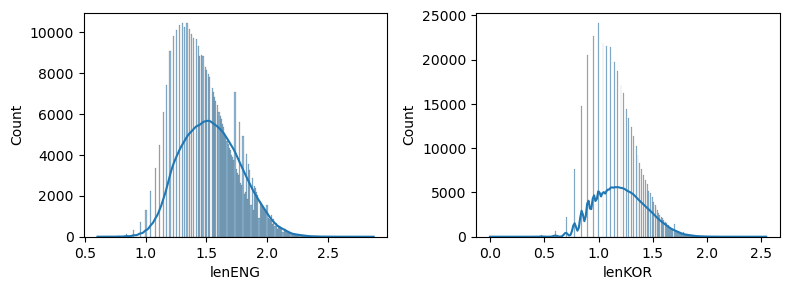

In [126]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8,3))
sns.histplot(ax=ax[0], data=df_len.lenENG.apply(np.log10), kde=True)
sns.histplot(ax=ax[1], data=df_len.lenKOR.apply(np.log10), kde=True)
plt.tight_layout()
plt.show()

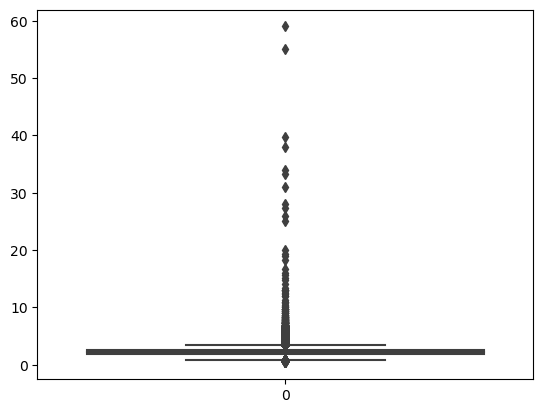

In [127]:
sns.boxplot(df_len.lenRatio)
plt.show()

In [128]:
q1, q3 = np.quantile(df_len.lenRatio.values, 0.25), np.quantile(df_len.lenRatio.values, 0.75)
IQR = q3-q1
print(f"lower bound: {q1-1.5*IQR}\tupper bound: {q3+1.5*IQR}")

lower bound: 0.892857142857143	upper bound: 3.4642857142857144


In [129]:
df_len.sort_values(by="lenENG", ascending=False)

,category,lawName,ENG,KOR,lenENG,lenKOR,lenTotal,lenRatio
273760,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,Matters to be prescribed by Presidential Decre...,"「도시 및 주거환경정비법」 제2조제3호나목, 같은 호 다목1) 및 2) 외의 부분,...",759,350,1109,2.168571
191061,노동,교원의 노동조합 설립 및 운영 등에 관한 법률,Except as otherwise expressly provided for in ...,교원(제4조의2제2호에 해당하는 사람을 포함한다)에 적용할 노동조합 및 노동관계조정...,595,217,812,2.741935
260588,형사법,성폭력범죄의 처벌 등에 관한 특례법,"Among the crimes of kidnapping, abduction, and...","「형법」 제2편제31장 약취, 유인 및 인신매매의 죄 중 추행, 간음 또는 성매매와...",566,229,795,2.471616
233872,국가공무원,공무원임용령,Public officials of class V or below of the fu...,이 영 시행당시 별표 1중 공안직군의 교정ㆍ검찰사무ㆍ마약수사ㆍ출입국관리ㆍ철도공안직렬...,556,109,665,5.100917
221893,헌법,상훈법,(Transitional Measures) The first class Order ...,"(경과조치) 이 법 시행전에 서훈한 건국공노훈장중장은 건국훈장1등급으로, 건국공노훈...",474,64,538,7.406250
...,...,...,...,...,...,...,...,...
555218,노동,산업안전보건법 시행령,Yellow phosphorus [12185-10-3] match;,황린[12185-10-3] 성냥(Yellow phosphorus match),4,4,8,1.000000
555217,노동,산업안전보건법 시행령,"Polychlorinated terphenyls (61788-33-8, etc.);",폴리클로리네이티드 터페닐(Polychlorinated terphenyls; 6178...,4,5,9,0.800000
173801,환경,생활화학제품 및 살생물제의 안전관리에 관한 법률 시행규칙,Documents evidencing the following:,다음 각 목 중 해당하는 사항을 증명할 수 있는 서류,4,10,14,0.400000
555232,노동,산업안전보건법 시행령,"Zinc chromates [13530-65-9, etc.];",크롬산 아연(Zinc chromates; 13530-65-9 등),4,5,9,0.800000


In [130]:
df_len.loc[df_len.KOR.str.contains(r"에$")].sort_values(by="lenENG", ascending=False)

,category,lawName,ENG,KOR,lenENG,lenKOR,lenTotal,lenRatio
573204,해운,항만운송사업법,Notwithstanding the provisions concerning diss...,사단법인 한국항만연수원이 제1항의 규정에 의하여 해양수산부장관의 승인을 얻은 때에,85,9,94,9.444444


In [131]:
print(f"mean: {np.mean(df_len.lenENG.values)}\tstd: {np.std(df_len.lenENG.values)}")

mean: 40.538748896801486	std: 25.76542182766803


In [132]:
upper_drop_idx = df_len.loc[df_len.lenRatio > 6].sort_values(by="lenRatio", ascending=False).index.to_list()
lower_drop_idx = df_len.loc[df_len.lenRatio < 1.3].sort_values(by="lenRatio", ascending=False).index.to_list()

In [133]:
df_drop = df_len.drop(index=upper_drop_idx+lower_drop_idx, axis=0)
df_drop.loc[~df_drop.KOR.str.contains(r"\.$")]

,category,lawName,ENG,KOR,lenENG,lenKOR,lenTotal,lenRatio
55,헌법,개성공업지구 지원에 관한 법률,The Act on the Collection of Insurance Premium...,「고용보험 및 산업재해보상보험의 보험료징수 등에 관한 법률」,16,7,23,2.285714
93,헌법,개성공업지구 지원에 관한 법률,"Providing support, operational guidance, and s...",개성공업지구 관리기관에 대한 지원 및 운영 지도ㆍ감독,11,7,18,1.571429
95,헌법,개성공업지구 지원에 관한 법률,Issuing various certificates and performing af...,개성공업지구 관리기관의 각종 증명 발급 및 민원 업무의 대행,17,9,26,1.888889
119,헌법,개성공업지구 지원에 관한 법률 시행령,Other costs and expenses determined by the Min...,그 밖에 개성공업지구의 원활한 조성과 운영 등을 위하여 통일부장관이 정하는 것,19,11,30,1.727273
125,헌법,개성공업지구 지원에 관한 법률 시행령,Other facilities determined by the Minister of...,그 밖에 개성공업지구의 개발을 위하여 필요한 공공시설로서 통일부장관이 정하는 시설,16,10,26,1.600000
...,...,...,...,...,...,...,...,...
585914,외무,해외이주법,Where an emigration agent fails to commence hi...,정당한 사유 없이 등록한 날부터 3개월 이내에 그 사업을 시작하지 아니한 경우,20,12,32,1.666667
585917,외무,해외이주법,Where an emigration agent fails to post a cert...,제10조제5항을 위반하여 등록증 및 알선료ㆍ수수료의 내용을 사업장에 게시하지 아니한 경우,33,10,43,3.300000
585918,외무,해외이주법,Where an emigration agent fails to report relo...,"제10조의3에 따른 사업장 이전, 분사무소 설치, 사업 양도 및 합병, 휴업ㆍ재개업...",37,15,52,2.466667
585929,외무,해외이주법,A person who conducts an emigration agency bus...,제10조제1항에 따른 해외이주알선업의 등록을 하지 아니하고 해외이주알선업을 한 자,16,9,25,1.777778


In [134]:
eng_idx = df_drop.loc[(~df_drop.KOR.str.contains(r"^\([^𖠌]+\)"))&(df_drop.ENG.str.contains(r"^\([^ㄱ]+\)"))].index.to_list()
kor_idx = df_drop.loc[(df_drop.KOR.str.contains(r"^\([^𖠌]+\)"))&(~df_drop.ENG.str.contains(r"^\([^ㄱ]+\)"))].index.to_list()

In [135]:
df_drop.loc[eng_idx, "ENG"] = df_drop.loc[eng_idx, "ENG"].apply(lambda x: re.sub(r"^\([^ㄱ]+\)\s", "", x))
df_drop.loc[kor_idx, "KOR"] = df_drop.loc[kor_idx, "KOR"].apply(lambda x: re.sub(r"^\([^𖠌]+\)\s", "", x))

In [136]:
df_drop.loc[(~df_drop.KOR.str.contains(r"^\([^𖠌]+\)"))&(df_drop.ENG.str.contains(r"^\([^ㄱ]+\)"))]

,category,lawName,ENG,KOR,lenENG,lenKOR,lenTotal,lenRatio


In [137]:
df_fin = df_drop.loc[df_drop.KOR.str.contains(r"[\.|다|\s경우|\s것|\s자]$")]
df_fin

,category,lawName,ENG,KOR,lenENG,lenKOR,lenTotal,lenRatio
0,헌법,개성공업지구 지원에 관한 법률,The purpose of this Act is to enhance inter-Ko...,이 법은 개성공업지구의 개발ㆍ운영의 지원 및 개성공업지구에 투자하거나 출입ㆍ체류하는...,68,26,94,2.615385
2,헌법,개성공업지구 지원에 관한 법률,"The term ""Gaeseong Industrial Complex"" or ""GIC...","""개성공업지구""란 남한과 북한 사이의 합의에 따라서 북한의 개성지역 일대에서 개발ㆍ...",30,12,42,2.500000
3,헌법,개성공업지구 지원에 관한 법률,"The term ""GIC developer"" means a South Korean ...","""개성공업지구 개발업자""란 「남북교류협력에 관한 법률」에 따른 협력사업의 승인을 받...",36,16,52,2.250000
4,헌법,개성공업지구 지원에 관한 법률,"The term ""GIC management organ"" means a corpor...","""개성공업지구 관리기관""이란 개성공업지구의 관리ㆍ운영을 위하여 북한의 「개성공업지구...",26,11,37,2.363636
5,헌법,개성공업지구 지원에 관한 법률,"The term ""local enterprise of the GIC"" means a...","""개성공업지구 현지기업""이란 남한주민이 「남북교류협력에 관한 법률」에 따른 협력사업...",50,18,68,2.777778
...,...,...,...,...,...,...,...,...
585933,외무,해외이주법,"Where the representative of a corporation, or ...","법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 종업원이 그 법인 또는...",103,50,153,2.060000
585936,외무,해외이주법,(Transitional Measures on Emigration Arrangeme...,(해외이주알선업자에 관한 경과조치) 이 법 시행당시 종전의 규정에 의하여 해외이주알...,67,32,99,2.093750
585938,외무,해외이주법,(Transitional Measures on Persons who have Obt...,(해외이주허가를 받은 자등에 관한 경과조치) 이 법 시행전에 종전의 규정에 의하여 ...,93,40,133,2.325000
585940,외무,해외이주법,(Transitional Measures on Persons who have Obt...,(해외이주적격결정을 받은 자에 관한 경과조치) 이 법 시행전에 종전의 규정에 의하여...,47,21,68,2.238095


In [138]:
df_fin.sort_values(by="lenENG", ascending=False)

,category,lawName,ENG,KOR,lenENG,lenKOR,lenTotal,lenRatio
273760,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,Matters to be prescribed by Presidential Decre...,"「도시 및 주거환경정비법」 제2조제3호나목, 같은 호 다목1) 및 2) 외의 부분,...",759,350,1109,2.168571
191061,노동,교원의 노동조합 설립 및 운영 등에 관한 법률,Except as otherwise expressly provided for in ...,교원(제4조의2제2호에 해당하는 사람을 포함한다)에 적용할 노동조합 및 노동관계조정...,595,217,812,2.741935
233872,국가공무원,공무원임용령,Public officials of class V or below of the fu...,이 영 시행당시 별표 1중 공안직군의 교정ㆍ검찰사무ㆍ마약수사ㆍ출입국관리ㆍ철도공안직렬...,556,109,665,5.100917
232050,국가공무원,공무원수당 등에 관한 규정,"No special area service allowance, dangerous s...",강등ㆍ정직ㆍ직위해제 또는 휴직(공무상 질병 또는 부상으로 인한 휴직은 제외한다)으로...,452,145,597,3.117241
273854,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,Matters to be prescribed by Presidential Decre...,"「공유수면 관리 및 매립에 관한 법률」 제5조제1호, 제6조제1항 각 호 외의 부분...",437,211,648,2.071090
...,...,...,...,...,...,...,...,...
188374,환경,환경정책기본법,The Institute shall be a corporation.,보전원은 법인으로 한다.,6,3,9,2.000000
116230,공업소유권,발명진흥법,The institute shall be a corporation.,연구원은 법인으로 한다.,6,3,9,2.000000
284782,지방제도,행정사법,The Association shall be a corporation.,행정사회는 법인으로 한다.,6,3,9,2.000000
287460,경찰,사행산업통합감독위원회법,The Agency shall be a corporation.,예방치유원은 법인으로 한다.,6,3,9,2.000000


In [139]:
df_dd = df_fin.copy(deep=True)

In [140]:
df_dd.sort_values(by="lenENG", ascending=False)

,category,lawName,ENG,KOR,lenENG,lenKOR,lenTotal,lenRatio
273760,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,Matters to be prescribed by Presidential Decre...,"「도시 및 주거환경정비법」 제2조제3호나목, 같은 호 다목1) 및 2) 외의 부분,...",759,350,1109,2.168571
191061,노동,교원의 노동조합 설립 및 운영 등에 관한 법률,Except as otherwise expressly provided for in ...,교원(제4조의2제2호에 해당하는 사람을 포함한다)에 적용할 노동조합 및 노동관계조정...,595,217,812,2.741935
233872,국가공무원,공무원임용령,Public officials of class V or below of the fu...,이 영 시행당시 별표 1중 공안직군의 교정ㆍ검찰사무ㆍ마약수사ㆍ출입국관리ㆍ철도공안직렬...,556,109,665,5.100917
232050,국가공무원,공무원수당 등에 관한 규정,"No special area service allowance, dangerous s...",강등ㆍ정직ㆍ직위해제 또는 휴직(공무상 질병 또는 부상으로 인한 휴직은 제외한다)으로...,452,145,597,3.117241
273854,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,Matters to be prescribed by Presidential Decre...,"「공유수면 관리 및 매립에 관한 법률」 제5조제1호, 제6조제1항 각 호 외의 부분...",437,211,648,2.071090
...,...,...,...,...,...,...,...,...
188374,환경,환경정책기본법,The Institute shall be a corporation.,보전원은 법인으로 한다.,6,3,9,2.000000
116230,공업소유권,발명진흥법,The institute shall be a corporation.,연구원은 법인으로 한다.,6,3,9,2.000000
284782,지방제도,행정사법,The Association shall be a corporation.,행정사회는 법인으로 한다.,6,3,9,2.000000
287460,경찰,사행산업통합감독위원회법,The Agency shall be a corporation.,예방치유원은 법인으로 한다.,6,3,9,2.000000


In [141]:
df_fi = df_dd.sort_values(by="lenENG", ascending=False).iloc[15000:-15000, :4].sort_index()

In [142]:
df_fi

,category,lawName,ENG,KOR
0,헌법,개성공업지구 지원에 관한 법률,The purpose of this Act is to enhance inter-Ko...,이 법은 개성공업지구의 개발ㆍ운영의 지원 및 개성공업지구에 투자하거나 출입ㆍ체류하는...
2,헌법,개성공업지구 지원에 관한 법률,"The term ""Gaeseong Industrial Complex"" or ""GIC...","""개성공업지구""란 남한과 북한 사이의 합의에 따라서 북한의 개성지역 일대에서 개발ㆍ..."
3,헌법,개성공업지구 지원에 관한 법률,"The term ""GIC developer"" means a South Korean ...","""개성공업지구 개발업자""란 「남북교류협력에 관한 법률」에 따른 협력사업의 승인을 받..."
4,헌법,개성공업지구 지원에 관한 법률,"The term ""GIC management organ"" means a corpor...","""개성공업지구 관리기관""이란 개성공업지구의 관리ㆍ운영을 위하여 북한의 「개성공업지구..."
5,헌법,개성공업지구 지원에 관한 법률,"The term ""local enterprise of the GIC"" means a...","""개성공업지구 현지기업""이란 남한주민이 「남북교류협력에 관한 법률」에 따른 협력사업..."
...,...,...,...,...
585930,외무,해외이주법,A person who solicits emigrants or acts as an ...,제10조의4제1호를 위반하여 속임수나 그 밖의 부정한 방법으로 해외이주자를 모집하거...
585932,외무,해외이주법,Any person who provides false information in t...,제6조에 따른 해외이주신고서에 거짓 사실을 적어 넣어 신고한 사람은 1년 이하의 징...
585936,외무,해외이주법,(Transitional Measures on Emigration Arrangeme...,(해외이주알선업자에 관한 경과조치) 이 법 시행당시 종전의 규정에 의하여 해외이주알...
585938,외무,해외이주법,(Transitional Measures on Persons who have Obt...,(해외이주허가를 받은 자등에 관한 경과조치) 이 법 시행전에 종전의 규정에 의하여 ...


In [143]:
df_fi.loc[df_fi.KOR.str.contains("ㆍ")]

,category,lawName,ENG,KOR
0,헌법,개성공업지구 지원에 관한 법률,The purpose of this Act is to enhance inter-Ko...,이 법은 개성공업지구의 개발ㆍ운영의 지원 및 개성공업지구에 투자하거나 출입ㆍ체류하는...
2,헌법,개성공업지구 지원에 관한 법률,"The term ""Gaeseong Industrial Complex"" or ""GIC...","""개성공업지구""란 남한과 북한 사이의 합의에 따라서 북한의 개성지역 일대에서 개발ㆍ..."
4,헌법,개성공업지구 지원에 관한 법률,"The term ""GIC management organ"" means a corpor...","""개성공업지구 관리기관""이란 개성공업지구의 관리ㆍ운영을 위하여 북한의 「개성공업지구..."
5,헌법,개성공업지구 지원에 관한 법률,"The term ""local enterprise of the GIC"" means a...","""개성공업지구 현지기업""이란 남한주민이 「남북교류협력에 관한 법률」에 따른 협력사업..."
9,헌법,개성공업지구 지원에 관한 법률,The Government shall formulate and implement p...,정부는 개성공업지구를 국제적인 공업지구로 육성ㆍ발전시키기 위한 시책을 수립ㆍ시행하고...
...,...,...,...,...
585889,외무,해외이주법,Any person who intends to engage in the busine...,해외이주자를 모집ㆍ알선하거나 다음 각 호의 해외이주에 관한 업무를 업으로 하는 사업...
585890,외무,해외이주법,A capital and guaranty insurance money require...,"제1항에 따른 등록을 위하여 필요한 자본금ㆍ보증보험금, 그 밖의 사항은 대통령령으로..."
585902,외무,해외이주법,Where an emigration agent intends to suspend o...,해외이주알선업자가 휴업ㆍ재개업 또는 폐업하려고 할 때에는 외교부령으로 정하는 바에 ...
585917,외무,해외이주법,Where an emigration agent fails to post a cert...,제10조제5항을 위반하여 등록증 및 알선료ㆍ수수료의 내용을 사업장에 게시하지 아니한 경우


In [144]:
df_fi.loc[df_fi.KOR.apply(lambda x: x.count("."))==1]

,category,lawName,ENG,KOR
2,헌법,개성공업지구 지원에 관한 법률,"The term ""Gaeseong Industrial Complex"" or ""GIC...","""개성공업지구""란 남한과 북한 사이의 합의에 따라서 북한의 개성지역 일대에서 개발ㆍ..."
3,헌법,개성공업지구 지원에 관한 법률,"The term ""GIC developer"" means a South Korean ...","""개성공업지구 개발업자""란 「남북교류협력에 관한 법률」에 따른 협력사업의 승인을 받..."
4,헌법,개성공업지구 지원에 관한 법률,"The term ""GIC management organ"" means a corpor...","""개성공업지구 관리기관""이란 개성공업지구의 관리ㆍ운영을 위하여 북한의 「개성공업지구..."
5,헌법,개성공업지구 지원에 관한 법률,"The term ""local enterprise of the GIC"" means a...","""개성공업지구 현지기업""이란 남한주민이 「남북교류협력에 관한 법률」에 따른 협력사업..."
6,헌법,개성공업지구 지원에 관한 법률,"The term ""enterprise invested in the GIC"" mean...","""개성공업지구 투자기업""이란 남한주민이 「남북교류협력에 관한 법률」에 따른 협력사업..."
...,...,...,...,...
585926,외무,해외이주법,Any person who intends to obtain a written con...,해외이주에 관한 확인서를 발급받으려는 사람은 외교부령으로 정하는 바에 따라 수수료를...
585932,외무,해외이주법,Any person who provides false information in t...,제6조에 따른 해외이주신고서에 거짓 사실을 적어 넣어 신고한 사람은 1년 이하의 징...
585936,외무,해외이주법,(Transitional Measures on Emigration Arrangeme...,(해외이주알선업자에 관한 경과조치) 이 법 시행당시 종전의 규정에 의하여 해외이주알...
585938,외무,해외이주법,(Transitional Measures on Persons who have Obt...,(해외이주허가를 받은 자등에 관한 경과조치) 이 법 시행전에 종전의 규정에 의하여 ...


In [145]:
df_fi.to_csv(os.path.join(gdrive_path, "preprocessing/fin.csv"), encoding="euc-kr")